---
title: Automatic and optimal shift scheduling using Reinforcement Learning (Part 5)
subtitle: Using Sequential Decision Analytics to find ongoing optimal decisions
author: Kobus Esterhuysen
date: '2023-11-04'
date-modified: last-modified
categories:
  - Retail Industry
  - Scheduling
  - Powell Unified Framework
  - Reinforcement Learning
  - Python
image: AIShiftScheduler1.png
format:
  html:
    toc: true
    toc-depth: 4
    toc-expand: true
    toc-title: TOC
    code-fold: false
---

In [1]:
#- !pip install mojo

In [2]:
# hide
# BASED ON
  # AIShiftScheduler_KE^v16.ipynb
  # AIShiftScheduler_KE^v15.ipynb
  # AIShiftScheduler_KE^v14.ipynb
  # AIShiftScheduler_KE^v11.ipynb
  # AIShiftScheduler_KE^v10.ipynb
  # AIShiftScheduler_KE^v9.ipynb
  # AIShiftScheduler_KE^v8.ipynb
  # AIShiftScheduler_KE^v7.ipynb
  # AIShiftScheduler_KE^v6.ipynb
  # AIShiftScheduler_KE^v5.ipynb
  # AIShiftScheduler_KE^v4.ipynb
  # AIShiftScheduler_KE^v3.ipynb
  # AIShiftScheduler_KE^v2.ipynb
  # AIShiftScheduler_KE^v1.ipynb
  # FractionalHR_KE^v1.ipynb
  # CarRental_KE^v4.ipynb
  # CarRental_KE^v3.ipynb
  # CarRental_KE^v2.ipynb
  # CarRental_KE^v1.ipynb
  # InventoryStorage_KE^v4.ipynb

# DONE
# v1 starts ------------------------------------------------
# added thHi (resources shifts below thHi considered for alloc)
# v2 starts ------------------------------------------------
# added Ucum for unallocated demands
# updated text
# v3 starts ------------------------------------------------
# published
# added DOW (day-of-week) availabilities
# v4 starts ------------------------------------------------
# published
# tracking Ucum by resource type in addition to overall/total
  # will inform what resource type to hire/fire
# changed avails to candidates
# changed thHi to thCumShifts
# having datetimes in addition to t values
  # https://www.youtube.com/watch?v=UFuo7EHI8zc
  # https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
  # https://matplotlib.org/stable/api/dates_api.html
  # subtract dates give Timedelta; each step add a Timedelta
  # don't plot with datetime x-labels - too cluttered
# added thSickProb and compare with each resource's SICK_PROB for the month
  # resource's SICK_PROB for the month must be lower than thSickProb to
  # be a candidate
  # setup params by month for prob. of calling in sick for each resource
# v5 starts ------------------------------------------------
# published
# changed X__AllocBelow to X__Alloc
# having costs/contributions instead of excluding candidates below thCumShifts & thSickProb
  # agent exploits by having thCumShifts & thSickProb around max so
  #   that it can use the complete pool
  # Ccum_CumShifts = -(RCumShifts - RCapacity) //Capacity in # shifts/week
  # Ccum_SickProb = -SICK_PROB(R, month)
  # LATER: Ccum_Merits = MERITS(R) //merits dissipate over time; positive or negative merits
  # for thetas have the weights between
    # thCumShifts*Ccum_CumShifts + thSickProb*Ccum_SickProb + thMerits*Ccum_Merits = 100%
  # this way the whole (available) pool are candidates every step
# updated text
# v6 starts ------------------------------------------------
# published part 4
# added merits for resources [v]
  # MERITS pars with columns MeritProb, DemeritProb
  # RMerits_t in state vector
  # simulated similar to demands
  # add thMerits & Ccum_Merits
# renamed SIM to DEM
# created P.plot_Fhat_map_3()
# throwed out Shift1 & Shift2
# added thSelect (categorical; from candidates, list of resources to alloc) [v]
  # first ??
  # random
  # ranked (say perf scores)
# updated text
# v7 starts ------------------------------------------------
# published part 5
# changed availability value from True/False to 1/0 [v]
# added HOD (hour-of-day) availabilities [v]
# renamed CumShifts to CumSlots.
# added Ccum_ContSlots for contiguous slots
# added S_t['xAlloc_t_1'] sub-vector to S_t (previous allocations)
# v8 starts ------------------------------------------------
# added DOW+HOD availabilities [v]
# v9 starts ------------------------------------------------
# tuned with longer MAX_DAILY_SHIFT_LENGTH, currently 4hours/16quarters
# disabling parameters by setting them to constant instead of changing code
# reduced granularity from 1 hour to 15 mins [v]
# having a single shift/day/resource to reduce gaps [v]
# v10 starts ------------------------------------------------
# having flags for TRAIN/EVALU so that complete notebook can be run automatically [v]
  # MODES = [TRAIN, EVALU, APPLY] OR [LEARN, APPLY]
# anvil-enabled the notebook [v]
  # https://anvil.works/learn/tutorials/google-colab-to-web-app
  # capture procedure
# v11 starts ------------------------------------------------
# reading in AVAILABILITIES_DOW_QOD from excel [v]
  # did NOT use .gsheet google docs spreadsheet, instead use gdocs excel version
  # have resources on cols (fewer than the other)
  # DOW, QOD down the rows
# reading in SICK_PROBS and MERIT_PROBS from excel [v]
# v12 starts ------------------------------------------------
# tried to convert notebook to vscode & mojo
  # migrated to vscode dev container
  # not mature enough for now, but will keep working
# v13 starts ------------------------------------------------
# migrated to vscode dev container with github [v]
  # allows more formal path to production
  # can deploy container on DigitalOcean
# understanding relationship between devcontainer and prdcontainer [v]
# investigated python parallelization [v]
# implemented parallelization for thetas [v]
  # speedup experiments in 'PerfExperiments' tab of data file
# v14 starts ------------------------------------------------
# parameterized the schedule resolution [v]
  # i.e. BLOCK_8_HOUR (bod), HOUR (hod), QUARTER_HOUR (qod)
# going back to 1 hour resolution until more compute resources available [v]
# v15 starts ------------------------------------------------
# investigated why the Complete red dotted line does not always show
# 	when the Allocd purple line goes down (where the red dotted line needs to go up), AND this happens at the beginning of the LAST slot for the day, there is 'no time' for the Complete line to go up and it does not show
# 	when the Allocd purple line goes down at the beginning of the FIRST slot for the day, it DOES show
# having Exogenous Info depend on dt (DOY?, MOY?, DOW, SOD) [v]
  # read in from spreadsheet
# v16 starts ------------------------------------------------
# configured current version for 'The Boardroom' [v]
# externalized SLOTS_PER_DAY & MAX_DAILY_SLOT_RUN as user input [v]
# externalized types of resources with counts as user input [v]
  # could be easily entered with a Anvil 'Text Area' using this format:
    # Manager: John, Penelope; SalesPerson: Sally, Sarah, Jim, Costa
    # from this input the RESOURCE_TYPES & RESOURCE_TYPE_COUNTS & RESOURCE_IDS 
      # can be calced
  # the complication is to have the datafile in sync with user inputs
    # HOWEVER, if we define: MAX_RESOURCE_TYPES & MAX_RESOURCE_IDS, and ensure that
    # inputs stay within these limits, the excel data file should work
# v17 starts ------------------------------------------------
# added dollar cost of assigning a resource to a slot [v]
# added popular times ro exogenous information [v]
	
# TODO
# add a rest-time state variable for a resource
  # easy to reproduce using BLOCK_8_HOUR
  # need to prevent the slot-run from being exceeded when a 
    # slot-run straddles midnight
  # maybe all the below is as simple as, do NOT do:
    # if sod == 0:
    #       S_t['R_t']['RCumSlots_t'] = 0
  # RAvail will not be reset when a new day starts but rather when the rest-time
    # has run out
  # maybe rename MAX_DAILY_SLOT_RUN to MAX_SLOT_RUN
  # after each slot-run a rest-time should happen before another schedule can occur
# make dicts for SLOTS_PER_DAY & DATE_TIME_DELTA
# make block durations flexible [v]
  # SG, block 0 starting at midnight works, testing with other arrangements not
  # feel unsure whether durations should be configurable
  # block beginnings should not have to start at midnight
  # block durations can be different, say 10h, 6h, and 8h
    # make dt_delta a lookup function that depends on the bod (block-of-day)
# track and use resource utilizations to compare againt gov incentive [v]
# do cross-allocations, incurring cost [v]
# add no-shows based on SICK_PROBS as exog info [v]
  # incur penalty for no-show
# consider learnability of pars in parameter cell [v]
# add demands for specific resources [v]
  # part of DemandSimulator
  # like Sally for first shift on Mon
  # only b attribute is the id of the resource
# implement parallelization for Ls [v]
  # not sure how a single policy will behave when creating multiple models in parallel
    # which will update the policy's model; I don't think this will work
  # may have to create a separate policy for each l (el)
  # rather leave for now; as it is, most cpus are used for thetas anyway on mac mini
  # much later, when we have access to powerful resources (say 100 cores), 
    # this may come in handy
# investigate the use of mojo [v]
# have late/early starts relative to scheduled start time count as merits
  # do after integration with database, i.e. rest of ERP
  # current the merits are just pre-simulated and then added to shift_scheduler_data.xlsx

## 0 INTRODUCTION

In the previous part we found that the agent  exploited the situation by having `thCumShifts` and `thSickProb` near their max values so that it can use the complete pool. So, instead of using thresholds below which resources are included as candidates, we always had all (available) resources in the candidates pool. The agent earned rewards or incurred penalties to discourage allocation of less ideal resources. The had the parameters:

- $\theta^{CumShifts}$
- $\theta^{SickProb}$

Each of these operated as weighting factors to weigh the associated component of the cumulative reward $C^{cum}$:

$C^{cum} = \theta^{CumShifts}.C^{cum}_{CumShifts} + \theta^{SickProb}.C^{cum}_{SickProb}$

In this part we add one more weighting parameters so that we now have:

- $\theta^{CumShifts}$
- $\theta^{SickProb}$
- $\theta^{CumMerits}$

The cumulative reward is now calculated:
$C^{cum} = \theta^{CumShifts}.C^{cum}_{CumShifts} + \theta^{SickProb}.C^{cum}_{SickProb} + \theta^{CumMerits}.C^{cum}_{CumMerits}$

In addition, we add a fourth (categorical) parameter called $\theta^{Select}$ which can have one of two values:

- 'random'
- 'ranked_CumMerits'

Once the list of available candidates are identified this list is either randomized ('random'), or it is ranked by the resources' cumulative merits ('ranked_CumMerits').

To keep the visualizations manageable, we will still only have the resources:

- Courtesy Clerk (7 resources)
- Stocker (3 resources)

In a later part we will also add:

- Cleaner (2 resources)
- Curbsider (4 resources)

Daily demands are provided by a stochastic demand simulator based on past needs and trends. We also add a merit simulator.

The overall *structure* of this project and report follows the traditional CRISP-DM format. However, instead of the CRISP-DM'S "4 Modeling" section, we inserted the "6 step modeling process" of [Dr. Warren Powell](https://castlelab.princeton.edu/people/) in section 4 of this document. Dr Powell's universal framework shows great promise for unifying the formalisms of at least a dozen different fields. Using his framework enables easier access to thinking patterns in these other fields that might be beneficial and informative to the sequential decision problem at hand. Traditionally, this kind of problem would be approached from the *reinforcement learning* perspective. However, using Dr. Powell's wider and more comprehensive perspective almost certainly provides additional value.

Here is information on Dr. Powell's perspective on [Sequential Decision Analytics](https://castlelab.princeton.edu/sda).

In order to make a strong mapping between the code in this notebook and the mathematics in the Powell Universal Framework (PUF), we follow the following convention for naming Python identifier names:

- How to read/say
  - var name & flavor first
  - at t/n
  - for entity OR of/with attribute
  - $\hat{R}^{fail}_{t+1,a}$ has code `Rhat__fail_tt1_a` which is read: "Rhatfail at t+1 of/with (attribute) a"
- Superscripts
  - variable names have a *double* underscore to indicate a superscript
  - $X^{\pi}$: has code `X__pi`, is read *X pi*
  - when there is a 'natural' distinction between the variable symbol and the superscript (e.g. a change in case), the double underscore is sometimes omitted: `Xpi` instead of `X__pi`, or `MSpend_t` instead of `M__Spend_t`
- Subscripts
  - variable names have a *single* underscore to indicate a subscript
  - $S_t$: has code `S_t`, is read 'S at t'
  - $M^{Spend}_t$ has code `M__Spend_t` which is read: "MSpend at t"
  - $\hat{R}^{fail}_{t+1,a}$ has code `Rhat__fail_tt1_a` which is read: "Rhatfail at t+1 of/with (attribute) a" [RLSO-p436]
- Arguments
  - collection variable names may have argument information added
  - $X^{\pi}(S_t)$: has code `X__piIS_tI`, is read 'X pi in S at t'
  - the surrounding `I`'s are used to imitate the parentheses around the argument
- Next time/iteration
  - variable names that indicate one step in the future are quite common
  - $R_{t+1}$: has code `R_tt1`, is read 'R at t+1'
  - $R^{n+1}$: has code `R__nt1`, is read 'R at n+1'
- Rewards
  - State-independent terminal reward and cumulative reward
    - $F$: has code `F` for terminal reward
    - $\sum_{n}F$: has code `cumF` for cumulative reward
  - State-dependent terminal reward and cumulative reward
    - $C$: has code `C` for terminal reward
    - $\sum_{t}C$: has code `cumC` for cumulative reward
- Vectors where components use different names
  - $S_t(R_t, p_t)$: has code `S_t.R_t` and `S_t.p_t`, is read 'S at t in R at t, and, S at t in p at t'
  - the code implementation is by means of a named tuple
    - `self.State = namedtuple('State', SVarNames)` for the 'class' of the vector
    - `self.S_t` for the 'instance' of the vector
- Vectors where components reuse names
  - $x_t(x_{t,GB}, x_{t,BL})$: has code `x_t.x_t_GB` and `x_t.x_t_BL`, is read 'x at t in x at t for GB, and, x at t in x at t for BL'
  - the code implementation is by means of a named tuple
    - `self.Decision = namedtuple('Decision', xVarNames)` for the 'class' of the vector
    - `self.x_t` for the 'instance' of the vector
- Use of mixed-case variable names
  - to reduce confusion, sometimes the use of *mixed-case* variable names are preferred (even though it is not a best practice in the Python community), reserving the use of underscores and double underscores for math-related variables

## 1 BUSINESS UNDERSTANDING

The HR manager has to schedule resources for each day. This schedule will be automated and optimized by the AI agent.

The number of resources of each type for each schedule slots for each day will be provided by the simulator. Only two resource types will be handled:

- Courtesy
- Stocker

The HR manager typically runs the AI Shift Scheduler 2 weeks into the future to produce a tentative schedule to publish for the team.

As demands for shift slot allocations come in, they are handled in the following way:

- the candidates for the resource type must have their:
  - $R^{Avail}_t$ be True

- the specific resources are then marked for allocation considering the number of resources needed for the type
- the state of the resources are then updated including the number of accumulated shifts
- at the end of the shift all resources are made available again

The overall objective will be to maximize the cumulative reward.

## 2 DATA UNDERSTANDING

Based on recent market research, the demand may be modeled by a Poisson distribution for each resource type:
$$
\begin{aligned}
\mu^{ResourceType} &= \mathrm{SIM\_MU\_D[RESOURCE\_TYPE]}
\end{aligned}
$$

So we have:
$$
D^{ResourceType}_{t+1} \sim Pois(\mu^{ResourceType})
$$

For each decision window, a `MeritProb` and `DemeritProb` unique to each resource is used to simulate whether that resource earned a merit (+1) and/or demerit (-1). The two values are summed to get a net merit. These merit values are also accumulated.

The decision window is 1 day and these simulations are for the daily demands for Shift1.

In [3]:
# # #hide
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive"
# # base_dir = root_dir + '/Powell/SD.I_Inventory_Problems/InventoryStorage'
# base_dir = root_dir + '/Powell/SD.CRA_Complex_Resource_Allocation_Problems/Scheduling'

In [4]:
## import pdb
from collections import namedtuple, defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import time
import math
from pprint import pprint
import matplotlib as mpl
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## !pip install -U "ray"
# from timebudget import timebudget
import ray
import json

! python --version

Python 3.8.18


In [5]:
## hide
## def contribution(aName, bName):
#   a = aName.split('_')
#   b = bName.split('_')
#   if (
#     a[0] == b[0]:
#     bool(b[2]) == False and a[0] != b[0]) or \
#     (bool(b[2]) == True and mySubMatrix['_'.join([a[0], b[0]])] == False):
#     value = params['INFEASIABLE_SUBSTITUTION_PENALTY']
#   else:

In [6]:
base_dir = '.'
file_name = 'shift_scheduler_data.xlsx'

In [7]:
def load_sick_probs(filename):
  sick_df = pd.read_excel(
      filename,
      sheet_name='SickProbs',
      ## skiprows=3,
      converters={'ResourceId':str}
      )
  return sick_df
SICK_PROBS = load_sick_probs(f'{base_dir}/{file_name}')

In [8]:
def load_merit_probs(filename):
  merit_df = pd.read_excel(
      filename,
      sheet_name='MeritProbs',
      ## skiprows=3,
      converters={'ResourceId':str}
      )
  return merit_df
MERIT_PROBS = load_merit_probs(f'{base_dir}/{file_name}')

In [9]:
def load_exog_info(filename):
  exog_info_df = pd.read_excel(
    filename,
    sheet_name='ExogInfo2',
    skiprows=6,
    ## converters={'ResourceId':str}
    )
  return exog_info_df
EXOG_INFO = load_exog_info(f'{base_dir}/{file_name}')

### Acquire 'popular times' data

In [10]:
## generate/update 'popular times' data
# if the busyness data exists in shift_scheduler_data.xlsx,
    # delete the data
    # move the heading(s) for popular times up higher (temporarily)
# https://outscraper.com/pricing/
    # seems like I can use this approach for one-of queries
    # I did signup, but did not provide any credit card info
# click on free plan
# fill out as in outscraper_query_example.png
# submit the query
# goto 'Tasks' in left panel //https://app.outscraper.com/tasks
# download the results
# open the excel file
# goto the 'popular_times' column
# copy the value from this column to the right of the '=' in the next cell
# goto the 'place_id' column and copy its value
    # optional, maybe handy in future, when the popular times have to be updated,
    # to query by this number, however, would need a google api key:
        # ! curl -X POST -d '{"textQuery" : "Spicy Vegetarian Food in Sydney, Australia"}' \
        # -H 'Content-Type: application/json' -H 'X-Goog-Api-Key: API_KEY' \
        # -H 'X-Goog-FieldMask: places.id,places.displayName,places.formattedAddress' \
        # 'https://places.googleapis.com/v1/places:searchText'    
# run the rest of this section until PopularTimes.xlsx has been saved
# copy the 3 columns from PopularTimes.xlsx and paste into the ExogInfo2 tab of 
    # shift_scheduler_data.xlsx
# make sure the alignment is good
# delete the 'hour' and 'day' columns from the paste
# rename the 'percentage' column to 'busyness'
# load the exog info again

In [11]:
## data_popular_times = [{"day": 7, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 0, "title": "", "time": "9am"}, {"hour": 11, "percentage": 54, "title": "Usually a little busy", "time": "9am"}, {"hour": 12, "percentage": 75, "title": "Usually a little busy", "time": "12pm"}, {"hour": 13, "percentage": 91, "title": "Usually as busy as it gets", "time": "12pm"}, {"hour": 14, "percentage": 100, "title": "Usually as busy as it gets", "time": "12pm"}, {"hour": 15, "percentage": 87, "title": "Usually as busy as it gets", "time": "3pm"}, {"hour": 16, "percentage": 65, "title": "Usually a little busy", "time": "3pm"}, {"hour": 17, "percentage": 0, "title": "", "time": "3pm"}, {"hour": 18, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 19, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}, {"day": 1, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 14, "title": "Usually not busy", "time": "9am"}, {"hour": 11, "percentage": 25, "title": "Usually not too busy", "time": "9am"}, {"hour": 12, "percentage": 33, "title": "Usually not too busy", "time": "12pm"}, {"hour": 13, "percentage": 29, "title": "Usually not too busy", "time": "12pm"}, {"hour": 14, "percentage": 33, "title": "Usually not too busy", "time": "12pm"}, {"hour": 15, "percentage": 34, "title": "Usually not too busy", "time": "3pm"}, {"hour": 16, "percentage": 29, "title": "Usually not too busy", "time": "3pm"}, {"hour": 17, "percentage": 18, "title": "Usually not busy", "time": "3pm"}, {"hour": 18, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 19, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}, {"day": 2, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 7, "title": "Usually not busy", "time": "9am"}, {"hour": 11, "percentage": 18, "title": "Usually not busy", "time": "9am"}, {"hour": 12, "percentage": 20, "title": "Usually not too busy", "time": "12pm"}, {"hour": 13, "percentage": 23, "title": "Usually not too busy", "time": "12pm"}, {"hour": 14, "percentage": 19, "title": "Usually not busy", "time": "12pm"}, {"hour": 15, "percentage": 20, "title": "Usually not too busy", "time": "3pm"}, {"hour": 16, "percentage": 17, "title": "Usually not busy", "time": "3pm"}, {"hour": 17, "percentage": 20, "title": "Usually not too busy", "time": "3pm"}, {"hour": 18, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 19, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}, {"day": 3, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 19, "title": "Usually not busy", "time": "9am"}, {"hour": 11, "percentage": 24, "title": "Usually not too busy", "time": "9am"}, {"hour": 12, "percentage": 29, "title": "Usually not too busy", "time": "12pm"}, {"hour": 13, "percentage": 27, "title": "Usually not too busy", "time": "12pm"}, {"hour": 14, "percentage": 27, "title": "Usually not too busy", "time": "12pm"}, {"hour": 15, "percentage": 23, "title": "Usually not too busy", "time": "3pm"}, {"hour": 16, "percentage": 27, "title": "Usually not too busy", "time": "3pm"}, {"hour": 17, "percentage": 20, "title": "Usually not too busy", "time": "3pm"}, {"hour": 18, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 19, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}, {"day": 4, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 1, "title": "Usually not busy", "time": "9am"}, {"hour": 11, "percentage": 7, "title": "Usually not busy", "time": "9am"}, {"hour": 12, "percentage": 17, "title": "Usually not busy", "time": "12pm"}, {"hour": 13, "percentage": 25, "title": "Usually not too busy", "time": "12pm"}, {"hour": 14, "percentage": 24, "title": "Usually not too busy", "time": "12pm"}, {"hour": 15, "percentage": 23, "title": "Usually not too busy", "time": "3pm"}, {"hour": 16, "percentage": 17, "title": "Usually not busy", "time": "3pm"}, {"hour": 17, "percentage": 18, "title": "Usually not busy", "time": "3pm"}, {"hour": 18, "percentage": 14, "title": "Usually not busy", "time": "6pm"}, {"hour": 19, "percentage": 16, "title": "Usually not busy", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}, {"day": 5, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 14, "title": "Usually not busy", "time": "9am"}, {"hour": 11, "percentage": 27, "title": "Usually not too busy", "time": "9am"}, {"hour": 12, "percentage": 33, "title": "Usually not too busy", "time": "12pm"}, {"hour": 13, "percentage": 32, "title": "Usually not too busy", "time": "12pm"}, {"hour": 14, "percentage": 27, "title": "Usually not too busy", "time": "12pm"}, {"hour": 15, "percentage": 27, "title": "Usually not too busy", "time": "3pm"}, {"hour": 16, "percentage": 29, "title": "Usually not too busy", "time": "3pm"}, {"hour": 17, "percentage": 32, "title": "Usually not too busy", "time": "3pm"}, {"hour": 18, "percentage": 28, "title": "Usually not too busy", "time": "6pm"}, {"hour": 19, "percentage": 22, "title": "Usually not too busy", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}, {"day": 6, "popular_times": [{"hour": 6, "percentage": 0, "title": "", "time": "6am"}, {"hour": 7, "percentage": 0, "title": "", "time": "6am"}, {"hour": 8, "percentage": 0, "title": "", "time": "6am"}, {"hour": 9, "percentage": 0, "title": "", "time": "9am"}, {"hour": 10, "percentage": 25, "title": "Usually not too busy", "time": "9am"}, {"hour": 11, "percentage": 44, "title": "Usually not too busy", "time": "9am"}, {"hour": 12, "percentage": 61, "title": "Usually a little busy", "time": "12pm"}, {"hour": 13, "percentage": 76, "title": "Usually a little busy", "time": "12pm"}, {"hour": 14, "percentage": 96, "title": "Usually as busy as it gets", "time": "12pm"}, {"hour": 15, "percentage": 95, "title": "Usually as busy as it gets", "time": "3pm"}, {"hour": 16, "percentage": 79, "title": "Usually a little busy", "time": "3pm"}, {"hour": 17, "percentage": 48, "title": "Usually not too busy", "time": "3pm"}, {"hour": 18, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 19, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 20, "percentage": 0, "title": "", "time": "6pm"}, {"hour": 21, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 22, "percentage": 0, "title": "", "time": "9pm"}, {"hour": 23, "percentage": 0, "title": "", "time": "9pm"}]}]

In [12]:
## df_popular_times = pd.json_normalize(
#     data_popular_times,
#     #- meta=['day', ['popular_times', 'hour'], ['popular_times', 'percentage'], ['popular_times', 'title'], ['popular_times', 'time']]
#     #- meta=['day', ['popular_times', ['hour', 'percentage']]]
#     #- meta=['day', ['popular_times', ['hour', 'percentage']]]
#     "popular_times", ["day"] ## day1 to day7 is Monday to Sunday
#     #- ["day"], "popular_times"
#     #- "day", "popular_times"
# )
# df_popular_times['day'] = df_popular_times['day'].apply(lambda x: x - 1) ##adjust DOW to match other data
# df_popular_times = df_popular_times[['hour', 'percentage', 'day']] ##select used columns
# df_popular_times[:5]


In [13]:
## 
# EXOG_INFO = pd.merge(EXOG_INFO, df_popular_times, how='left', left_on=['DOW', 'HOD'], right_on=['day', 'hour'])
# EXOG_INFO['hour'].fillna(EXOG_INFO['HOD'], inplace=True)
# EXOG_INFO['day'].fillna(EXOG_INFO['DOW'], inplace=True)
# EXOG_INFO['percentage'].fillna(0, inplace=True)
# EXOG_INFO = EXOG_INFO.astype({'hour':'int32', 'percentage':'int32', 'day':'int32'})
# EXOG_INFO[:5]

In [14]:
# ## copy from this file and paste into ExogInfo tab of shift_scheduler_data.xlsx
# EXOG_INFO.to_excel('PopularTimes.xlsx', columns=['hour', 'percentage', 'day'], index=False)

In [15]:
# ## load again
# EXOG_INFO = load_exog_info(f'{base_dir}/{file_name}')

In [16]:
## EXOG_INFO.columns

We will have the *learnable* parameters:

$$(\theta^{CumShifts}, \theta^{SickProb}, \theta^{CumMerits}, \theta^{Select})$$


In [17]:
## PARAMETERS
MODES = ['LEARN']
# MODES = ['TRAIN']
# MODES = ['TRAIN', 'EVALU']
# MODES = ['TRAIN', 'EVALU', 'APPLY'] 
# or # MODES = ['TRAIN', 'EVALU', 'INFER']
# or # MODES = ['TRAIN', 'EVALU', 'SERVE']
# MODES = ['EVALU', 'APPLY']
# MODES = ['APPLY']
## for 'APPLY'/'INFER'/'SERVE'
BEST_THETA_Alloc = (0, 0, 0, 1, 'random') #will be written/read eventually

## SNAMES = [ #state variable names
#     'RAvail_t', #available resource
#     'R_t',      #resource
#     'D_t',      #demand
# ]
## xNAMES = ['x_t'] #decision variable names

MAX_RESOURCE_TYPES = 3
MAX_RESOURCE_IDS = 13

## RESOURCE_TYPES = ['Courtesy', 'Stocker', 'Cleaner', 'Curbsider'] ## <<< ========= INPUT ==============
RESOURCE_TYPES = ['Manager', 'AssistMngr', 'RetailAssoc'] ## <<< ========= INPUT ==============

RESOURCE_TYPE_COUNTS = [1, 2, 10] ## <<< ========= INPUT ==============
assert len(RESOURCE_TYPES) == len(RESOURCE_TYPE_COUNTS)
assert len(RESOURCE_TYPES) <= MAX_RESOURCE_TYPES
print(f'\n{len(RESOURCE_TYPES)=}')
print(RESOURCE_TYPES)

## TYPES = ['Courtesy']*7 + ['Stocker']*3 + ['Cleaner']*2 + ['Curbsider']*4
TYPES = []
for i in range(len(RESOURCE_TYPES)):
  additional_types = [RESOURCE_TYPES[i]]*RESOURCE_TYPE_COUNTS[i]
  for item in additional_types:
    TYPES.append(item)
print(f'\n{len(TYPES)=}')
print(TYPES)

RESOURCE_IDS = [ ## <<< ========= INPUT ==============
  'Matt', 
  'Mike', 'Tanner', 
  'Jake', 'James', 'Jane', 'John', 'Jim', 'Jenny', 'Jeremy', 'Judy', 'Julie', 'Jeffrey']
assert len(RESOURCE_IDS) == len(TYPES)
assert len(RESOURCE_IDS) <= MAX_RESOURCE_IDS

## eventually learn, call thBusyRate
# BUSYNESS_RATE = { #demand/busyness
#   'Manager': .5,
#   'AssistMngr': .8,
#   'RetailAssoc': 5
# }
## demand/busyness ## <<< ========= INPUT ==============
## add demands of 0 up to these values as busyness varies from 0 to 100%
BUSYNESS_RATES = [.5, .8, 5]
BUSYNESS_RATE = {e: BUSYNESS_RATES[i] for i,e in enumerate(RESOURCE_TYPES)}
assert len(BUSYNESS_RATES) == len(RESOURCE_TYPES)

# ///////////////////////
# rates, costs
# ########
# RetailAssociate $18/hour
# AssistantManager $20/hour
# Manager $25/hour

# hourly slots --------------- OK
# \\\\\\\\\\\\
RESOURCE_EXPENSES = [25.00, 20.00, 18.00] ## <<< ========= INPUT ==============
RESOURCE_EXPENSE = {e: RESOURCE_EXPENSES[i] for i,e in enumerate(RESOURCE_TYPES)}
assert len(RESOURCE_EXPENSES) == len(RESOURCE_TYPES)

## does not make a whole lot of sense, rather use:
  ## REVENUE_PER_BUSYNESS_PER_HOUR or
  ## REVENUE_PER_VOLUME_PER_HOUR
## RESOURCE_REVENUES = [0.00, 0.00, 400.00] ## <<< ========= INPUT ==============
## RESOURCE_REVENUE = {e: RESOURCE_REVENUES[i] for i,e in enumerate(RESOURCE_TYPES)}
## assert len(RESOURCE_REVENUES) == len(RESOURCE_TYPES)
REVENUE_PER_BUSYNESS_PER_HOUR = 1000 ##dollars ## <<< ========= INPUT ==============
## REVENUE_PER_VOLUME_PER_HOUR = 100 ##dollars ## <<< ========= INPUT ==============

## *resource* attribute vectors
aNAMES = [tup[0]+'_'+tup[1] for tup in zip(TYPES, RESOURCE_IDS)]
print(f'{len(aNAMES)=}')
print(aNAMES)

## *demand* attribute vectors
bNAMES = RESOURCE_TYPES
print(f'\n{len(bNAMES)=}')
print(bNAMES)

## *decision* 'attribute' vectors
abNAMES = [] ##to DEMAND b
for a in aNAMES:
  a0,a1 = a.split('_')
  for b in bNAMES:
    if(a0==b):
      abn = (a + '___' + b)
      abNAMES.append(abn)
print(f'\n{len(abNAMES)=}')
print(abNAMES)

piNAMES = ['X__Alloc'] ##policy names
thNAMES = [ ##theta names
  'thCumSlots',
  'thSickProb',
  'thCumMerits',
  'thContSlots',
  'thSelect'
  # 'thBusyRate' ##later
]
print(f'\n{len(thNAMES)=}')
print(f'{thNAMES=}')

RESOLUTION = 'HOUR' ## 'BLOCK_8_HOUR', 'HOUR', 'QUARTER_HOUR', 
if RESOLUTION == 'QUARTER_HOUR':
  SLOTS_PER_DAY = 96
  DATE_TIME_DELTA = '15min'
elif RESOLUTION == 'HOUR':
  SLOTS_PER_DAY = 24
  DATE_TIME_DELTA = '1H'
elif RESOLUTION == 'BLOCK_8_HOUR':
  SLOTS_PER_DAY = 3
  DATE_TIME_DELTA = '8H'
  ## DATE_TIME_DELTA = {0: '6H', 1: '10H', 2: '8H'} ##maybe in future?
else:
  print(f'ERROR: Invalid RESOLUTION: {RESOLUTION}')

BLOCK_START_HOUR = {0: 0, 1: 8, 2:16}

## ///////////////////////////
# SLOTS_PER_DAY = {
#     'QUARTER_HOUR': 96,
#     'HOUR': 24,
#     'BLOCK_8_HOUR': 3
#     # 'BLOCK_8_HOUR': {0: '6H', 1: '10H', 2: '8H'}
# }
# DATE_TIME_DELTA = {
#     'QUARTER_HOUR': '15min',
#     'HOUR': '1H',
#     'BLOCK_8_HOUR': '8H'
#     # 'BLOCK_8_HOUR': {0: '6H', 1: '10H', 2: '8H'}
# }
## \\\\\\\\\\

def get_availabilities(dt):
  avails = \
    EXOG_INFO.loc[
      EXOG_INFO['Date']==dt,
      [col for col in EXOG_INFO.columns if col in [f'A_{a}' for a in range(len(RESOURCE_IDS))]]
    ].iloc[0]
  avails.reset_index(drop=True, inplace=True) ##to start index at 0
  return avails

def get_dow_qod_capacities(dow):
  capacities = \
    EXOG_INFO.loc[
      (EXOG_INFO['DOW']==dow),
      [col for col in EXOG_INFO.columns if col in [f'A_{a}' for a in range(len(RESOURCE_IDS))]]
    ].sum(axis=0) ##total daily capacity
  capacities.reset_index(drop=True, inplace=True)
  return capacities

def get_dow_hod_capacities(dow):
  capacities = \
    EXOG_INFO.loc[
      (EXOG_INFO['DOW']==dow),
    ].groupby(['HOD']).first()
  capacities = capacities[[col for col in EXOG_INFO.columns if col in [f'A_{a}' for a in range(len(RESOURCE_IDS))]]]
  capacities = capacities.sum(axis=0) ##total daily capacity
  capacities.reset_index(drop=True, inplace=True)
  return capacities

def get_dow_bod_capacities(dow):
  capacities = \
    EXOG_INFO.loc[
      (EXOG_INFO['DOW']==dow),
    ].groupby(['BOD']).first()
  capacities = capacities[[col for col in EXOG_INFO.columns if col in [f'A_{a}' for a in range(len(RESOURCE_IDS))]]]
  capacities = capacities.sum(axis=0) ##total daily capacity
  capacities.reset_index(drop=True, inplace=True)
  return capacities

def get_capacities(dow):
  if RESOLUTION == 'QUARTER_HOUR':
    return get_dow_qod_capacities(dow)
  elif RESOLUTION == 'HOUR':
    return get_dow_hod_capacities(dow)
  elif RESOLUTION == 'BLOCK_8_HOUR':
    return get_dow_bod_capacities(dow)
  else:
    print(f'ERROR: Invalid RESOLUTION: {RESOLUTION}')
    return None

SEED_TRAIN = 77777777
SEED_EVALU = 88888888
## N_SAMPLEPATHS = 100; L = N_SAMPLEPATHS
## N_TRANSITIONS = 100; T = N_TRANSITIONS

TH_CumSlots_SPEC = (0, 1, .2)
TH_SickProb_SPEC = (0, 1, .2)
TH_CumMerits_SPEC = (0, 1, .2)
TH_ContSlots_SPEC = (0, 1, .2)
## TH_Select_SPEC = ('random', 'ranked_CumMerits')
TH_Select_SPEC = ('random',)
## TH_Select_SPEC = ('ranked_CumMerits',)

## SIM_T = 60
# ## SIM_MU_D = {bNAMES[0]: 4, bNAMES[1]: 2}
# SIM_MU_D = {bNAMES[0]: 4, bNAMES[1]: 2, bNAMES[2]: 2}
# print(f'\n{SIM_MU_D=}')
# assert len(SIM_MU_D.items())==len(bNAMES)

# ## SIM_EVENT_TIME_D = {bNAMES[0]: None, bNAMES[1]: None, bNAMES[2]: None, bNAMES[3]: None}
# ## SIM_EVENT_TIME_D = {bNAMES[0]: None, bNAMES[1]: None}
# SIM_EVENT_TIME_D = {bNAMES[0]: None, bNAMES[1]: None, bNAMES[2]: None}
# print(f'\n{SIM_EVENT_TIME_D=}')
# assert len(SIM_EVENT_TIME_D.items())==len(bNAMES)

# ## SIM_MU_DELTA_D = {bNAMES[0]: None, bNAMES[1]: None, bNAMES[2]: None, bNAMES[3]: None}
# SIM_MU_DELTA_D = {bNAMES[0]: None, bNAMES[1]: None, bNAMES[2]: None}
# print(f'\n{SIM_MU_DELTA_D=}')
# assert len(SIM_MU_DELTA_D.items())==len(bNAMES)

START_DATE_TIME = '2023-12-04'
## START_DATE_TIME = '2023-10-30T22:00' ##works too
sd = pd.to_datetime(START_DATE_TIME)
assert sd.strftime('%a')=='Mon'

MAX_DAILY_SLOT_RUN = 8 #8
assert MAX_DAILY_SLOT_RUN<=SLOTS_PER_DAY

CONTIGUOUS_REWARD = 1

GOV_UTIL_THESH = 0.40

## math parameters use 'math/small case' (as opposed to code parameters):

## CONTRIB_MATRIX = {}
# for an in aNAMES:
#     contribs = {}
#     for bn in bNAMES:
#       contribs[bn] = contribution(an, bn)
#     CONTRIB_MATRIX[an] = contribs
# CONTRIB_MATRIX


len(RESOURCE_TYPES)=3
['Manager', 'AssistMngr', 'RetailAssoc']

len(TYPES)=13
['Manager', 'AssistMngr', 'AssistMngr', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc', 'RetailAssoc']
len(aNAMES)=13
['Manager_Matt', 'AssistMngr_Mike', 'AssistMngr_Tanner', 'RetailAssoc_Jake', 'RetailAssoc_James', 'RetailAssoc_Jane', 'RetailAssoc_John', 'RetailAssoc_Jim', 'RetailAssoc_Jenny', 'RetailAssoc_Jeremy', 'RetailAssoc_Judy', 'RetailAssoc_Julie', 'RetailAssoc_Jeffrey']

len(bNAMES)=3
['Manager', 'AssistMngr', 'RetailAssoc']

len(abNAMES)=13
['Manager_Matt___Manager', 'AssistMngr_Mike___AssistMngr', 'AssistMngr_Tanner___AssistMngr', 'RetailAssoc_Jake___RetailAssoc', 'RetailAssoc_James___RetailAssoc', 'RetailAssoc_Jane___RetailAssoc', 'RetailAssoc_John___RetailAssoc', 'RetailAssoc_Jim___RetailAssoc', 'RetailAssoc_Jenny___RetailAssoc', 'RetailAssoc_Jeremy___RetailAssoc', 'RetailAssoc_Judy___RetailAssoc', 'RetailAsso

In [18]:
## for deployment
if 'APPLY' in MODES:
  !pip install anvil-uplink

In [19]:
## for deployment
if 'APPLY' in MODES:
  import anvil.server
  # anvil.server.connect("server_3XW6GGHGVKXPOSSQIURTQXNU-V4VIE5KV6JAVBBAU")
  anvil.server.connect("server_RQUG55QCBAUR4ONLXVEZZYPN-V4VIE5KV6JAVBBAU")

In [20]:
## class DemandSimulator():
#   def __init__(self,
#     T__sim=SIM_T,
#     muD=SIM_MU_D,
#     eventTimeD=SIM_EVENT_TIME_D,
#     muDeltaD=SIM_MU_DELTA_D,
#     seed=None):
#     self.time = 0
#     self.T__sim = SIM_T
#     self.muD = SIM_MU_D
#     self.eventTimeD = SIM_EVENT_TIME_D
#     self.muDeltaD = SIM_MU_DELTA_D
#     self.prng = np.random.RandomState(seed)

#   def simulate(self):
#     if self.time > self.T__sim - 1:
#       self.time = 0
#     D_tt1 = {}
#     for bn in bNAMES:
#       if self.eventTimeD[bn] and self.time > self.eventTimeD[bn]: ##event for entity
#         D_tt1[bn] = self.muDeltaD[bn] + self.prng.poisson(self.muD[bn]) ##after event
#       else:
#         D_tt1[bn] = self.prng.poisson(self.muD[bn])
#     self.time += 1
#     return {bn: max(0, D_tt1[bn]) for bn in bNAMES} ##always positive

In [21]:
## dem_sim = DemandSimulator(seed=1234)
# DemandData = []
# for i in range(SIM_T):
#   d = list(dem_sim.simulate().values())
#   DemandData.append(d)
# labels = [f'{bn}_dem' for bn in bNAMES]
# df = pd.DataFrame.from_records(data=DemandData, columns=labels); df[:10]

In [22]:
# ## PUT BACK: COMMENTED OUT TO BE FASTER
# import random
# def plot_output(df1, df2):
#   n_charts = len(bNAMES)
#   ylabelsize = 16
#   mpl.rcParams['lines.linewidth'] = 1.2
#   default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#   fig, axs = plt.subplots(n_charts, sharex=True)
#   fig.set_figwidth(13); fig.set_figheight(9)
#   fig.suptitle('Demand Simulation', fontsize=20)

#   for i,bn in enumerate(bNAMES):
#     axs[i].set_title(f'Demanded {bn}')
#     axs[i].set_ylim(auto=True); axs[i].spines['top'].set_visible(False); axs[i].spines['right'].set_visible(True); axs[i].spines['bottom'].set_visible(False)
#     axs[i].step(df1[f'{bn}_dem'], 'r-')
#     ## axs[i].axhline(y=dem_sim.muD[e], color='k', linestyle=':')
#     axs[i].axhline(y=0, color='k', linestyle=':')

#   axs[i].set_xlabel('$t\ \mathrm{[hourly\ windows]}$', rotation=0, ha='center', va='center', fontweight='bold', size=ylabelsize)
# plot_output(df, None)

In [23]:
# ## copy from the generated file and paste into ExogInfo tab of shift_scheduler_data.xlsx
# class MeritSimulator():
#   def __init__(self, seed=None):
#     self.prng = np.random.RandomState(seed)

#   def simulate(self):
#     M_tt1 = {}
#     for an in aNAMES:
#       resourceId,_ = an.split('_')
#       a,b = MERIT_PROBS.loc[
#         MERIT_PROBS['ResourceId'] == resourceId,
#         ['MeritProb', 'DemeritProb']
#       ].values[0]
#       if np.random.uniform() < a: merit = 1
#       else: merit = 0
#       if np.random.uniform() < b: demerit = 1
#       else: demerit = 0
#       M_tt1[an] = merit - demerit ##net merit
#     return M_tt1

In [24]:
## copy from the generated file and paste into ExogInfo tab of shift_scheduler_data.xlsx
# mer_sim = MeritSimulator(seed=1234)
# MeritData = []
# # for i in range(100):
# for i in range(672):
#   mer = list(mer_sim.simulate().values())
#   MeritData.append(mer)
# labels = [f'{an}_merit' for an in aNAMES]
# df = pd.DataFrame.from_records(data=MeritData, columns=labels); df[:10]

In [25]:
## copy from this file and paste into ExogInfo tab of shift_scheduler_data.xlsx
## df.to_excel('merits.xlsx', index=False)

In [26]:
# ## PUT BACK: COMMENTED OUT TO BE FASTER
# import random
# def plot_output(df1, df2):
#   n_charts = len(aNAMES)
#   ylabelsize = 16
#   mpl.rcParams['lines.linewidth'] = 1.2
#   default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#   fig, axs = plt.subplots(n_charts, sharex=True)
#   fig.set_figwidth(13); fig.set_figheight(9)
#   fig.suptitle('Merit Simulation', fontsize=20)

#   for i,an in enumerate(aNAMES):
#     axs[i].set_title(f'Merits for {an}')
#     axs[i].set_ylim(-1, 1); axs[i].spines['top'].set_visible(False); axs[i].spines['right'].set_visible(True); axs[i].spines['bottom'].set_visible(False)
#     axs[i].step(df1[f'{an}_merit'], 'r-')
#     ## axs[i].axhline(y=dem_sim.muD[e], color='k', linestyle=':')
#     axs[i].axhline(y=0, color='k', linestyle=':')
#   axs[i].set_xlabel('$t\ \mathrm{[hourly\ windows]}$', rotation=0, ha='center', va='center', fontweight='bold', size=ylabelsize)
# plot_output(df, None)

## 3 DATA PREPARATION

We will use the data provided by the simulator directly. There is no need to perform additional data preparation.

## 4 MODELING

### 4.1 Narrative

Please review the narrative in section 1. The next figure is a representation of the solution to the problem:

![AIShiftScheduler1](AIShiftScheduler1.png)

### 4.2 Core Elements

This section attempts to answer three important questions:

- What metrics are we going to track?
- What decisions do we intend to make?
- What are the sources of uncertainty?

For this problem, the only metric we are interested in is the cumulative reward after each horizon. The only source of uncertainty is the levels of demand and the merits/demerits for each of the resource types.


### 4.3 Mathematical Model | SUS Design

A Python class is used to implement the model for the SUS (System Under Steer):

```
class Model():
  def __init__(self, S_0_info):
    ...
    ...
```

#### 4.3.1 State variables

The *state variables* represent *what we need to know*.

- $R^{Avail}_t = (R^{Avail}_{ta})_{a \in \cal A}$ where $\cal{A} = \{\alpha_1, \alpha_2, ... \alpha_{10}\}$
  - $R^{Avail}_{ta}$ = Boolean indicator for whether this resource (with attribute $a$), is available at $t$ for rental
  - $\alpha_1$ = 1_Courtesy
  - $\alpha_2$ = 2_Courtesy
  - $\alpha_3$ = 3_Courtesy
  - ...
  - $\alpha_{15}$ = 9_Stocker
  - $\alpha_{16}$ = 10_Stocker
- $R^{CumShifts}_t = (R^{CumShifts}_{ta})_{a \in \cal A}$ where $\cal{A} = \{\alpha_1, \alpha_2, ... \alpha_{10}\}$
  - $R^{CumShifts}_{ta}$ = Number of shifts this resource (with attribute $a$), has worked at $t$
  - $\alpha_1$ = 1_Courtesy
  - $\alpha_2$ = 2_Courtesy
  - $\alpha_3$ = 3_Courtesy
  - ...
  - $\alpha_{15}$ = 9_Stocker
  - $\alpha_{16}$ = 10_Stocker
- $R^{CumMerits}_t = (R^{CumMerits}_{ta})_{a \in \cal A}$ where $\cal{A} = \{\alpha_1, \alpha_2, ... \alpha_{10}\}$
  - $R^{CumMerits}_{ta}$ = Number of net merits this resource (with attribute $a$), has gained at $t$
  - $\alpha_1$ = 1_Courtesy
  - $\alpha_2$ = 2_Courtesy
  - $\alpha_3$ = 3_Courtesy
  - ...
  - $\alpha_{15}$ = 9_Stocker
  - $\alpha_{16}$ = 10_Stocker  
- $D^{Shift}_t = (D^{Shift}_{tb})_{b \in \cal B}$ where $\cal{B} = \{\beta_1, \beta_2\}$
  - $D^{Shift}_{tb}$ = Number of demands for this resource (with attribute $b$), at $t$
  - $\beta_1$ = Courtesy
  - $\beta_1$ = Stocker
- $n^{Merits}_t = (n^{Merits}_{tb})_{b \in \cal B}$ where $\cal{B} = \{\beta_1, \beta_2\}$
  - $n^{Merits}_{tb}$ = Number of merits for this resource (with attribute $b$), at $t$
  - $\beta_1$ = Courtesy
  - $\beta_1$ = Stocker  

The state is:

$$
\begin{aligned}
S_t &= (R^{Avail}_t, R^{CumShifts}_t, R^{CumMerits}_t, D^{Shift}_t, n^{Merits}_t)
\end{aligned}
$$

#### 4.3.2 Decision variables

The *decision variables* represent *what we control*.

The decision vector is given by:

- $x_t = (x_{tab})_{a\in \cal A, b\in \cal B}$ where
  - $\cal{A} = \{\alpha_1, \alpha_2, ... \alpha_{10}\}$
  - $\cal{B} = \{\beta_1, \beta_2\}$
  - $x_{tab}$ is a boolean vector that indicates whether a specific resource is to be allocated to a demand

- Decisions are made with a policy (TBD below):
  - $X^{\pi}(S_t)$

#### 4.3.3 Exogenous information variables


The *exogenous information variables* represent *what we did not know (when we made a decision)*. These are the variables that we cannot control directly. The information in these variables become available *after* we make the decision $x_t$.

When we assume that the demand in each time period is revealed, without any model to predict the demand based on past demands, we have, using approach 1:

$$
\begin{aligned}
D_{t+1} &= W_{t+1} \\
        &= \hat{D}_{t+1}
\end{aligned}         
$$

Alternatively, when we assume that we observe the *change* in demand $\hat{D}_{t+1}=p_{t+1}-p_{t}$, we have, using approach 2:

$$
\begin{aligned}
D_{t+1} &= D_t + W_{t+1} \\
        &= D_t + \hat{D}_{t+1}
\end{aligned}
$$

We will make use of approach 1 which means that the exogenous information, $W_{t+1}$, is the directly observed demands of the resources.

Similarly, for the earned merits, we have

$$
\begin{aligned}
n_{t+1} &= W_{t+1} \\
        &= \hat{n}_{t+1}
\end{aligned}         
$$

The exogenous information is obtained by calls to

`DemandSimulator.simulate(...)`

`MeritSimulator.simulate(...)`

#### 4.3.4 Transition function

The *transition function* describe how the state variables evolve over time. We have the equations:

$$
R^{Avail}_{t+1} =
\begin{cases}
  1 & \text{if resource with attribute $a$ has not been allocated} \\
  0 & \text{if resource with attribute $a$ has been allocated  }
\end{cases}
$$

$$
R^{CumShifts}_{t+1} =
\begin{cases}
  R^{CumShifts}_{t} + 1 & \text{if resource was allocated} \\
  R^{CumShifts}_{t} & \text{if resource was not allocated  }
\end{cases}
$$

$$
R^{CumMerits}_{t+1} = R^{CumMerits}_{t} + n^{Merits}_t
$$

Collectively, they represent the general transition function:

$$
S_{t+1} = S^M(S_t,X^{\pi}(S_t))
$$

#### 4.3.5 Objective function

The *objective function* captures the performance metrics of the solution to the problem.

We can write the state-dependant reward (also called contribution due to the allocation of a resource with attribute $b$):

$$
C(S_t,x_t) =
\begin{cases}
  1 & \text{if resource was allocated} \\
  -1 & \text{if resource was not allocated  }
\end{cases}
$$

We have the objective function:

$$
\max_{\pi}\mathbb{E}\{\sum_{t=0}^{T}C(S_t,x_t,W_{t+1}) \}
$$

The learned parameters are:

$$(\theta^{CumShifts}, \theta^{SickProb}, \theta^{CumMerits}, \theta^{Select})$$

#### 4.3.6 Implementation of the System Under Steer (SUS) Model

In [27]:
class Model():
  def __init__(self, W_fn=None, S__M_fn=None, C_fn=None):
    self.S_t = {
      'R_t': pd.DataFrame({
        'ResourceId': RESOURCE_IDS,
        'Type': TYPES,
        'RAvail_t': get_availabilities(pd.to_datetime(START_DATE_TIME)),
        'RCumSlots_t': [0]*len(TYPES), ##cumulative allocs (for T)
        # /////////////////////
        ## 'RMonthCumSlots_t': [0]*len(TYPES),
        ## 'RWeekCumSlots_t': [0]*len(TYPES),
        ## 'RUtil_t': [0]*len(TYPES),
        # \\\\\\\\\
        'RCumMerits_t': [0]*len(TYPES),
        'RComplete_t': [0]*len(TYPES), ## 1/0: daily slot-run complete or not
      }),
      'D_t': pd.DataFrame({
        'Type': RESOURCE_TYPES,
        'DSlot_t': [1]*len(RESOURCE_TYPES), #why 1?
        'DBusy_t': [0]*len(RESOURCE_TYPES),
      }),
      'M_t': pd.DataFrame({
        'ResourceId': RESOURCE_IDS,
        'Type': TYPES,
        'nMerits_t': [0]*len(TYPES),
      }),
      'B_t': pd.DataFrame({
        # 'Perc_t': [0],
        'Busy_t': [0],
      }),      
      'xAlloc_t_1': pd.DataFrame({ ##previous allocation
        'Comb': abNAMES, ##Combination
        'Allocd_t': [False]*len(abNAMES), ##Allocated
      }),
    }
    self.x_t = {
      'xAlloc_t': pd.DataFrame({
        'Comb': abNAMES, ##Combination
        'Allocd_t': [False]*len(abNAMES), ##Allocated
      }),
    }
    self.Ccum_CumSlots = 0.0
    self.Ccum_SickProb = 0.0
    self.Ccum_CumMerits = 0.0
    self.Ccum_ContSlots = 0.0
    self.Ccum = 0.0 ##cumulative reward

    self.Ucum_Total = 0 ##cumulative unallocated/unmet demands
    ##cumulative unallocated/unmet demands
    self.Ucum = {rt: 0 for rt in RESOURCE_TYPES}
    self.W_tt1 = {} #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  ## def reset(self):
  #   self.Ccum = 0.0
  #   self.Ucum = 0

  ## exogenous information
  def W_fn(self, t, dt):
    return {
      ## 'demands': DEM.simulate(),
      ## 'demands': {'Courtesy': 2, 'Stocker': 1},
      'demands': { ## TAB function
        RESOURCE_TYPES[int(col.split('_')[1])]: EXOG_INFO.loc[EXOG_INFO['Date'] == dt, col].squeeze() 
        for col in [f'D_{d}' for d in range(len(RESOURCE_TYPES))]
      },
      ## 'merits': MER.simulate(),
      'merits': { ## TAB function
        aNAMES[int(col.split('_')[1])]: EXOG_INFO.loc[EXOG_INFO['Date'] == dt, col].squeeze() 
        for col in [f'M_{m}' for m in range(len(RESOURCE_IDS))]
      },
      'availabilities': get_availabilities(dt), ## TAB function
      # 'busyness': EXOG_INFO.loc[EXOG_INFO['Date'] == dt, 'percentage'].squeeze()
      'busyness': EXOG_INFO.loc[EXOG_INFO['Date'] == dt, 'busyness'].squeeze()
    }

  def update_Ccum(self, t, dt, S_t, x_t, theta):
    ## dow, hod = ((t + 1)//24)%7, (t + 1)%24; ##print(f'{dow=}, {hod=}')
    ## dow, qod = ((t + 1)//96)%7, (t + 1)%96; ##print(f'{dow=}, {qod=}')
    dow, sod = ((t + 1)//SLOTS_PER_DAY)%7, (t + 1)%SLOTS_PER_DAY; ##print(f'{dow=}, {sod=}')
    m1 = \
      x_t['xAlloc_t'].merge(
      S_t['R_t']\
       [['RCumSlots_t', 'RAvail_t', 'RCumMerits_t']],
       left_index=True, right_index=True)

    ## merge in previous allocations
    m1a = \
      S_t['xAlloc_t_1'].merge(
      m1[['Allocd_t', 'RCumSlots_t', 'RAvail_t', 'RCumMerits_t']],
      left_index=True, right_index=True)
    m1a.rename(columns={'Allocd_t_x': 'Allocd_t_1', 'Allocd_t_y': 'Allocd_t'}, inplace=True)

    m2 = \
      m1a.merge(
      SICK_PROBS[[dt.month_name()]],
      left_index=True, right_index=True)
    m2.rename(columns={dt.month_name(): 'SickProb'}, inplace=True)

    m2['Capacity'] = pd.DataFrame({'Capacity': get_capacities(dow)})
    m2['Ccum_CumSlots'] = -(m2['RCumSlots_t'] - m2['Capacity'])

    ## m2['Ccum_SickProb'] = -100*m2['SickProb']
    ## m2['Ccum_SickProb'] = -100*(m2['SickProb'] - m2['SickProb'].mean()) ##100 makes values more comparable with other component of Ccum
    m2['Ccum_SickProb'] = -1*(m2['SickProb'] - m2['SickProb'].mean()) ##100 makes values more comparable with other component of Ccum

    m2['Ccum_CumMerits'] = m2['RCumMerits_t']

    m2.loc[ ## contiguous slots
      (m2['Allocd_t'] == True) & \
      (m2['Allocd_t'] == m2['Allocd_t_1']),
      ['Ccum_ContSlots']
    ] = CONTIGUOUS_REWARD ## reward if shift is continued without interuption

    summables = m2.loc[
      m2['Allocd_t'] == True,
      ['Ccum_CumSlots', 'Ccum_SickProb', 'Ccum_CumMerits', 'Ccum_ContSlots'],
    ]
    Ccum_CumSlots, Ccum_SickProb, Ccum_CumMerits, Ccum_ContSlots = summables.sum(axis=0)
    Ccum = \
      theta.thCumSlots*Ccum_CumSlots + \
      theta.thSickProb*Ccum_SickProb + \
      theta.thCumMerits*Ccum_CumMerits + \
      theta.thContSlots*Ccum_ContSlots
    self.Ccum_CumSlots += Ccum_CumSlots
    self.Ccum_SickProb += Ccum_SickProb
    self.Ccum_CumMerits += Ccum_CumMerits
    self.Ccum_ContSlots += Ccum_ContSlots
    self.Ccum += Ccum

    ##resource expense & revenue
    tmp = x_t['xAlloc_t'].loc[
      x_t['xAlloc_t']['Allocd_t'] == True,
    ]
    tmp = tmp.copy()
    tmp['type'] = tmp.apply(lambda row: row.Comb.split('_')[0], axis=1)
    tmp['expense'] = tmp.apply(lambda row: RESOURCE_EXPENSE[row.type], axis=1)
    ## tmp['revenue'] = tmp.apply(lambda row: RESOURCE_REVENUE[row.type], axis=1)
    expense = tmp['expense'].sum()
    self.Ccum -= expense
    ## revenue = tmp['revenue'].sum()
    ## self.Ccum += revenue
    
    ## busyness revenue
    busyness = self.W_tt1['busyness'] #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    revenue = REVENUE_PER_BUSYNESS_PER_HOUR*0.01*busyness ##busyness varies from 0 to 100
    self.Ccum += revenue

  def performAllocDecision(self, S_t, x_t, theta):
    ## find list of ResourceIds for allocs from x_t
    resourceIds = x_t['xAlloc_t'].loc[
      x_t['xAlloc_t']['Allocd_t']==True,
      ['Comb']
    ]['Comb'].str.split('_').str[1:2].tolist(); ##print(f'{resourceIds=}')
    resourceIds_flat = [e[0] for e in resourceIds]; ##print(f'{resourceIds_flat=}')

    ## update state of allocs
    S_t['R_t'].loc[
      S_t['R_t']['ResourceId'].isin(resourceIds_flat),
      ['RAvail_t']
    ] = 0
    S_t['R_t'].loc[
      S_t['R_t']['ResourceId'].isin(resourceIds_flat),
      ['RCumSlots_t']
    ] += 1

    ## update Ccum with allocations
    ## self.Ccum += len(resourceIds_flat) #number of allocations

  def S__M_fn(self, t, dt, S_t, x_t, W_tt1, theta):
    ## dow, hod = ((t + 1)//24)%7, (t + 1)%24; ##print(f'{dow=}, {hod=}')
    ## dow, qod = ((t + 1)//96)%7, (t + 1)%96; ##print(f'{dow=}, {qod=}')
    dow, sod = ((t + 1)//SLOTS_PER_DAY)%7, (t + 1)%SLOTS_PER_DAY; ##print(f'{dow=}, {sod=}')

    ## perform decision taken this morning
    self.performAllocDecision(S_t, x_t, theta)

    ## Update state from exogenous information
    for rt in RESOURCE_TYPES:
      # sh_demands = W_tt1['demands'][rt]
      rt_demands = W_tt1['demands'][rt]
      # S_t['D_t'].loc[S_t['D_t']['Type'] == rt, 'DSlot_t'] = sh_demands
      S_t['D_t'].loc[S_t['D_t']['Type'] == rt, 'DSlot_t'] = rt_demands
    for an in aNAMES:
      # resId = an.split('_')[0]
      resId = an.split('_')[1]
      merits = W_tt1['merits'][an]
      S_t['M_t'].loc[S_t['M_t']['ResourceId'] == resId, 'nMerits_t'] = merits
    S_t['R_t']['RAvail_t'] = W_tt1['availabilities']
    # /////////////////////////////////////////////
    # S_t['B_t']['Perc_t'] = W_tt1['busyness']
    busyness = W_tt1['busyness']
    S_t['B_t']['Busy_t'] = busyness
    for rt in RESOURCE_TYPES:
      rt_demands = BUSYNESS_RATE[rt]*0.01*busyness ##busyness varies from 0 to 100
      S_t['D_t'].loc[S_t['D_t']['Type'] == rt, 'DBusy_t'] = rt_demands
    # \\\\\\\\\\\\\\\\

    ## Update cumulative merits of all resources
    S_t['R_t']['RCumMerits_t'] += S_t['M_t']['nMerits_t']

    ## Update RComplete_t
    m1 = \
      S_t['xAlloc_t_1'].merge(
      x_t['xAlloc_t'],
      left_index=True, right_index=True)
    m1.rename(columns={'Comb_x': 'Comb', 'Allocd_t_x': 'Allocd_t_1', 'Allocd_t_y': 'Allocd_t'}, inplace=True)
    m1.drop('Comb_y', inplace=True, axis=1)
    m2 = m1.loc[(m1['Allocd_t_1'] == True) & (m1['Allocd_t'] == False)]
    resourceIds = m2.loc[
      (m2['Allocd_t_1'] == True) & (m2['Allocd_t'] == False),
      ['Comb']
    ]['Comb'].str.split('_').str[1:2].tolist(); ##print(f'{resourceIds=}')
    resourceIds_flat = [e[0] for e in resourceIds]; ##print(f'{resourceIds_flat=}')
    S_t['R_t'].loc[
      S_t['R_t']['ResourceId'].isin(resourceIds_flat),
      ['RComplete_t']
    ] = 1

    ## Update 'xAlloc_t_1'
    S_t['xAlloc_t_1'] = copy(x_t['xAlloc_t']) ## SG

    # ## Reset for new month
    # if dt.is_month_start:
    #   S_t['R_t']['RMonthCumSlots_t'] = 0

    # ## Reset for new week
    # if dow == 0:
    #   S_t['R_t']['RMonthCumSlots_t'] += S_t['R_t']['RWeekCumSlots_t']
    #   S_t['R_t']['RWeekCumSlots_t'] = 0

    ## Reset for new day
    if sod == 0: ## slot-of-day
      S_t['R_t']['RCumSlots_t'] = 0; ##print(f'%%% Resetting RCumSlots_t ...')
      ## S_t['R_t']['RWeekCumSlots_t'] += S_t['R_t']['RCumSlots_t']
      ## S_t['R_t']['RCumSlots_t'] = 0; ##print(f'%%% Resetting RCumSlots_t ...')

      S_t['R_t']['RComplete_t'] = 0
      self.Ucum = {rt: 0 for rt in RESOURCE_TYPES}
      self.Ucum_Total = 0
      self.Ccum_CumSlots = 0.0
      ## self.Ccum_SickProb = 0.0
      ## self.Ccum_CumMerits = 0.0
      self.Ccum_ContSlots = 0.0
      ## self.Ccum = 0.0

    record_t = [t, dt] + \
      list(S_t['R_t']['RAvail_t']) + \
      list(S_t['R_t']['RCumSlots_t']) + \
      list(S_t['R_t']['RCumMerits_t']) + \
      list(S_t['R_t']['RComplete_t']) + \
      list(S_t['D_t']['DSlot_t']) + \
      list(S_t['D_t']['DBusy_t']) + \
      [S_t['B_t']['Busy_t']] + \
      [self.Ucum[rt] for rt in RESOURCE_TYPES] + \
      [self.Ucum_Total] + \
      [self.Ccum_CumSlots] + \
      [self.Ccum_SickProb] + \
      [self.Ccum_CumMerits] + \
      [self.Ccum_ContSlots] + \
      [self.Ccum] + \
      list(x_t['xAlloc_t']['Allocd_t'])
    return record_t

  def C_fn(self, S_t, x_t, W_tt1, theta):
    return

  def step(self, t, dt, theta):
    ## IND = '\t\t'
    ## print(f"{IND}..... M. step() .....\n{t=}\n{theta=}")
    # W_tt1 = self.W_fn(t, dt); ##print(f'%%% {W_tt1=}')
    self.W_tt1 = self.W_fn(t, dt); ##print(f'%%% {W_tt1=}')

    ## update state & reward
    # record_t = self.S__M_fn(t, dt, self.S_t, self.x_t, W_tt1, theta)
    record_t = self.S__M_fn(t, dt, self.S_t, self.x_t, self.W_tt1, theta)
    return record_t

### 4.4 Uncertainty Model

We will simulate the shift demand vector $D^{Shift}_{t+1}$, and number of merits vector $n^{Merits}_{t+1}$ as described in section 2.

### 4.5 Policy Design
There are two main meta-classes of policy design. Each of these has two subclasses:
- Policy Search
  - Policy Function Approximations (PFAs)
  - Cost Function Approximations (CFAs)
- Lookahead
  - Value Function Approximations (VFAs)
  - Direct Lookaheads (DLAs)

In this project we will only use one approach:
- A simple allocate parameterized policy (from the PFA class), called `X__Alloc`.

#### 4.5.1 Implementation of Policy Design

In [28]:
@ray.remote
def parallel_run_grid_sample_paths(pol, theta, piName):
    CcumIomega__lI = []
    record = []
    for l in range(1, L + 1): ## for each sample-path
        print(f'\t%%% {l=}')
        M = Model()
        pol.model = M
        record_l = [piName, theta, l]
        dt = pd.to_datetime(START_DATE_TIME)
        dt_delta = pd.Timedelta(DATE_TIME_DELTA)
        for t in range(T): ## for each transition/step
            ## print(f'\t%%% {t=}')
            ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            ## Lookup new (today's) decision
            getattr(pol, piName)(t, dt, pol.model.S_t, pol.model.x_t, theta)

            ## sit in post-decision state until end of cycle (evening),
            ## waiting for exog info to arrive

            ## Change from today to tomorrow
            ## S_t, Ccum, x_t = self.model.step(t, x_t, theta)
            record_t = pol.model.step(t, dt, theta)
            ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            record.append(record_l + record_t)
            dt = dt + dt_delta
        CcumIomega__lI.append(pol.model.Ccum) ##just above (SDAM-eq2.9)
    return (CcumIomega__lI, record)

In [29]:
import random
# import ray
class Policy():
  def __init__(self, model):
    self.model = model
    self.Policy = namedtuple('Policy', piNAMES) ## 'class'
    self.Theta = namedtuple('Theta', thNAMES) ## 'class'

  def build_policy(self, info):
    return self.Policy(*[info[pin] for pin in piNAMES])

  def build_theta(self, info):
    return self.Theta(*[info[thn] for thn in thNAMES])

  def X__Alloc(self, t, dt, S_t, x_t, theta):
    ## print(f"\n..... Policy.X__Alloc() .....\n{t=}, {dt=}")
    demandsToService = []
    for rt in RESOURCE_TYPES:
      number = S_t['D_t'].loc[
        S_t['D_t']['Type']==rt,
        # ['DSlot_t']
        ['DSlot_t', 'DBusy_t']
      # ].squeeze()
      ].sum(axis=1).squeeze() ##add contributions of each demand
      #- demandsToService.append((rt, number))
      demandsToService.append((rt, round(number))) ##whole number of resources
    # add busyness demands
    # busyness = S_t['B_t']['Busy_t'].squeeze(); ##print(f'{busyness=}')
    # demandsToService = [
    #   (tup[0], tup[1] + BUSYNESS_RATE[tup[0]]*busyness) 
    #   for tup in demandsToService]
    ## print(f"demandsToService:\n{demandsToService}")
    for demand in demandsToService:
      resourceType, number = demand; ##print(f'{resourceType=}, {number=}')
      candidates_avail = S_t['R_t'].loc[
        (S_t['R_t']['Type'] == resourceType) & \
        (S_t['R_t']['RAvail_t'] == 1) & \
        (S_t['R_t']['RComplete_t'] == 0) & \
        (S_t['R_t']['RCumSlots_t'] < MAX_DAILY_SLOT_RUN),
        ## (S_t['R_t']['RUtil_t'] < GOV_UTIL_THRESH) & \
        ['ResourceId', 'Type', 'RAvail_t', 'RComplete_t', 'RCumSlots_t', 'RCumMerits_t']
      ]; ## print(f'candidates_avail BEFORE arrangement for selection=\n{candidates_avail}')
      ## merge with previous allocations to enhance contiguous allocs
      candidates = \
        S_t['xAlloc_t_1']\
        .merge(candidates_avail, left_index=True, right_index=True)\
        .sort_values(by='Allocd_t', ascending=False)
      candidates.rename(columns={'Allocd_t': 'Allocd_t_1'}, inplace=True)
      if len(candidates) > 0 and number > 0:
        if theta.thSelect == 'random':
          candidates = candidates.sample(frac = 1) ## shuffle rows; now opt/non have different x's
          candidates = candidates.sort_values(by=['Allocd_t_1'], ascending=False)
        elif theta.thSelect == 'ranked_CumMerits':
          candidates = candidates.sort_values(by=['Allocd_t_1','RCumMerits_t'], ascending=False)
        else:
          print(f'ERROR: Invalid value for theta.thSelect: {theta.thSelect}')
        ## print(f'candidates AFTER arrangement for selection=\n{candidates}')
        if len(candidates) >= number:
          allocs = candidates.iloc[0:number, :]; ##print(f'allocs=\n{allocs}') #pick first 'number' avails
        elif len(candidates) < number:
          ##print('%%% NOT ENOUGH candidates')
          allocs = copy(candidates); ##print(f'allocs=\n{allocs}') ##pick all candidates
          unallocated_demands = number - len(candidates) ##unmet demands
          ## self.model.Ccum -= unallocated_demands
          self.model.Ucum_Total += unallocated_demands
          self.model.Ucum[resourceType] += unallocated_demands
        if len(allocs) == 0:
          x_t['xAlloc_t'].loc[
            x_t['xAlloc_t']['Comb'].map(lambda e: e.split('_')[0]==resourceType),
            ['Allocd_t']
          ] = False
        else:
          x_t['xAlloc_t'].loc[ ##remove all allocs before adding new allocs
            x_t['xAlloc_t']['Comb'].map(lambda e: e.split('_')[0]==resourceType),
            ['Allocd_t']
          ] = False
          x_t['xAlloc_t'].loc[
            x_t['xAlloc_t']['Comb'].apply(lambda x: x.split("_")[1]).isin(allocs['ResourceId']),
            ['Allocd_t']
          ] = True
          ## TODO: update utilizations
        self.model.update_Ccum(t, dt, S_t, x_t, theta)
      else:
        ## print(f'%%% Shift has no resource for demand {demand}, or demand is 0.')
        x_t['xAlloc_t'].loc[
          x_t['xAlloc_t']['Comb'].map(lambda e: e.split('_')[0]==resourceType),
          ['Allocd_t']
        ] = False
      ## print(f"x_t['xAlloc_t']:\n{x_t['xAlloc_t']}")

  def run_grid_sample_paths(self, theta, piName, record):
    CcumIomega__lI = []
    for l in range(1, L + 1): ## for each sample-path
      print(f'\t%%% {l=}')
      M = Model()
      ## P = Policy(M) ## SG, NO!, overwrite existing global P
      self.model = M
      record_l = [piName, theta, l]
      dt = pd.to_datetime(START_DATE_TIME)
      dt_delta = pd.Timedelta(DATE_TIME_DELTA)
      for t in range(T): ## for each transition/step
        ## print(f'\t%%% {t=}')
        ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        ## Lookup new (today's) decision
        getattr(self, piName)(t, dt, self.model.S_t, self.model.x_t, theta)

        ## sit in post-decision state until end of cycle (evening),
        ## waiting for exog info to arrive

        ## Change from today to tomorrow
        ## S_t, Ccum, x_t = self.model.step(t, x_t, theta)
        record_t = self.model.step(t, dt, theta)
        ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        record.append(record_l + record_t)
        dt = dt + dt_delta
      CcumIomega__lI.append(self.model.Ccum) ##just above (SDAM-eq2.9)
    return CcumIomega__lI

  def perform_grid_search_sample_paths(self, piName, thetas):
    Cbarcum = defaultdict(float)
    Ctilcum = defaultdict(float)
    expCbarcum = defaultdict(float)
    expCtilcum = defaultdict(float)
    numThetas = len(thetas)
    record = []
    print(f'{numThetas=:,}')
    nth = 1
    i = 0; print(f'... printing every {nth}th theta (if considered) ...')
    for theta in thetas:
      if True: ##in case relationships between thetas can be exploited
        ## a dict cannot be used as a key, so we define theta_key, e.g.
        ## theta_key = ((168.0, 72.0), (200.0, 90.0)):
        ## theta_key = tuple(tuple(itm.values()) for itm in theta)
        theta_key = theta ##if theta is not a dict

        ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        CcumIomega__lI = self.run_grid_sample_paths(theta, piName, record)
        ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

        Cbarcum_tmp = np.array(CcumIomega__lI).mean() #(SDAM-eq2.9)
        Ctilcum_tmp = np.sum(np.square(np.array(CcumIomega__lI) - Cbarcum_tmp))/(L - 1)

        Cbarcum[theta_key] = Cbarcum_tmp
        Ctilcum[theta_key] = np.sqrt(Ctilcum_tmp/L)

        expCbarcum_tmp = pd.Series(CcumIomega__lI).expanding().mean()
        expCbarcum[theta_key] = expCbarcum_tmp

        expCtilcum_tmp = pd.Series(CcumIomega__lI).expanding().std()
        expCtilcum[theta_key] = expCtilcum_tmp
        if i%nth == 0: print(f'{i:,}/{(numThetas-1):,}, {Cbarcum[theta_key]:,.0f}, {theta}')
        i += 1
      ##endif
    best_theta = max(Cbarcum, key=Cbarcum.get)
    worst_theta = min(Cbarcum, key=Cbarcum.get)

    best_Cbarcum = Cbarcum[best_theta]
    best_Ctilcum = Ctilcum[best_theta]

    worst_Cbarcum = Cbarcum[worst_theta]
    worst_Ctilcum = Ctilcum[worst_theta]

    thetaStar_expCbarcum = expCbarcum[best_theta]
    thetaStar_expCtilcum = expCtilcum[best_theta]
    thetaStar_expCtilcum[0] = 0 ##set NaN to 0

    ## best_theta_w_names = tuple((
    #   ({
    #     a1NAMES[0]: subvec[0],
    #     a1NAMES[1]: subvec[1]
    #   })) for subvec in best_theta)
    ## best_theta_n = self.build_theta({'thAdj': best_theta_w_names[0]})
    ## best_theta_n = self.build_theta({'thAdj1': best_theta_w_names[0], 'thAdj3': best_theta_w_names[1]})
    ## print(f'best_theta_n:\n{best_theta_n}\n{best_Cbarcum=:.2f}\n{best_Ctilcum=:.2f}')

    ## worst_theta_w_names = tuple((
    #   ({
    #     a1NAMES[0]: subvec[0],
    #     a1NAMES[1]: subvec[1]})) for subvec in worst_theta)
    ## worst_theta_n = self.build_theta({'thAdj': worst_theta_w_names[0]})
    ## worst_theta_n = self.build_theta({'thAdj1': worst_theta_w_names[0], 'thAdj3': worst_theta_w_names[1]})
    ## print(f'worst_theta_n:\n{worst_theta_n}\n{worst_Cbarcum=:.2f}\n{worst_Ctilcum=:.2f}')

    return \
      thetaStar_expCbarcum, thetaStar_expCtilcum, \
      Cbarcum, Ctilcum, \
      best_theta, worst_theta, \
      best_Cbarcum, worst_Cbarcum, \
      best_Ctilcum, worst_Ctilcum, \
      record

  ## def parallel_run_grid_sample_paths(...) is a function above this class

  def parallel_perform_grid_search_sample_paths(self, piName, thetas):
      Cbarcum = defaultdict(float)
      Ctilcum = defaultdict(float)
      expCbarcum = defaultdict(float)
      expCtilcum = defaultdict(float)
      numThetas = len(thetas)
      record = []
      print(f'{numThetas=:,}')
      nth = 1
      i = 0; print(f'... printing every {nth}th theta (if considered) ...')
      
      ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
      ## THIS BREAKS:
      ## futures = [self.parallel_run_grid_sample_paths.remote(theta, piName) for theta in thetas]
      futures = [parallel_run_grid_sample_paths.remote(self, theta, piName) for theta in thetas]
      result = ray.get(futures)
      ## return result ##handy to debug
      ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

      for j,theta in enumerate(thetas):
          ## if True: ##in case relationships between thetas can be exploited
          ## a dict cannot be used as a key, so we define theta_key, e.g.
          ## theta_key = ((168.0, 72.0), (200.0, 90.0)):
          ## theta_key = tuple(tuple(itm.values()) for itm in theta)
          theta_key = theta ##if theta is not a dict

          ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
          # CcumIomega__lI = self.run_grid_sample_paths(theta, piName, record)
          ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

          ## Cbarcum_tmp = np.array(CcumIomega__lI).mean() #(SDAM-eq2.9)
          Cbarcum_tmp = np.array(result[j][0]).mean() #(SDAM-eq2.9)
          ## Ctilcum_tmp = np.sum(np.square(np.array(CcumIomega__lI) - Cbarcum_tmp))/(L - 1)
          Ctilcum_tmp = np.sum(np.square(np.array(result[j][0]) - Cbarcum_tmp))/(L - 1)

          Cbarcum[theta_key] = Cbarcum_tmp
          Ctilcum[theta_key] = np.sqrt(Ctilcum_tmp/L)

          ## expCbarcum_tmp = pd.Series(CcumIomega__lI).expanding().mean()
          expCbarcum_tmp = pd.Series(result[j][0]).expanding().mean()
          expCbarcum[theta_key] = expCbarcum_tmp

          ## expCtilcum_tmp = pd.Series(CcumIomega__lI).expanding().std()
          expCtilcum_tmp = pd.Series(result[j][0]).expanding().std()
          expCtilcum[theta_key] = expCtilcum_tmp
          if i%nth == 0: print(f'{i:,}/{(numThetas-1):,}, {Cbarcum[theta_key]:,.0f}, {theta}')
          i += 1
          ##endif
          next_th = result[j][1]
          for e in next_th:
              record.append(e)
      best_theta = max(Cbarcum, key=Cbarcum.get)
      worst_theta = min(Cbarcum, key=Cbarcum.get)

      best_Cbarcum = Cbarcum[best_theta]
      best_Ctilcum = Ctilcum[best_theta]

      worst_Cbarcum = Cbarcum[worst_theta]
      worst_Ctilcum = Ctilcum[worst_theta]

      thetaStar_expCbarcum = expCbarcum[best_theta]
      thetaStar_expCtilcum = expCtilcum[best_theta]
      thetaStar_expCtilcum[0] = 0 ##set NaN to 0

      return \
        thetaStar_expCbarcum, thetaStar_expCtilcum, \
        Cbarcum, Ctilcum, \
        best_theta, worst_theta, \
        best_Cbarcum, worst_Cbarcum, \
        best_Ctilcum, worst_Ctilcum, \
        record

  ## EXAMPLE:
  ## thetasA: Buy
  ## thetasA_name: 'thBuy'
  ## names: ELA
  ## 1_1: 1 theta sub-vectors, each having 1 theta
  ## thetas = grid_search_thetas_1_2(thetasBuy 'thBuy', CAR_TYPES)
  def grid_search_thetas_1_1(self, thetasA, thetasA_name, names):
    thetas = [
    self.build_theta({thetasA_name: {names[0]: thA0}})
    for thA0 in thetasA[names[0]]
    ]
    return thetas

  ## EXAMPLE:
  ## thetasA: Buy
  ## thetasA_name: 'thBuy'
  ## names: ELA, SON
  ## 1_2: 1 theta sub-vectors, each having 2 thetas
  ## thetas = grid_search_thetas_1_2(thetasBuy 'thBuy', CAR_TYPES)
  def grid_search_thetas_1_2(self, thetasA, thetasA_name, names):
    thetas = [
    self.build_theta({thetasA_name: {names[0]: thA0, names[1]: thA1}})
    for thA0 in thetasA[names[0]]
      for thA1 in thetasA[names[1]]
    ]
    return thetas

  ## EXAMPLE:
  ## thetasA: Adj
  ## thetasA_name: 'thAdj'
  ## names: ELA, SON
  ## 1_4: 1 theta sub-vectors, each having 4 thetas
  ## thetas = grid_search_thetas_1_4(thetasBuy 'thAdj', bNAMES)
  def grid_search_thetas_1_4(self, thetasA, thetasA_name, names):
    thetas = [
    self.build_theta({thetasA_name: {names[0]: thA0, names[1]: thA1, names[2]: thA2, names[3]: thA3}})
    for thA0 in thetasA[names[0]]
      for thA1 in thetasA[names[1]]
        for thA2 in thetasA[names[2]]
          for thA3 in thetasA[names[3]]
    ]
    return thetas

  ## EXAMPLE:
  ## thetasA: Buy
  ## thetasB: Max
  ## thetasA_name: 'thBuy'
  ## thetasB_name: 'thMax'
  ## names: ELA
  ## 2_1: 2 theta sub-vectors, each having 1 theta
  ## thetas = grid_search_thetas_2_1(thetasBuy, thetasMax, 'thBuy', 'thMax', CAR_TYPES)
  def grid_search_thetas_2_1(self, thetasA, thetasB, thetasA_name, thetasB_name, names):
    thetas = [
    self.build_theta({thetasA_name: {names[0]: thA0}, thetasB_name: {names[0]: thB0}})
    for thA0 in thetasA[names[0]]
      for thB0 in thetasB[names[0]]
    ]
    return thetas

  ## EXAMPLE:
  ## thetasA: Buy
  ## thetasB: Max
  ## thetasA_name: 'thBuy'
  ## thetasB_name: 'thMax'
  ## names: ELA, SON
  ## 2_2: 2 theta sub-vectors, each having 2 thetas
  ## thetas = grid_search_thetas_4(thetasBuy, thetasMax, 'thBuy', 'thMax', CAR_TYPES)
  def grid_search_thetas_2_2(self, thetasA, thetasB, thetasA_name, thetasB_name, names):
    thetas = [
    self.build_theta({thetasA_name: {names[0]: thA0, names[1]: thA1}, thetasB_name: {names[0]: thB0, names[1]: thB1}})
    for thA0 in thetasA[names[0]]
      for thA1 in thetasA[names[1]]
        for thB0 in thetasB[names[0]]
          for thB1 in thetasB[names[1]]
    ]
    return thetas


  ############################################################################
  ### PLOTTING
  ############################################################################
  def round_theta(self, complex_theta):
    thetas_rounded = []
    for theta in complex_theta:
      evalues_rounded = []
      for _, evalue in theta.items():
        evalues_rounded.append(float(f"{evalue:f}"))
      thetas_rounded.append(tuple(evalues_rounded))
    return str(tuple(thetas_rounded))

  def plot_Fhat_map_2(self,
      FhatI_theta_I,
      thetasX, thetasY, labelX, labelY, title):
      Fhat_values = [
        FhatI_theta_I[
          (thetaX,thetaY)
          ## ((thetaX,),(thetaY,))
        ]
          for thetaY in thetasY for thetaX in thetasX
      ]
      Fhats = np.array(Fhat_values)
      increment_count = len(thetasX)
      Fhats = np.reshape(Fhats, (-1, increment_count))#.

      fig, ax = plt.subplots()
      im = ax.imshow(Fhats, cmap='hot', origin='lower', aspect='auto')
      ## create colorbar
      cbar = ax.figure.colorbar(im, ax=ax)
      ## cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

      ax.set_xticks(np.arange(0, len(thetasX), 5))#.
      ## ax.set_xticks(np.arange(len(thetasX)))

      ax.set_yticks(np.arange(0, len(thetasY), 5))#.
      ## ax.set_yticks(np.arange(len(thetasY)))

      ## NOTE: round tick labels, else very messy
      ## function round() does not work, have to do this way
      thetasX_form = [f'{th:.0f}' for th in thetasX]
      thetasY_form = [f'{th:.0f}' for th in thetasY]

      ax.set_xticklabels(thetasX[::5])
      ## ax.set_xticklabels(thetasX); ax.set_xticklabels(thetasX_form)

      ax.set_yticklabels(thetasY[::5])
      ## ax.set_yticklabels(thetasY); ax.set_yticklabels(thetasY_form)

      ## rotate the tick labels and set their alignment.
      ## plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

      ax.set_title(title)
      ax.set_xlabel(labelX)
      ax.set_ylabel(labelY)

      ## fig.tight_layout()
      plt.show()
      return True

  def plot_Fhat_map_3(self,
      FhatI_theta_I,
      thetasX, thetasY, labelX, labelY, title,
      thetaFixed1):
      ## Fhat_values = [FhatI_theta_I[(thetaX,thetaY)] for thetaY in thetasY for thetaX in thetasX]
      Fhat_values = [
        FhatI_theta_I[(thetaX,thetaY, thetaFixed1)]
        for thetaY in thetasY
          for thetaX in thetasX]
      Fhats = np.array(Fhat_values)
      increment_count = len(thetasX)
      Fhats = np.reshape(Fhats, (-1, increment_count))#.

      fig, ax = plt.subplots()
      im = ax.imshow(Fhats, cmap='hot', origin='lower', aspect='auto')
      ## create colorbar
      cbar = ax.figure.colorbar(im, ax=ax)
      ## cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

      ax.set_xticks(np.arange(0, len(thetasX), 5))#.
      ## ax.set_xticks(np.arange(len(thetasX)))

      ax.set_yticks(np.arange(0, len(thetasY), 5))#.
      ## ax.set_yticks(np.arange(len(thetasY)))

      ## NOTE: round tick labels, else very messy
      ## function round() does not work, have to do this way
      ## thetasX_form = [f'{th:.1f}' for th in thetasX]
      ## thetasY_form = [f'{th:.1f}' for th in thetasY]

      ax.set_xticklabels(thetasX[::5])#.
      ## ax.set_xticklabels(thetasX)
      ## ax.set_xticklabels(thetasX_form)

      ax.set_yticklabels(thetasY[::5])#.
      ## ax.set_yticklabels(thetasY)
      ## ax.set_yticklabels(thetasY_form)

      ## rotate the tick labels and set their alignment.
      ## plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

      ax.set_title(title)
      ax.set_xlabel(labelX)
      ax.set_ylabel(labelY)

      ## fig.tight_layout()
      plt.show()
      return True

  ## def plot_Fhat_map_4(self, ## sub-vectors
  #     FhatI_theta_I,
  #     thetasX, thetasY, labelX, labelY, title,
  #     thetaFixed1, thetaFixed2):
  #     ## Fhat_values = [FhatI_theta_I[(thetaX,thetaY)] for thetaY in thetasY for thetaX in thetasX]
  #     Fhat_values = [
  #       FhatI_theta_I[((thetaX,thetaY), (thetaFixed1,thetaFixed2))]
  #       for thetaY in thetasY
  #         for thetaX in thetasX]
  #     Fhats = np.array(Fhat_values)
  #     increment_count = len(thetasX)
  #     Fhats = np.reshape(Fhats, (-1, increment_count))#.

  #     fig, ax = plt.subplots()
  #     im = ax.imshow(Fhats, cmap='hot', origin='lower', aspect='auto')
  #     ## create colorbar
  #     cbar = ax.figure.colorbar(im, ax=ax)
  #     ## cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

  #     ax.set_xticks(np.arange(0, len(thetasX), 5))#.
  #     ## ax.set_xticks(np.arange(len(thetasX)))

  #     ax.set_yticks(np.arange(0, len(thetasY), 5))#.
  #     ## ax.set_yticks(np.arange(len(thetasY)))

  #     ## NOTE: round tick labels, else very messy
  #     ## function round() does not work, have to do this way
  #     ## thetasX_form = [f'{th:.1f}' for th in thetasX]
  #     ## thetasY_form = [f'{th:.1f}' for th in thetasY]

  #     ax.set_xticklabels(thetasX[::5])#.
  #     ## ax.set_xticklabels(thetasX)
  #     ## ax.set_xticklabels(thetasX_form)

  #     ax.set_yticklabels(thetasY[::5])#.
  #     ## ax.set_yticklabels(thetasY)
  #     ## ax.set_yticklabels(thetasY_form)

  #     ## rotate the tick labels and set their alignment.
  #     ## plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

  #     ax.set_title(title)
  #     ax.set_xlabel(labelX)
  #     ax.set_ylabel(labelY)

  #     ## fig.tight_layout()
  #     plt.show()
  #     return True

  def plot_Fhat_map_4(self,  ## no sub-vectors
      FhatI_theta_I,
      thetasX, thetasY, labelX, labelY, title,
      thetaFixed1, thetaFixed2):
      ## Fhat_values = [FhatI_theta_I[(thetaX,thetaY)] for thetaY in thetasY for thetaX in thetasX]
      Fhat_values = [
        FhatI_theta_I[(thetaX,thetaY, thetaFixed1,thetaFixed2)]
        for thetaY in thetasY
          for thetaX in thetasX]
      Fhats = np.array(Fhat_values)
      increment_count = len(thetasX)
      Fhats = np.reshape(Fhats, (-1, increment_count))#.

      fig, ax = plt.subplots()
      im = ax.imshow(Fhats, cmap='hot', origin='lower', aspect='auto')
      ## create colorbar
      cbar = ax.figure.colorbar(im, ax=ax)
      ## cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

      ax.set_xticks(np.arange(0, len(thetasX), 5))#.
      ## ax.set_xticks(np.arange(len(thetasX)))

      ax.set_yticks(np.arange(0, len(thetasY), 5))#.
      ## ax.set_yticks(np.arange(len(thetasY)))

      ## NOTE: round tick labels, else very messy
      ## function round() does not work, have to do this way
      ## thetasX_form = [f'{th:.1f}' for th in thetasX]
      ## thetasY_form = [f'{th:.1f}' for th in thetasY]

      ax.set_xticklabels(thetasX[::5])#.
      ## ax.set_xticklabels(thetasX)
      ## ax.set_xticklabels(thetasX_form)

      ax.set_yticklabels(thetasY[::5])#.
      ## ax.set_yticklabels(thetasY)
      ## ax.set_yticklabels(thetasY_form)

      ## rotate the tick labels and set their alignment.
      ## plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

      ax.set_title(title)
      ax.set_xlabel(labelX)
      ax.set_ylabel(labelY)

      ## fig.tight_layout()
      plt.show()
      return True

  def plot_Fhat_map_5(self, ## no sub-vectors
      FhatI_theta_I,
      thetasX, thetasY, labelX, labelY, title,
      thetaFixed1, thetaFixed2, thetaFixed3):
      ## Fhat_values = [FhatI_theta_I[(thetaX,thetaY)] for thetaY in thetasY for thetaX in thetasX]
      Fhat_values = [
        FhatI_theta_I[(thetaX,thetaY, thetaFixed1,thetaFixed2,thetaFixed3)]
        for thetaY in thetasY
          for thetaX in thetasX]
      Fhats = np.array(Fhat_values)
      increment_count = len(thetasX)
      Fhats = np.reshape(Fhats, (-1, increment_count))#.

      fig, ax = plt.subplots()
      im = ax.imshow(Fhats, cmap='hot', origin='lower', aspect='auto')
      ## create colorbar
      cbar = ax.figure.colorbar(im, ax=ax)
      ## cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

      ax.set_xticks(np.arange(0, len(thetasX), 5))#.
      ## ax.set_xticks(np.arange(len(thetasX)))

      ax.set_yticks(np.arange(0, len(thetasY), 5))#.
      ## ax.set_yticks(np.arange(len(thetasY)))

      ## NOTE: round tick labels, else very messy
      ## function round() does not work, have to do this way
      ## thetasX_form = [f'{th:.1f}' for th in thetasX]
      ## thetasY_form = [f'{th:.1f}' for th in thetasY]

      ax.set_xticklabels(thetasX[::5])#.
      ## ax.set_xticklabels(thetasX)
      ## ax.set_xticklabels(thetasX_form)

      ax.set_yticklabels(thetasY[::5])#.
      ## ax.set_yticklabels(thetasY)
      ## ax.set_yticklabels(thetasY_form)

      ## rotate the tick labels and set their alignment.
      ## plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

      ax.set_title(title)
      ax.set_xlabel(labelX)
      ax.set_ylabel(labelY)

      ## fig.tight_layout()
      plt.show()
      return True

  ## color_style examples: 'r-', 'b:', 'g--'
  def plot_Fhat_chart(self, FhatI_theta_I, thetasX, labelX, labelY, title, color_style, thetaStar):
      mpl.rcParams['lines.linewidth'] = 1.2
      xylabelsize = 16
      ## plt.figure(figsize=(13, 9))
      plt.figure(figsize=(13, 4))
      plt.title(title, fontsize=20)
      Fhats = FhatI_theta_I.values()
      plt.plot(thetasX, Fhats, color_style)
      plt.axvline(x=thetaStar, color='k', linestyle=':')
      plt.xlabel(labelX, rotation=0, labelpad=10, ha='right', va='center', fontweight='bold', size=xylabelsize)
      plt.ylabel(labelY, rotation=0, labelpad=1, ha='right', va='center', fontweight='normal', size=xylabelsize)
      plt.show()

  ## expanding Fhat chart
  def plot_expFhat_chart(self, df, labelX, labelY, title, color_style):
    mpl.rcParams['lines.linewidth'] = 1.2
    xylabelsize = 16
    plt.figure(figsize=(13, 4))
    plt.title(title, fontsize=20)
    plt.plot(df, color_style)
    plt.xlabel(labelX, rotation=0, labelpad=10, ha='right', va='center', fontweight='bold', size=xylabelsize)
    plt.ylabel(labelY, rotation=0, labelpad=1, ha='right', va='center', fontweight='normal', size=xylabelsize)
    plt.show()

  ## expanding Fhat charts
  def plot_expFhat_charts(self, means, stdvs, labelX, labelY, suptitle, pars=defaultdict(str)):
    n_charts = 2
    xlabelsize = 14
    ylabelsize = 14
    mpl.rcParams['lines.linewidth'] = 1.2
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig, axs = plt.subplots(n_charts, sharex=True)
    fig.set_figwidth(13); fig.set_figheight(9)
    fig.suptitle(suptitle, fontsize=18)

    xi = 0
    legendlabels = []
    axs[xi].set_title(r"$exp\bar{C}^{cum}(\theta^*)$", loc='right', fontsize=16)
    for i,itm in enumerate(means.items()):
      axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
      leg = axs[xi].plot(itm[1], color=pars['colors'][i])
      legendlabels.append(itm[0])
    axs[xi].set_ylabel(labelY, rotation=0, ha='right', va='center', fontweight='normal', size=ylabelsize)

    xi = 1
    axs[xi].set_title(r"$exp\tilde{C}^{cum}(\theta^*)$", loc='right', fontsize=16)
    for i,itm in enumerate(stdvs.items()):
      axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
      ## leg = axs[xi].plot(itm[1], default_colors[i], linestyle='--')
      leg = axs[xi].plot(itm[1], pars['colors'][i], linestyle='--')
    axs[xi].set_ylabel(labelY, rotation=0, ha='right', va='center', fontweight='normal', size=ylabelsize)

    fig.legend(
      ## [leg],
      labels=legendlabels,
      title="Policies",
      loc='upper right',
      fancybox=True,
      shadow=True,
      ncol=1)
    plt.xlabel(labelX, rotation=0, labelpad=10, ha='right', va='center', fontweight='normal', size=xlabelsize)
    plt.show()

  def plot_records(self, df, df_non, pars=defaultdict(str)):
    ## add capacities
    df = copy(df)
    df['dow'] = df['dt'].dt.day_of_week
    for i,an in enumerate(aNAMES):
      df[f'cap_{an}'] = \
        df.apply(lambda row: \
          get_capacities(dow=row['dow'])[i], axis=1)

    n_a = len(aNAMES)
    n_b = len(bNAMES)
    n_ab = len(abNAMES)
    n_x = 1
    # n_charts = n_ab + n_b + n_a + n_b + 1 + 1 + 4
    n_charts = n_ab + n_b + n_a + n_b + 1 + 1 + 4 + 1
    ylabelsize = 14
    mpl.rcParams['lines.linewidth'] = 1.2
    mycolors = ['g', 'b']
    fig, axs = plt.subplots(n_charts, sharex=True)
    # ///////////////////////////////
    # /////////// TODO: TRY /////////
    # fig, axs = plt.subplots(n_charts, sharex=True, figsize(13, 20))
    # \\\\\\\\\\\\\\\\\\\\\
    ## fig.set_figwidth(13); fig.set_figheight(9)
    # fig.set_figwidth(13); fig.set_figheight(20)
    fig.set_figwidth(13); fig.set_figheight(25)
    fig.suptitle(pars['suptitle'], fontsize=14)
    WHERE = 'post' #'pre' #'post'

    xi = 0
    for i,ab in enumerate(abNAMES):
      axs[xi+i].set_ylim(0, 1); axs[xi+i].spines['top'].set_visible(False); axs[xi+i].spines['right'].set_visible(True); axs[xi+i].spines['bottom'].set_visible(False)
      axs[xi+i].step(df[f'Allocd_t_{ab}'], 'm-', where=WHERE)
      axs[xi+i].step(0.5*df[f"RAvail_t_{ab.split('___')[0]}"], 'g:', where=WHERE)
      axs[xi+i].step(0.7*df[f"RComplete_t_{ab.split('___')[0]}"], 'r:', where=WHERE)
      if not df_non is None: axs[xi+i].step(df_non[f'Allocd_t_{ab}'], 'c-.', where=WHERE)
      axs[xi+i].axhline(y=0, color='k', linestyle=':')
      abl = ab.split("___")
      al = abl[0].split('_'); al = al[0]+'\_'+al[1]; bl = abl[1]
      y1ab = '$x^{Allocd}_{t,'+f'{",".join([al, bl])}'+'}$'
      axs[xi+i].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
      for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi+i].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
      for j in range(df.shape[0]//T): axs[xi+i].axvline(x=(j+1)*T, color='black', ls='-.')

    xi = n_ab
    for i,b in enumerate(bNAMES):
      y1ab = '$D^{Slot}_{t,'+f'{b}'+'}$'
      axs[xi+i].set_ylim(auto=True); axs[xi+i].spines['top'].set_visible(False); axs[xi+i].spines['right'].set_visible(True); axs[xi+i].spines['bottom'].set_visible(False)
      # axs[xi+i].step(df[f'DSlot_t_{b}'], 'orange', where=WHERE)
      axs[xi+i].step(df[f'DSlot_t_{b}'], 'orange', linestyle=':', where=WHERE)
      # axs[xi+i].step(df[f'DBusy_t_{b}'], 'green', where=WHERE)
      axs[xi+i].step(df[f'DBusy_t_{b}'], 'green', linestyle=':', where=WHERE)
      axs[xi+i].step(df[f'DSlot_t_{b}']+df[f'DBusy_t_{b}'], 'orange', linestyle='-', where=WHERE)
      ## if not df_non is None: axs[xi+i].step(df_non[f'DSlot_t_{b}'], 'c-.', where=WHERE)
      ## axs[xi+i].axhline(y=DEM.muD[b], color='k', linestyle=':')
      axs[xi+i].axhline(y=0, color='k', linestyle=':')
      axs[xi+i].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
      for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi+i].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
      for j in range(df.shape[0]//T): axs[xi+i].axvline(x=(j+1)*T, color='black', ls='-.')

    # ////////////////////////////////////////
    # xi = n_ab + n_b + n_a + n_b + 6
    xi = n_ab + n_b
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['B_t'], 'g-', where=WHERE)
    # if not df_non is None: axs[xi].step(df_non['Ccum'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].axhline(y=100, color='k', linestyle=':') ## perc of 'as busy as it gets'
    axs[xi].set_ylabel('$B_t$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')
    # \\\\\\\\\\\\\\

    # xi = n_ab + n_b
    xi = n_ab + n_b + 1
    for i,a in enumerate(aNAMES):
      axs[xi+i].set_ylim(auto=True); axs[xi+i].spines['top'].set_visible(False); axs[xi+i].spines['right'].set_visible(True); axs[xi+i].spines['bottom'].set_visible(False)
      axs[xi+i].step(df[f'RCumSlots_t_{a}'], 'm-', where=WHERE)
      ## axs[xi+i].step(df[f'RCumMerits_t_{a}'], 'b:', where=WHERE)
      ## if not df_non is None: axs[xi+i].step(df_non[f'RAvail_t_{a}'], 'c-.', where=WHERE)
      if not df_non is None: axs[xi+i].step(df_non[f'RCumSlots_t_{a}'], 'c-.', where=WHERE)
      axs[xi+i].axhline(y=0, color='k', linestyle=':')
      cap = df[f'cap_{a}']
      axs[xi+i].step(df[f'cap_{a}'], 'r:', where=WHERE)
      al = a.split('_'); al = al[0]+'\_'+al[1]; y1ab = '$R^{CumSlots}_{t,'+f'{al}'+'}$'
      axs[xi+i].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
      for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi+i].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
      for j in range(df.shape[0]//T): axs[xi+i].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a
    xi = n_ab + n_b + 1 + n_a
    Ucum_cols = ['Ucum_'+bn for bn in bNAMES]
    ymax = max(list(df[Ucum_cols].max()))
    for i,b in enumerate(bNAMES):
      y1ab = '$U^{cum}_{'+f'{b}'+'}$'
      axs[xi+i].set_ylim(0, ymax); axs[xi+i].spines['top'].set_visible(False); axs[xi+i].spines['right'].set_visible(True); axs[xi+i].spines['bottom'].set_visible(False)
      axs[xi+i].step(df[f'Ucum_{b}'], 'r-', where=WHERE)
      if not df_non is None: axs[xi+i].step(df_non[f'Ucum_{b}'], 'c-.', where=WHERE)
      axs[xi+i].axhline(y=ymax, color='r', linestyle=':')
      axs[xi+i].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
      for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi+i].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
      for j in range(df.shape[0]//T): axs[xi+i].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a + n_b
    xi = n_ab + n_b + 1 + n_a + n_b
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['Ucum_Total'], 'k-', where=WHERE)
    if not df_non is None: axs[xi].step(df_non['Ucum_Total'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$U^{cum}_{Total}$'+'\n'+''+'$\mathrm{[Allocs]}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a + n_b + 1
    xi = n_ab + n_b + 1 + n_a + n_b + 1
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['Ccum_CumSlots'], 'm-', where=WHERE)
    if not df_non is None: axs[xi].step(df_non['Ccum_CumSlots'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$C^{cum}_{CumSlots}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a + n_b + 2
    xi = n_ab + n_b + 1 + n_a + n_b + 2
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['Ccum_SickProb'], 'm-', where=WHERE)
    if not df_non is None: axs[xi].step(df_non['Ccum_SickProb'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$C^{cum}_{SickProb}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a + n_b + 3
    xi = n_ab + n_b + 1 + n_a + n_b + 3
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['Ccum_CumMerits'], 'm-', where=WHERE)
    if not df_non is None: axs[xi].step(df_non['Ccum_CumMerits'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$C^{cum}_{CumMerits}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a + n_b + 4
    xi = n_ab + n_b + 1 + n_a + n_b + 4
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['Ccum_ContSlots'], 'm-', where=WHERE)
    if not df_non is None: axs[xi].step(df_non['Ccum_ContSlots'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$C^{cum}_{ContSlots}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # xi = n_ab + n_b + n_a + n_b + 5 + 1 + 1
    xi = n_ab + n_b + 1 + n_a + n_b + 5
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['Ccum'], 'm-', where=WHERE)
    ## axs[xi].step(df['Ucum_Total'], 'k-', where=WHERE)
    if not df_non is None: axs[xi].step(df_non['Ccum'], 'c-.', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$C^{cum}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # axs[xi].set_xlabel('$t\ \mathrm{[15min\ decision\ windows]}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    axs[xi].set_xlabel(pars['xlabel'], rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    if(pars['legendLabels']): fig.legend(labels=pars['legendLabels'], loc='lower left', fontsize=16)

  def plot_popular_times(self, df, pars=defaultdict(str)):
    n_b = len(bNAMES)
    n_charts = n_b + 1
    # n_charts = 1
    ylabelsize = 14
    mpl.rcParams['lines.linewidth'] = 1.2
    mycolors = ['g', 'b']
    fig, axs = plt.subplots(n_charts, sharex=True)
    fig.set_figwidth(13); fig.set_figheight(9)
    # fig.set_figwidth(13); fig.set_figheight(20)
    fig.suptitle(pars['suptitle'], fontsize=14)
    WHERE = 'post' #'pre' #'post'

    xi = 0
    for i,b in enumerate(bNAMES):
      y1ab = '$D^{Slot}_{t,'+f'{b}'+'}$'
      axs[xi+i].set_ylim(auto=True); axs[xi+i].spines['top'].set_visible(False); axs[xi+i].spines['right'].set_visible(True); axs[xi+i].spines['bottom'].set_visible(False)
      axs[xi+i].step(df[f'DSlot_t_{b}'], 'orange', linestyle=':', where=WHERE)
      axs[xi+i].step(df[f'DBusy_t_{b}'], 'green', linestyle=':', where=WHERE)
      axs[xi+i].step(df[f'DSlot_t_{b}']+df[f'DBusy_t_{b}'], 'orange', linestyle='-', where=WHERE)
      ## axs[xi+i].axhline(y=DEM.muD[b], color='k', linestyle=':')
      axs[xi+i].axhline(y=0, color='k', linestyle=':')
      axs[xi+i].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
      for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi+i].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
      for j in range(df.shape[0]//T): axs[xi+i].axvline(x=(j+1)*T, color='black', ls='-.')

    xi = n_b
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df['B_t'], 'g-', where=WHERE)
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].axhline(y=100, color='k', linestyle=':') ## perc of 'as busy as it gets'
    axs[xi].set_ylabel('$B_t$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df.shape[0]//SLOTS_PER_DAY): axs[xi].axvline(x=(j+1)*SLOTS_PER_DAY, color='grey', ls=':')
    for j in range(df.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='black', ls='-.')

    # axs[xi].set_xlabel('$t\ \mathrm{[15min\ decision\ windows]}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    axs[xi].set_xlabel(pars['xlabel'], rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    if(pars['legendLabels']): fig.legend(labels=pars['legendLabels'], loc='lower left', fontsize=16)

  def plot_evalu_comparison(self, df1, df2, df3, pars=defaultdict(str)):
    legendlabels = ['X__BuyBelow', 'X__Bellman']
    n_charts = 5
    ylabelsize = 14
    mpl.rcParams['lines.linewidth'] = 1.2
    fig, axs = plt.subplots(n_charts, sharex=True)
    fig.set_figwidth(13); fig.set_figheight(9)
    thetaStarStr = []
    for cmp in pars["thetaStar"]: thetaStarStr.append(f'{cmp:.1f}')
    thetaStarStr = '(' + ', '.join(thetaStarStr) + ')'
    fig.suptitle(pars['suptitle'], fontsize=14)

    xi = 0
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df1[f'x_t'], 'r-', where='post')
    axs[xi].step(df2[f'x_t'], 'g-.', where='post')
    axs[xi].step(df3[f'x_t'], 'b:', where='post')
    axs[xi].axhline(y=0, color='k', linestyle=':')
    y1ab = '$x_{t}$'
    axs[xi].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
    for j in range(df1.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='grey', ls=':')

    xi = 1
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df1[f'R_t'], 'r-', where='post')
    axs[xi].step(df2[f'R_t'], 'g-.', where='post')
    axs[xi].step(df3[f'R_t'], 'b:', where='post')
    axs[xi].axhline(y=0, color='k', linestyle=':')
    y1ab = '$R_{t}$'
    axs[xi].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
    for j in range(df1.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='grey', ls=':')

    xi = 2
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df1[f'p_t'], 'r-', where='post')
    axs[xi].step(df2[f'p_t'], 'g-.', where='post')
    axs[xi].step(df3[f'p_t'], 'b:', where='post')
    axs[xi].axhline(y=0, color='k', linestyle=':')

    if(pars['lower_non']): axs[xi].text(-4, pars['lower_non'], r'$\theta^{lower}$' + f"={pars['lower_non']:.1f}", size=10, color='c')
    if(pars['lower_non']): axs[xi].axhline(y=pars['lower_non'], color='c', linestyle=':')

    if(pars['upper_non']): axs[xi].text(-4, pars['upper_non'], r'$\theta^{upper}$' + f"={pars['upper_non']:.1f}", size=10, color='c')
    if(pars['upper_non']): axs[xi].axhline(y=pars['upper_non'], color='c', linestyle=':')

    if(pars['lower']): axs[xi].text(-4, pars['lower'], r'$\theta^{lower}$' + f"={pars['lower']:.1f}", size=10, color='m')
    if(pars['lower']): axs[xi].axhline(y=pars['lower'], color='m', linestyle=':')

    if(pars['upper']): axs[xi].text(-4, pars['upper'], r'$\theta^{upper}$' + f"={pars['upper']:.1f}", size=10, color='m')
    if(pars['upper']): axs[xi].axhline(y=pars['upper'], color='m', linestyle=':')

    if(pars['alpha_non']): axs[xi].text(-4, pars['alpha_non'], r'$\theta^{alpha}$' + f"={pars['alpha_non']:.1f}", size=10, color='c')
    if(pars['alpha_non']): axs[xi].axhline(y=pars['alpha_non'], color='c', linestyle=':')

    if(pars['trackSignal_non']): axs[xi].text(-4, pars['trackSignal_non'], r'$\theta^{trackSignal}$' + f"={pars['trackSignal_non']:.1f}", size=10, color='c')
    if(pars['trackSignal_non']): axs[xi].axhline(y=pars['trackSignal_non'], color='c', linestyle=':')

    if(pars['alpha']): axs[xi].text(-4, pars['alpha'], r'$\theta^{alpha}$' + f"={pars['alpha']:.1f}", size=10, color='m')
    if(pars['alpha']): axs[xi].axhline(y=pars['alpha'], color='m', linestyle=':')

    if(pars['trackSignal']): axs[xi].text(-4, pars['trackSignal'], r'$\theta^{trackSignal}$' + f"={pars['trackSignal']:.1f}", size=10, color='m')
    if(pars['trackSignal']): axs[xi].axhline(y=pars['trackSignal'], color='m', linestyle=':')

    y1ab = '$p_{t}$'
    axs[xi].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
    for j in range(df1.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='grey', ls=':')

    xi = 3
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df1['b_t_val'], 'r-', where='post')
    axs[xi].step(df2['b_t_val'], 'g-.', where='post')
    axs[xi].step(df3['b_t_val'], 'b:', where='post')
    axs[xi].axhline(y=0, color='k', linestyle=':')
    y1ab = '$b_{t,val}$'
    axs[xi].set_ylabel(y1ab, rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize)
    for j in range(df1.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='grey', ls=':')

    xi = 4
    axs[xi].set_ylim(auto=True); axs[xi].spines['top'].set_visible(False); axs[xi].spines['right'].set_visible(True); axs[xi].spines['bottom'].set_visible(False)
    axs[xi].step(df1['Ccum'], 'r-', where='post')
    axs[xi].step(df2['Ccum'], 'g-.', where='post')
    axs[xi].step(df3['Ccum'], 'b:', where='post')
    axs[xi].axhline(y=0, color='k', linestyle=':')
    axs[xi].set_ylabel('$\mathrm{cumC}$'+'\n'+'$\mathrm{(Profit)}$'+'\n'+''+'$\mathrm{[\$]}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    axs[xi].set_xlabel('$t\ \mathrm{[decision\ windows]}$', rotation=0, ha='right', va='center', fontweight='bold', size=ylabelsize);
    for j in range(df1.shape[0]//T): axs[xi].axvline(x=(j+1)*T, color='grey', ls=':')

    fig.legend(
      ## [leg],
      labels=legendlabels,
      title="Policies",
      loc='upper right',
      fontsize=16,
      fancybox=True,
      shadow=True,
      ncol=1)

### 4.6 Policy Evaluation

#### 4.6.1 Training/Tuning

In [30]:
## setup labels to plot info
def setup_plot_labels():
    RAvail_t_labels = ['RAvail_t_'+an for an in aNAMES]
    RCumSlots_t_labels = ['RCumSlots_t_'+an for an in aNAMES]
    RCumMerits_t_labels = ['RCumMerits_t_'+an for an in aNAMES]
    ## RContSlots_t_labels = ['RContSlots_t_'+an for an in aNAMES]
    RComplete_t_labels = ['RComplete_t_'+an for an in aNAMES]
    DSlot_t_labels = ['DSlot_t_'+rt for rt in RESOURCE_TYPES]
    DBusy_t_labels = ['DBusy_t_'+rt for rt in RESOURCE_TYPES]
    B_t_label = ['B_t']
    xAlloc_t_labels = ['Allocd_t_'+abn for abn in abNAMES]
    labels = ['piName', 'theta', 'l'] + \
      ['t', 'dt'] + \
      RAvail_t_labels + RCumSlots_t_labels + RCumMerits_t_labels + RComplete_t_labels + \
      DSlot_t_labels + \
      DBusy_t_labels + \
      B_t_label + \
      ['Ucum_'+rt for rt in RESOURCE_TYPES] + \
      ['Ucum_Total'] + \
      ['Ccum_CumSlots'] + \
      ['Ccum_SickProb'] + \
      ['Ccum_CumMerits'] + \
      ['Ccum_ContSlots'] + \
      ['Ccum'] + \
      xAlloc_t_labels
    return labels
Labels = setup_plot_labels()

In [31]:
# # hide
# # QUICK STEP
# def print_S_t():
#   print(f'M.S_t["R_t"]=\n{M.S_t["R_t"]}')
#   print(f'M.S_t["D_t"]=\n{M.S_t["D_t"]}')

# def print_x_t():
#   # print(f'x_t.x_t= {x_t.x_t}')
#   print(f'M.x_t["xAlloc_t"]=\n{M.x_t["xAlloc_t"]}')

# record = []
# l = 1
# M = Model()
# P = Policy(M)
# ## DEM = DemandSimulator(seed=SEED_TRAIN); print(f'{DEM.simulate()=}')
# ## MER = MeritSimulator(seed=SEED_TRAIN); print(f'{MER.simulate()=}')

# theta_test = P.build_theta({
#   'thCumSlots': .1,
#   'thSickProb': .3,
#   'thCumMerits': .2,
#   'thContSlots': 1 - (.6),
#   'thSelect': 'random'
# })
# record_l = [piNAMES[0], theta_test, l]; print(f'{record_l=}')
# print_S_t()
# print_x_t()

In [32]:
# # hide
# # T = 7*24
# # T = 2*24
# T = 3
# # T = 1*SLOTS_PER_DAY
# # T = 2*SLOTS_PER_DAY
# dt = pd.to_datetime(START_DATE_TIME)
# dt_delta = pd.Timedelta(DATE_TIME_DELTA)
# for t in range(T):
#   print(f'\n################# t={t}, dt={dt} #################')
#   # getattr(P, 'X__AllocBelow')(t, M.S_t, M.x_t, theta_test); #print(f'{x_t=}')
#   getattr(P, 'X__Alloc')(t, dt, M.S_t, M.x_t, theta_test); #print(f'{x_t=}')
#   print_S_t()
#   print_x_t()

#   # record_t = M.step(t, theta_test)
#   record_t = M.step(t, dt, theta_test)
#   print(f'\nAFTER STEP:')
#   record.append(record_l + record_t); #print(f'{record=}')
#   dt = dt + dt_delta
#   # print_S_t()
#   # print(f'{M.Ccum=}')

In [33]:
# /////////////////////////////////////////

In [34]:
# M.x_t['xAlloc_t']['Allocd_t']

In [35]:
# M.x_t['xAlloc_t']['Allocd_t'] = [True,False,False,False,True,True,False,True,False,False,False,False,False]

In [36]:
# del tmp

In [37]:
# tmp = M.x_t['xAlloc_t'].loc[
#     M.x_t['xAlloc_t']['Allocd_t'] == True,
#     # ['cost']
#     # ['type']
# # ] = BUSYNESS_RATE[M.x_t['xAlloc_t']['Comb'].str.split('_')[0]]
# # ] = M.x_t['xAlloc_t']['Comb'].str.split('_')[0]
# # ] = M.x_t['xAlloc_t']['Comb'].str.split('_')
# ]
# # ] = 1
# tmp

In [38]:
# tmp = tmp.copy()
# tmp

In [39]:
# tmp['type'] = tmp.apply(lambda row: row.Comb.split('_')[0], axis=1)
# tmp

In [40]:
# RESOURCE_RATES = [25.00, 20.00, 18.00]
# RESOURCE_RATE = {e: RESOURCE_RATES[i] for i,e in enumerate(RESOURCE_TYPES)}
# assert len(RESOURCE_RATES) == len(RESOURCE_TYPES)

In [41]:
# tmp['cost'] = tmp.apply(lambda row: RESOURCE_RATE[row.type], axis=1)
# tmp

In [42]:
# tmp['cost'].sum()

In [43]:
# tmp = tmp.drop(['type', 'cost'], axis=1)
# tmp

In [44]:
# \\\\\\\\\

In [45]:
# ## hide
# df_test_n_t = pd.DataFrame.from_records(record, columns=Labels)
# df_test_n_t.tail()

In [46]:
# ## hide
# P.plot_records(
#   df=df_test_n_t,
#   df_non=None,
#   pars=defaultdict(str, {
#     # 'thetaAdj1': {a1n: theta_test.thAdj1[a1n] for a1n in a1NAMES},
#     # 'thetaAdj3': {a1n: theta_test.thAdj3[a1n] for a1n in a1NAMES},
#     # 'suptitle': f'TRAINING OF X__AdjBelow POLICY'+'\n'+f'(first {first_n_t} records)'+'\n'+ \
#     # f'L = {L}, T = {T}, '+ \
#     # r'$\theta^*=$'+f'{P.round_theta(best_theta_AdjBelow)}',
#   }),
# )

In [47]:
## def grid_search_thetas(thetas1, thetas2, thetas1_name, thetas2_name):
#   thetas = [
#     P.build_theta({thetas1_name: thA0, thetas2_name: thB0})
#     for thA0 in thetas1
#       for thB0 in thetas2
#   ]
#   return thetas

## def grid_search_thetas(thetas1, thetas1_name):
#   thetas = [
#     P.build_theta({thetas1_name: thA0})
#     for thA0 in thetas1
#   ]
#   return thetas

# /// OVERRIDES

In [148]:
## OVERRIDES
# MODES = ['LEARN']
# MODES = ['TRAIN']
# MODES = ['TRAIN', 'EVALU']
# MODES = ['TRAIN', 'EVALU', 'APPLY']
# MODES = ['EVALU', 'APPLY']
# MODES = ['APPLY']
# MODES = ['LEARN', 'APPLY']

# BEST_THETA_Alloc = (0, 0, 0, 1, 'random') #will be written/read eventually

# RESOLUTION = 'HOUR' ## 'BLOCK_8_HOUR', 'HOUR', 'QUARTER_HOUR', 
# if RESOLUTION == 'QUARTER_HOUR':
#   SLOTS_PER_DAY = 96
#   DATE_TIME_DELTA = '15min'
# elif RESOLUTION == 'HOUR':
#   SLOTS_PER_DAY = 24
#   DATE_TIME_DELTA = '1H'
# elif RESOLUTION == 'BLOCK_8_HOUR':
#   SLOTS_PER_DAY = 3
#   DATE_TIME_DELTA = '8H'
# else:
#   print(f'ERROR: Invalid RESOLUTION: {RESOLUTION}')

# BLOCK_START_HOUR = 22
# BLOCK_START_HOUR = {0: 8, 1: 16, 2:0}
# BLOCK_START_HOUR = {0: 0, 1: 8, 2:16}

# TH_CumSlots_SPEC = (0, 1, .5)
# TH_CumSlots_SPEC = (0, 1, .2)
# TH_CumSlots_SPEC = (0, 1, .1)
# TH_CumSlots_SPEC = (0,)

# TH_SickProb_SPEC = (0, 1, .5)
# TH_SickProb_SPEC = (0, 1, .2)
# TH_SickProb_SPEC = (0, 1, .1)
TH_SickProb_SPEC = (0,) #|||

# TH_CumMerits_SPEC = (0, 1, .5)
# TH_CumMerits_SPEC = (0, 1, .2)
# TH_CumMerits_SPEC = (0, 1, .1)
# TH_CumMerits_SPEC = (0,)

## BALANCE/REMAINING 
# TH_ContSlots_SPEC = (0, 1, .5)
# TH_ContSlots_SPEC = (0, 1, .2)
# TH_ContSlots_SPEC = (0, 1, .1)
# TH_ContSlots_SPEC = (0,)

# TH_Select_SPEC = ('ranked_CumMerits',)
# TH_Select_SPEC = ('random',)
# TH_Select_SPEC = ('random', 'ranked_CumMerits')

# START_DATE_TIME = '2023-10-30'
# START_DATE_TIME = '2023-10-30T22:00'
# sd = pd.to_datetime(START_DATE_TIME)
# assert sd.strftime('%a')=='Mon'

# MAX_DAILY_SHIFT_LENGTH = 8*4 ## 32 quarters or 8 hours
# MAX_DAILY_SLOT_RUN = 8 #1 #8 #32
# assert MAX_DAILY_SLOT_RUN<=SLOTS_PER_DAY #|||

# CONTIGUOUS_REWARD = 100
# CONTIGUOUS_REWARD = 10
# CONTIGUOUS_REWARD = 1

# BUSYNESS_RATE = { #demand/busyness
#   'Manager': .5,
#   'AssistMngr': .8,
#   'RetailAssoc': 5
# }
## demand/busyness ## <<< ========= INPUT ==============
## add demands of 0 up to these values as busyness varies from 0 to 100%
BUSYNESS_RATES = [1.1, 1.6, 10.2]
# BUSYNESS_RATES = [.5, .8, 5]
# BUSYNESS_RATES = [.2, .4, 2]
BUSYNESS_RATE = {e: BUSYNESS_RATES[i] for i,e in enumerate(RESOURCE_TYPES)}
assert len(BUSYNESS_RATES) == len(RESOURCE_TYPES)

# REVENUE_PER_BUSYNESS_PER_HOUR = 2000 ##dollars ## <<< ========= INPUT ==============
REVENUE_PER_BUSYNESS_PER_HOUR = 1000 ##dollars ## <<< ========= INPUT ==============
# REVENUE_PER_BUSYNESS_PER_HOUR = 100 ##dollars ## <<< ========= INPUT ==============
## REVENUE_PER_VOLUME_PER_HOUR = 100 ##dollars ## <<< ========= INPUT ==============

In [149]:
def do_train():
  global DEM, MER, Df_first_n_t, Df_last_n_t, ThetasCumSlots, \
  ThetasSickProb, ThetasCumMerits, ThetasContSlots, ThetasSelect, \
  ThetaStar_expCbarcum_Alloc, ThetaStar_expCtilcum_Alloc, \
  Cbarcum_Alloc, Ctilcum_Alloc, Best_theta_Alloc, Worst_theta_Alloc, \
  Best_Cbarcum_Alloc, Worst_Cbarcum_Alloc, \
  Best_Ctilcum_Alloc, Worst_Ctilcum_Alloc, \
  Record_Alloc, First_n_t, Last_n_t, \
  Thetas # Thetas #for parallelization

  M = Model()
  P = Policy(M)
  ## DEM = DemandSimulator(seed=SEED_TRAIN)
  ## MER = MeritSimulator(seed=SEED_TRAIN)

  ThetasCumSlots = np.arange(TH_CumSlots_SPEC[0], TH_CumSlots_SPEC[1], TH_CumSlots_SPEC[2])
  ## ThetasCumSlots = TH_CumSlots_SPEC

  ## ThetasSickProb = np.arange(TH_SickProb_SPEC[0], TH_SickProb_SPEC[1], TH_SickProb_SPEC[2])
  ThetasSickProb = TH_SickProb_SPEC

  ThetasCumMerits = np.arange(TH_CumMerits_SPEC[0], TH_CumMerits_SPEC[1], TH_CumMerits_SPEC[2])
  ## ThetasCumMerits = TH_CumMerits_SPEC

  ## BALANCE/REMAINING 
  ## ThetasContSlots = np.arange(TH_ContSlots_SPEC[0], TH_ContSlots_SPEC[1], TH_ContSlots_SPEC[2])
  ## ThetasContSlots = TH_ContSlots_SPEC

  ThetasSelect = TH_Select_SPEC

  thetas_list = [
    ( round(th0,2), round(th1,2), round(th2,2), round(1-(th0+th1+th2),2), th4 )
    for th0 in ThetasCumSlots
      for th1 in ThetasSickProb
        for th2 in ThetasCumMerits if (th0 + th1 + th2) <= 1.0
          for th4 in ThetasSelect
  ]
  Thetas = [
    ## P.build_theta({'thCumSlots': tup[0], 'thSickProb': tup[1], 'thCumMerits': tup[2], 'thSelect': tup[3]})
    P.build_theta({
      'thCumSlots': tup[0], 
      'thSickProb': tup[1], 
      'thCumMerits': tup[2], 
      'thContSlots': tup[3], 
      'thSelect': tup[4]
      })
    for tup in thetas_list
  ]
  ThetaStar_expCbarcum_Alloc, ThetaStar_expCtilcum_Alloc, \
  Cbarcum_Alloc, Ctilcum_Alloc, \
  Best_theta_Alloc, Worst_theta_Alloc, \
  Best_Cbarcum_Alloc, Worst_Cbarcum_Alloc, \
  Best_Ctilcum_Alloc, Worst_Ctilcum_Alloc, \
  Record_Alloc = \
    P.parallel_perform_grid_search_sample_paths('X__Alloc', Thetas)
  f'{ThetaStar_expCbarcum_Alloc.iloc[-1]=:.2f}'
  Df_first_n_t = pd.DataFrame.from_records(Record_Alloc[:First_n_t], columns=Labels)
  Df_last_n_t = pd.DataFrame.from_records(Record_Alloc[-Last_n_t:], columns=Labels)

In [150]:
%%time
ray.shutdown()
ray.init()
if 'LEARN' in MODES:
  L = 5 #2 #20 #10 #5 #2 #3 #2db #10pub
  T = 7*SLOTS_PER_DAY #5 #7*96
  First_n_t = int(1.2*T)
  Last_n_t = int(1*T) ##make whole multiple of T to look better in chart
  do_train()

2023-12-16 14:26:50,473	WARNING services.py:1996 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=1.97gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2023-12-16 14:26:51,618	INFO worker.py:1673 -- Started a local Ray instance.


numThetas=19
... printing every 1th theta (if considered) ...
(parallel_run_grid_sample_paths pid=15837) 	%%% l=1
(parallel_run_grid_sample_paths pid=15832) 	%%% l=2 [repeated 12x across cluster]
(parallel_run_grid_sample_paths pid=15836) 	%%% l=3 [repeated 12x across cluster]
(parallel_run_grid_sample_paths pid=15832) 	%%% l=4 [repeated 12x across cluster]
(parallel_run_grid_sample_paths pid=15832) 	%%% l=5 [repeated 12x across cluster]
(parallel_run_grid_sample_paths pid=15834) 	%%% l=1 [repeated 12x across cluster]
(parallel_run_grid_sample_paths pid=15836) 	%%% l=2 [repeated 7x across cluster]
(parallel_run_grid_sample_paths pid=15834) 	%%% l=3 [repeated 7x across cluster]
(parallel_run_grid_sample_paths pid=15836) 	%%% l=4 [repeated 7x across cluster]
(parallel_run_grid_sample_paths pid=15836) 	%%% l=5 [repeated 7x across cluster]
0/18, 33,031, Theta(thCumSlots=0.0, thSickProb=0, thCumMerits=0.0, thContSlots=1.0, thSelect='random')
1/18, 34,126, Theta(thCumSlots=0.0, thSickProb=0,

In [151]:
# Theta(thCumSlots=0.8, thSickProb=0.0, thCumMerits=0.0, thContSlots=0.2, thSelect='random')
# Theta(thCumSlots=0.8, thSickProb=0.0, thCumMerits=0.0, thContSlots=0.2, thSelect='random')
# Theta(thCumSlots=0.8, thSickProb=0.0, thCumMerits=0.2, thContSlots=0.0, thSelect='random')
# Theta(thCumSlots=0.9, thSickProb=0.0, thCumMerits=0.1, thContSlots=0.0, thSelect='random')
# Theta(thCumSlots=0.9, thSickProb=0, thCumMerits=0.1, thContSlots=0.0, thSelect='random')
# Theta(thCumSlots=0.5, thSickProb=0.0, thCumMerits=0.5, thContSlots=0.0, thSelect='ranked_CumMerits')
# Theta(thCumSlots=0.2, thSickProb=0, thCumMerits=0.8, thContSlots=0.0, thSelect='random')
# Theta(thCumSlots=0.4, thSickProb=0, thCumMerits=0.6, thContSlots=0.0, thSelect='random')
if 'LEARN' in MODES: print(Best_theta_Alloc)

Theta(thCumSlots=0.4, thSickProb=0, thCumMerits=0.6, thContSlots=0.0, thSelect='random')


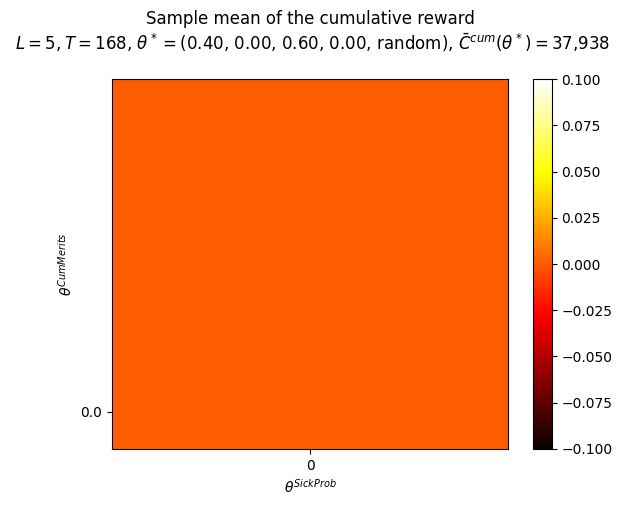

In [152]:
if 'LEARN' in MODES:
  ## P.plot_Fhat_map_5(
  Policy(None).plot_Fhat_map_4(
    FhatI_theta_I=Cbarcum_Alloc,

    ## thetasX=thetasCumSlots,
    thetasX=ThetasSickProb,
    thetasY=ThetasCumMerits,

    ## labelX=r'$\theta^{CumSlots}$',
    labelX=r'$\theta^{SickProb}$',
    labelY=r'$\theta^{CumMerits}$',

    title="Sample mean of the cumulative reward"+f"\n $L={L}, T={T}$, "+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[3]:,.2f}')+", "+ \
        f'{Best_theta_Alloc[4]}'+"), " \
      r"$\bar{C}^{cum}(\theta^*) =$"+f"{Best_Cbarcum_Alloc:,.0f}\n",
    ## thetaFixed1=best_theta_Alloc.thCumMerits,
    ## thetaFixed1=best_theta_Alloc.thSickProb,
    ## thetaFixed1=best_theta_Alloc.thCumSlots,
    thetaFixed1=Best_theta_Alloc.thContSlots,
    thetaFixed2=Best_theta_Alloc.thSelect,
  )

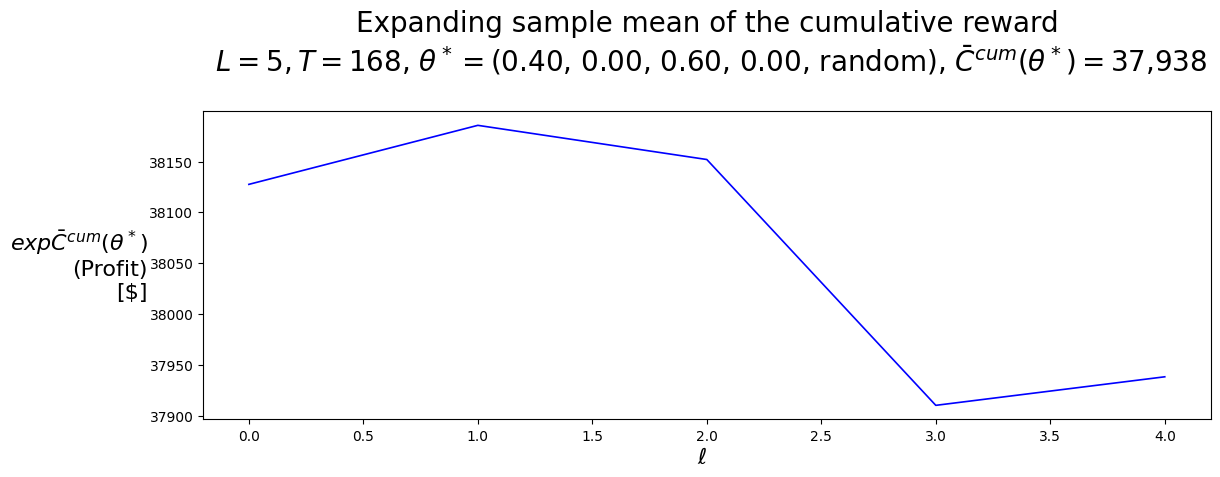

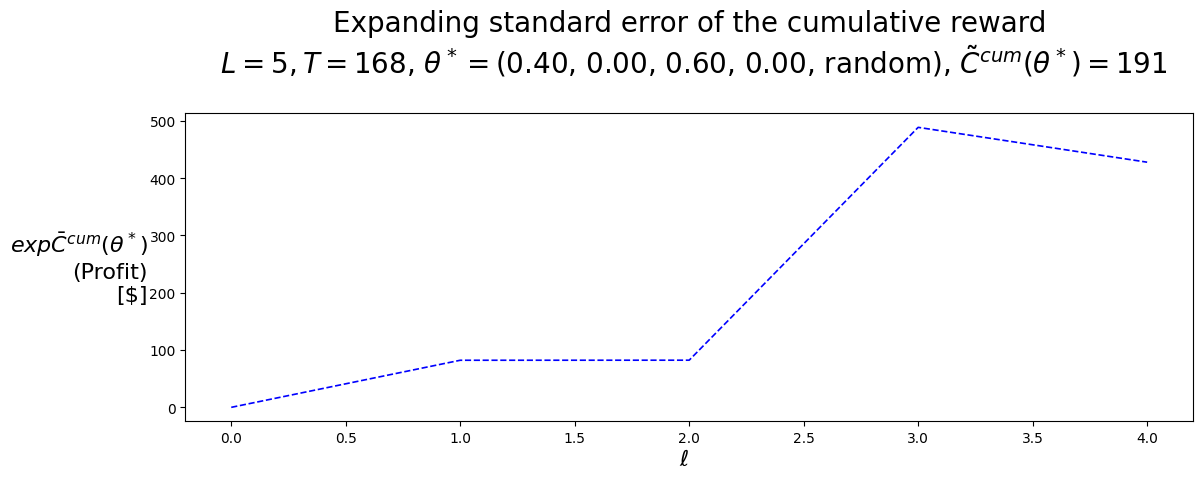

In [153]:
if 'LEARN' in MODES:
  Policy(None).plot_expFhat_chart(
    df=ThetaStar_expCbarcum_Alloc,
    labelX=r'$\ell$',
    labelY=r"$exp\bar{C}^{cum}(\theta^*)$"+"\n(Profit)\n[$]",
    title="Expanding sample mean of the cumulative reward"+f"\n $L={L}, T={T}$, "+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[3]:,.2f}')+", "+
        f'{Best_theta_Alloc[4]}'+"), " \
      r"$\bar{C}^{cum}(\theta^*) =$"+f"{Best_Cbarcum_Alloc:,.0f}\n",
    color_style='b-'
  )
  print()
  Policy(None).plot_expFhat_chart(
    df=ThetaStar_expCtilcum_Alloc,
    labelX=r'$\ell$',
    labelY=r"$exp\bar{C}^{cum}(\theta^*)$"+"\n(Profit)\n[$]",
    title="Expanding standard error of the cumulative reward"+f"\n $L={L}, T={T}$, "+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[3]:,.2f}')+", "+
        f'{Best_theta_Alloc[4]}'+"), " \
      r"$\tilde{C}^{cum}(\theta^*) =$"+f"{Best_Ctilcum_Alloc:,.0f}\n",
    color_style='b--'
  )

In [154]:
if 'LEARN' in MODES: print(f'{len(Record_Alloc):,}', L, T)

15,960 5 168


In [155]:
if 'LEARN' in MODES: print(Best_theta_Alloc)

Theta(thCumSlots=0.4, thSickProb=0, thCumMerits=0.6, thContSlots=0.0, thSelect='random')


/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


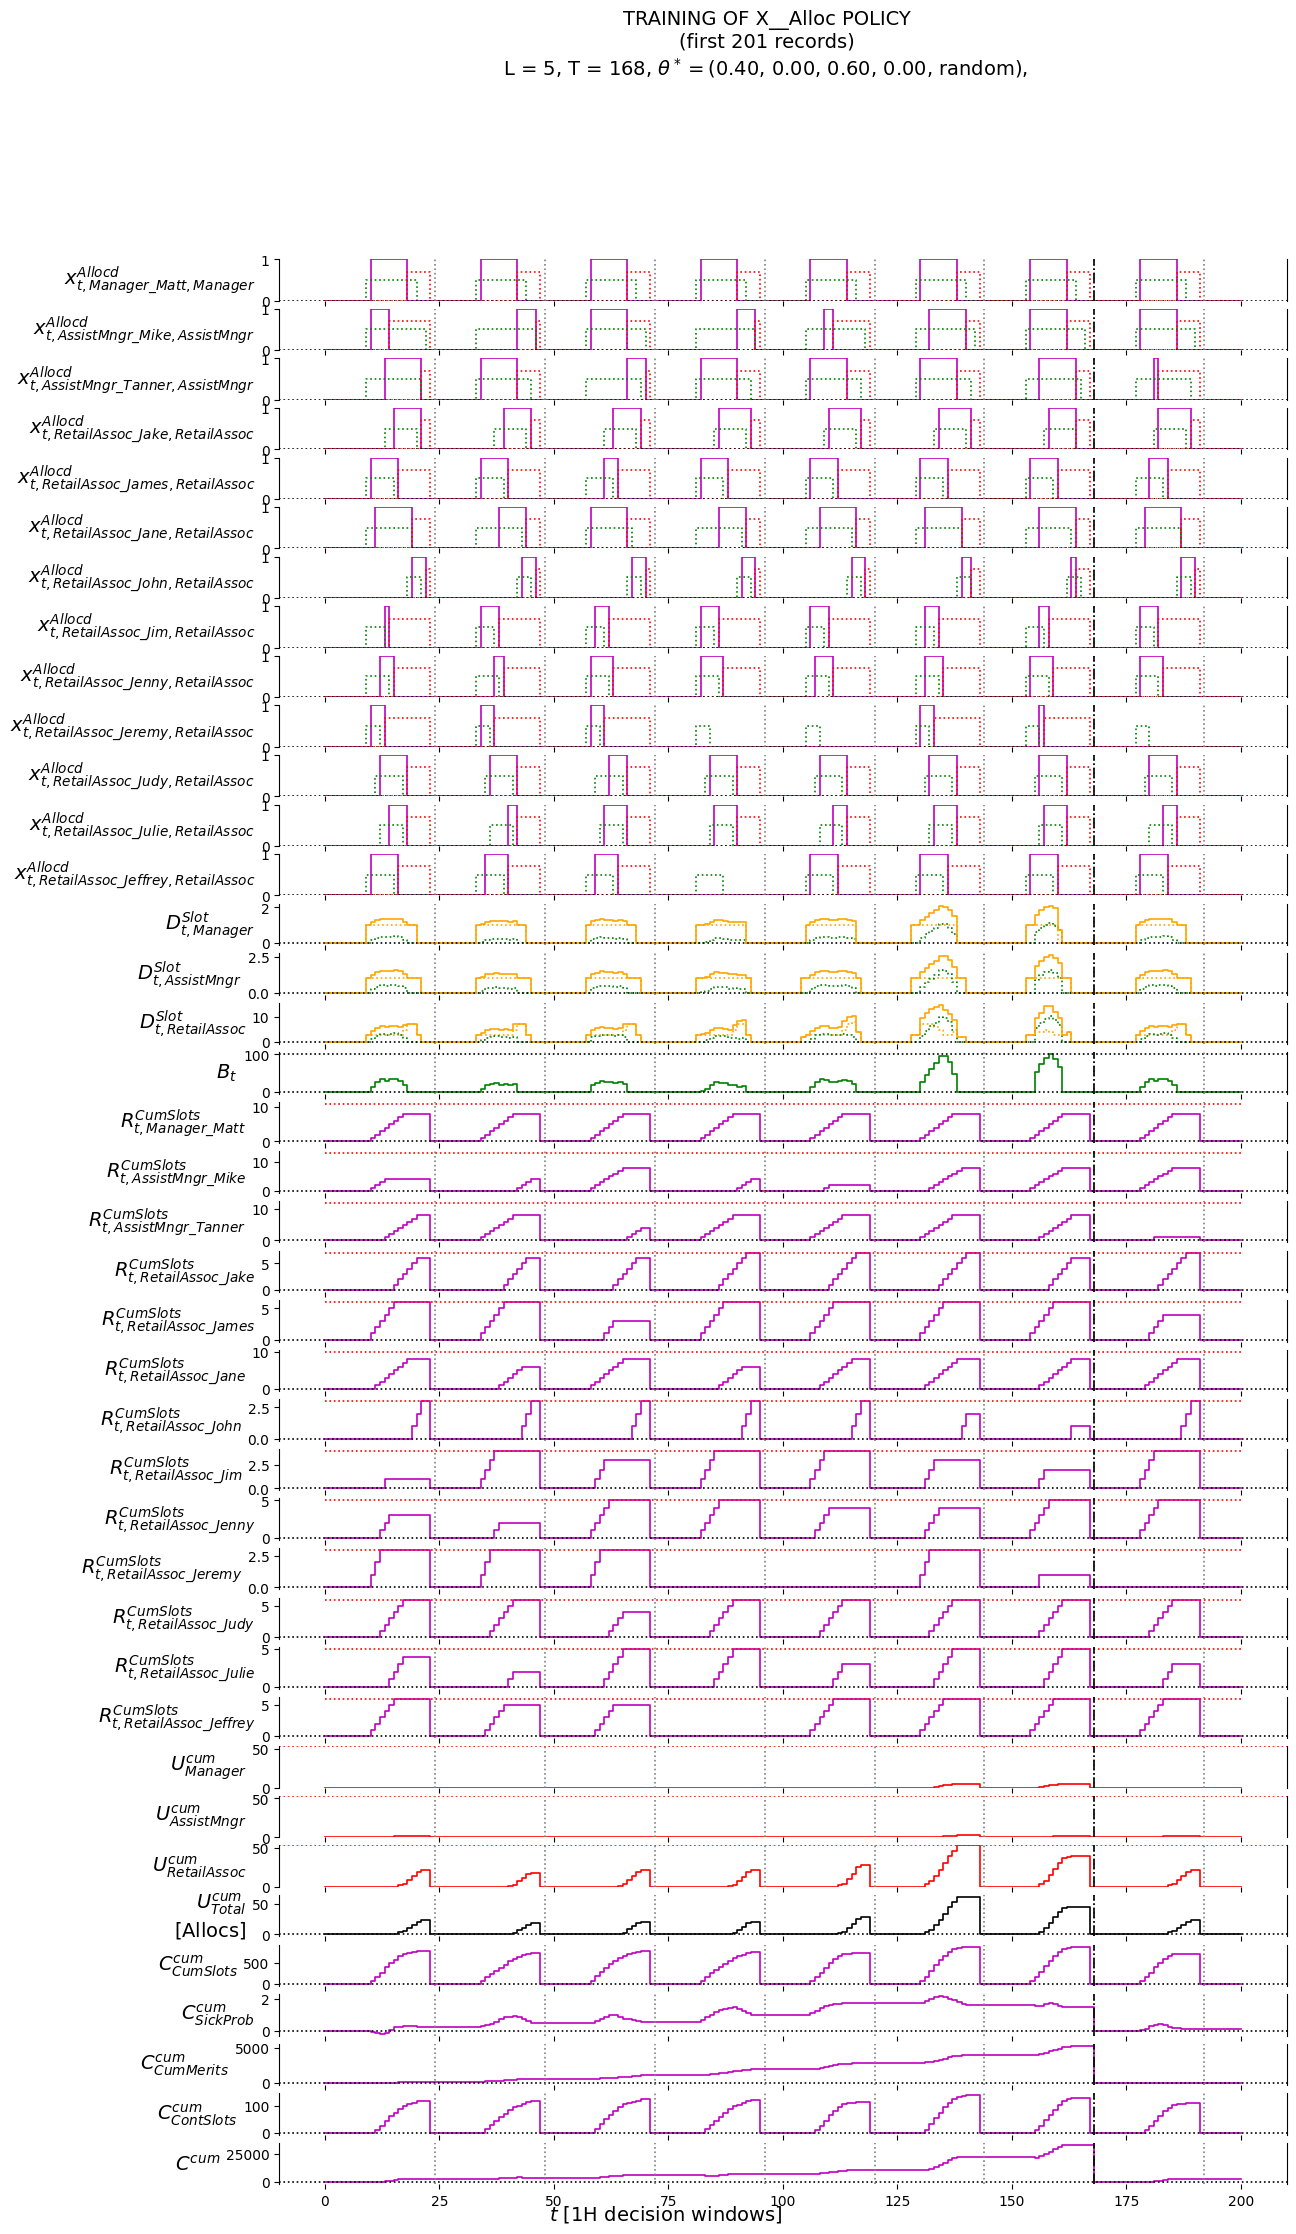

In [156]:
if 'LEARN' in MODES:
  Policy(None).plot_records(
  # plot_records(  
    df=Df_first_n_t,
    df_non=None,
    pars=defaultdict(str, {
      'xlabel': "$t\ \mathrm{["+f"{DATE_TIME_DELTA}"+"\ decision\ windows]}$",
      'thCumSlots': Best_theta_Alloc.thCumSlots,
      'thSickProb': Best_theta_Alloc.thSickProb,
      ## 'legendLabels': [r'$\mathrm{opt}$', r'$\mathrm{non}$'],
      'suptitle': f'TRAINING OF X__Alloc POLICY'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
      f'L = {L}, T = {T}, '+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[3]:,.2f}')+", "+
        f'{Best_theta_Alloc[4]}'+"), " \
    }),
  );

/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


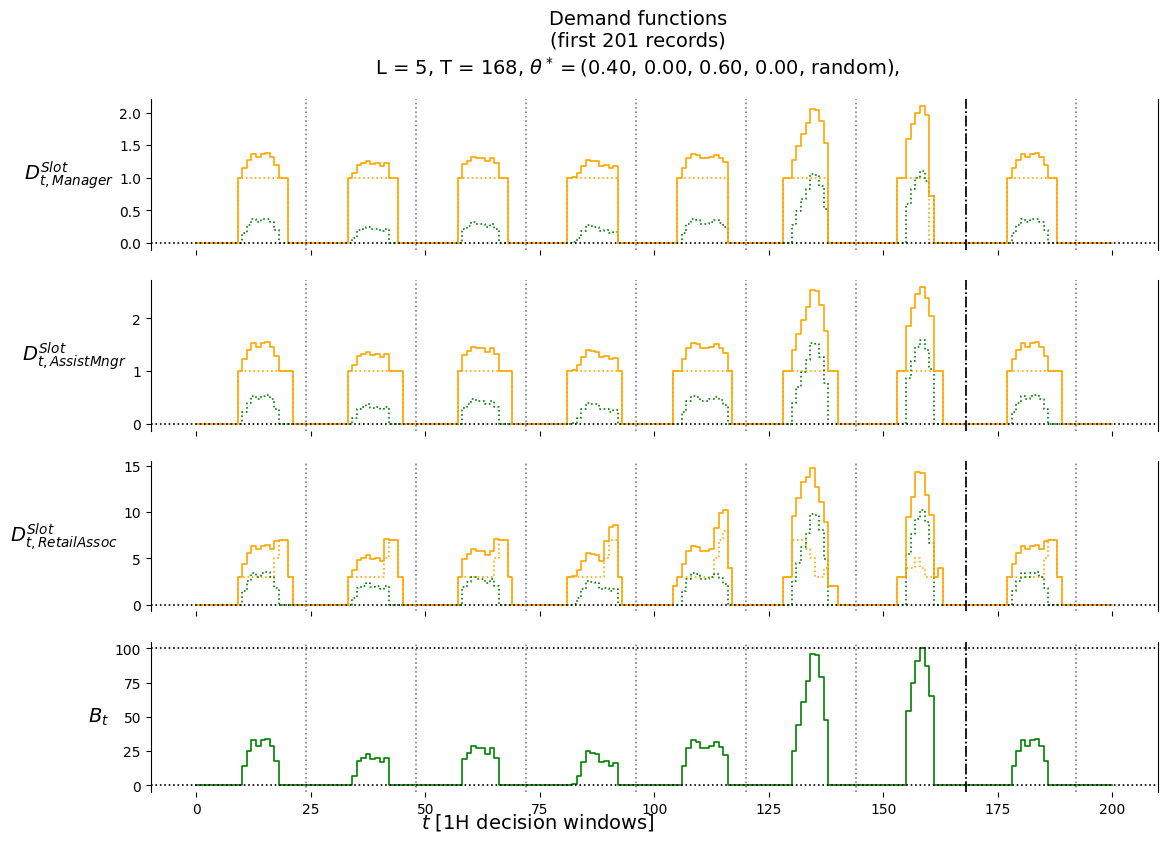

In [158]:
if 'LEARN' in MODES:
  Policy(None).plot_popular_times(
  # plot_popular_times(
    df=Df_first_n_t,
    pars=defaultdict(str, {
      'xlabel': "$t\ \mathrm{["+f"{DATE_TIME_DELTA}"+"\ decision\ windows]}$",
      # 'suptitle': f'Demand functions'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
      # 'suptitle': f'Google-measured popular times for The Boardroom'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
      'suptitle': f'Demand functions'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
      f'L = {L}, T = {T}, '+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[3]:,.2f}')+", "+
        f'{Best_theta_Alloc[4]}'+"), " \
    }),
  );

In [159]:
if 'LEARN' in MODES: print(T,SLOTS_PER_DAY)

168 24


/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


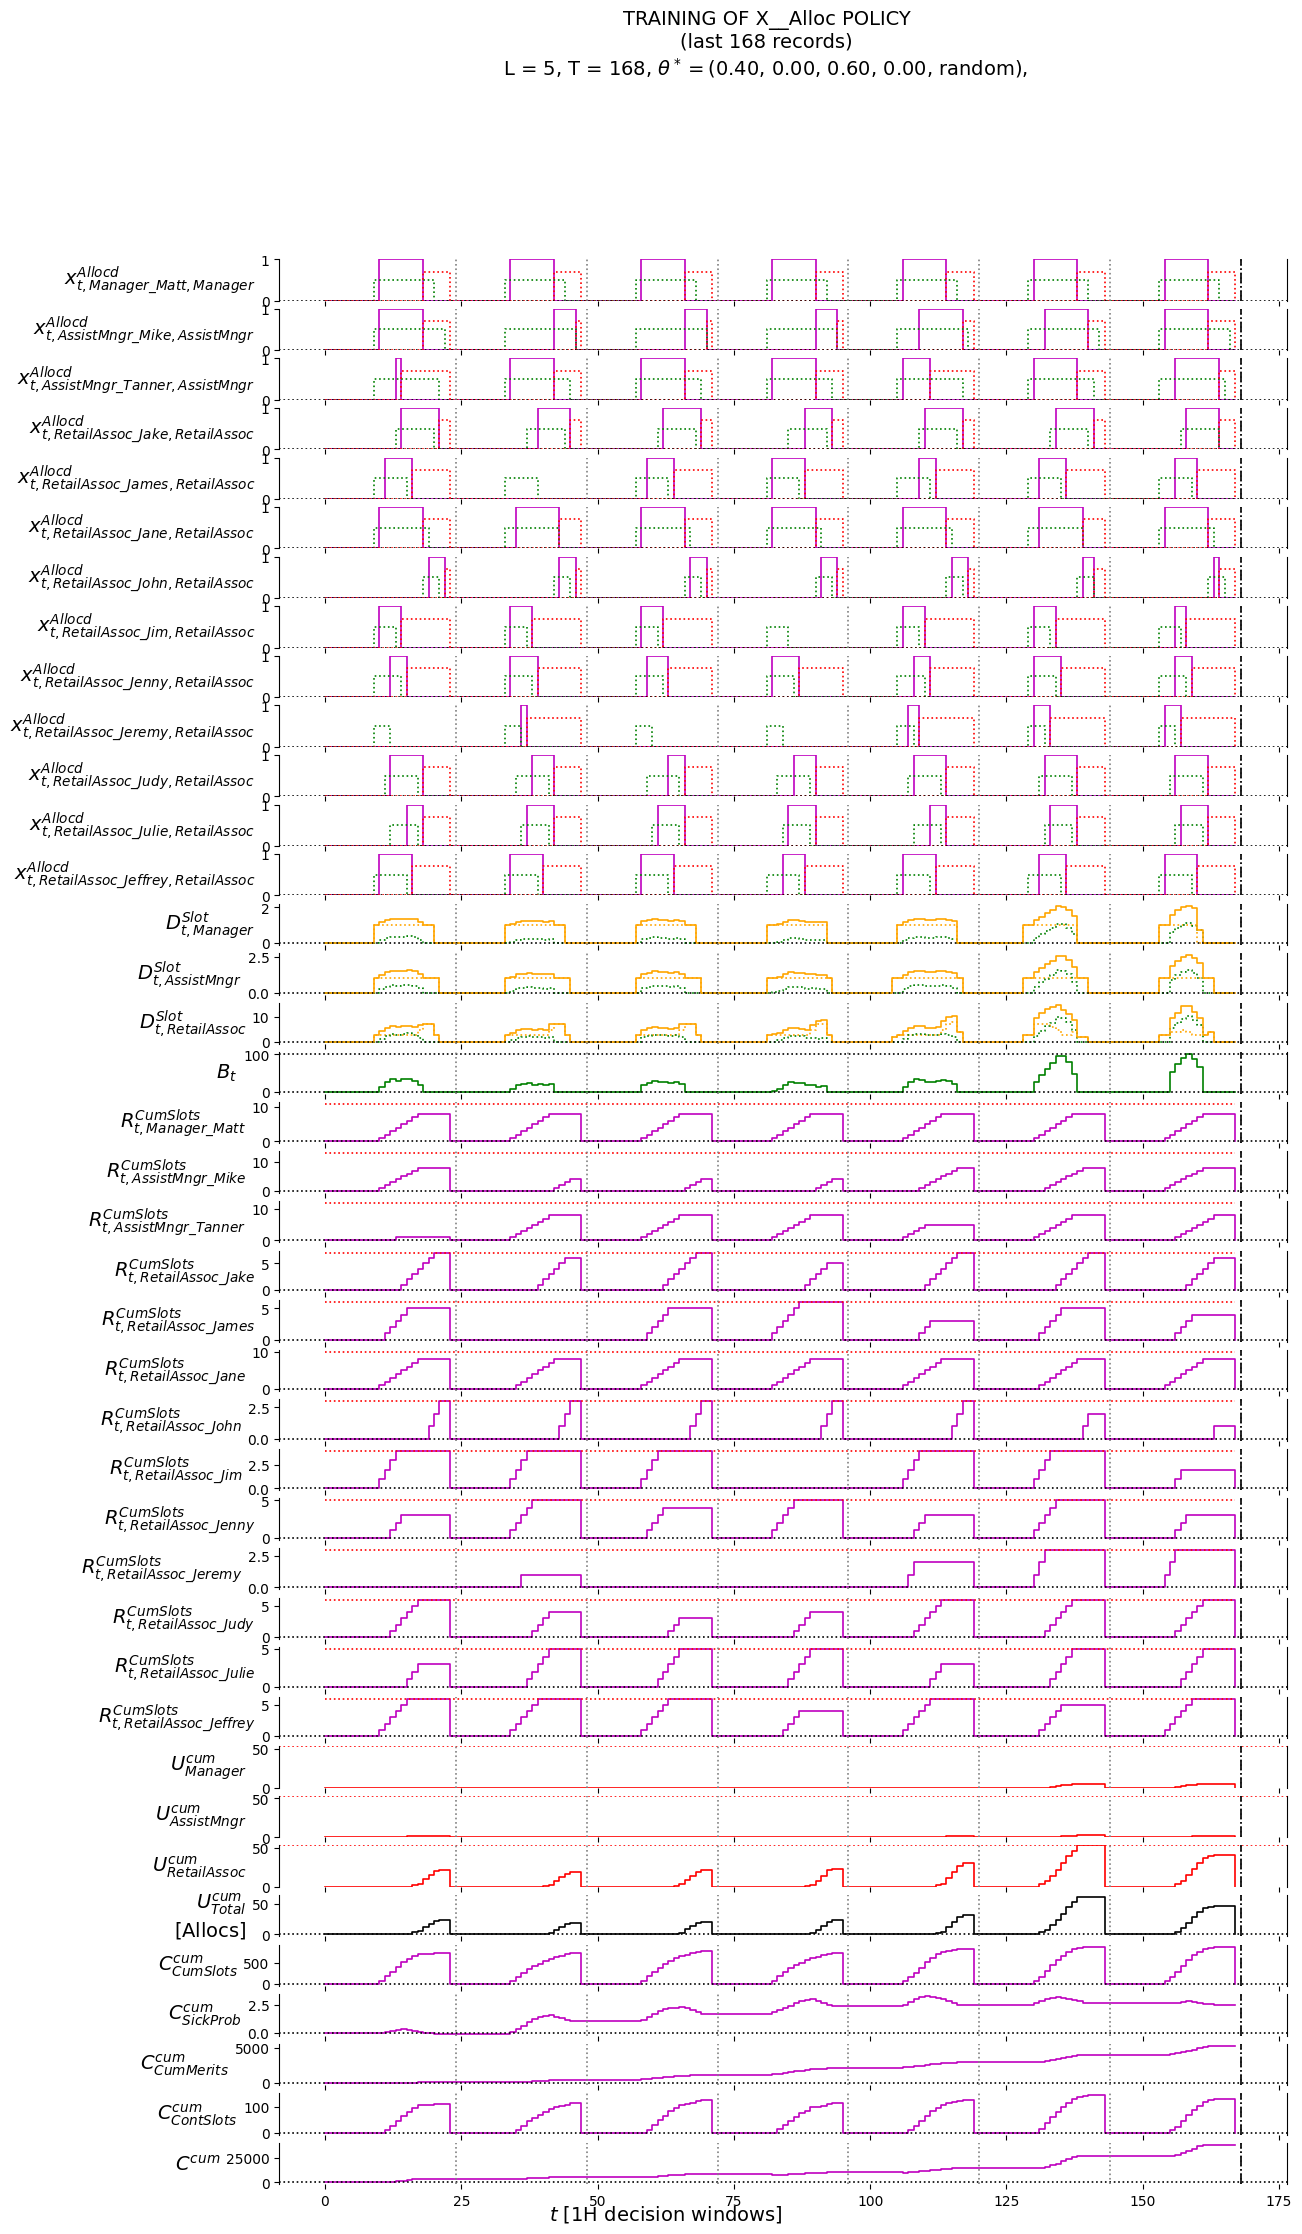

In [160]:
if 'LEARN' in MODES:
  Policy(None).plot_records(
  # plot_records(    
    df=Df_last_n_t,
    df_non=None,
    pars=defaultdict(str, {
      'thCumSlots': Best_theta_Alloc.thCumSlots,
      'thSickProb': Best_theta_Alloc.thSickProb,
      ## 'legendLabels': [r'$\mathrm{opt}$', r'$\mathrm{non}$'],
      'xlabel': "$t\ \mathrm{["+f"{DATE_TIME_DELTA}"+"\ decision\ windows]}$",
      'suptitle': f'TRAINING OF X__Alloc POLICY'+'\n'+f'(last {Last_n_t} records)'+'\n'+ \
      f'L = {L}, T = {T}, '+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc[3]:,.2f}')+", "+
        f'{Best_theta_Alloc[4]}'+"), " \
    }),
  )

#### 4.6.1.2 Comparison of Policies

In [88]:
## hide
## last_n_l = int(.95*L)
## P.plot_expFhat_charts(
#   means={
#       'HighLow': thetaStar_expCbarcum_HighLow[-last_n_l:],
#       'SellLow': thetaStar_expCbarcum_SellLow[-last_n_l:],
#       'Track': thetaStar_expCbarcum_Track[-last_n_l:]
#   },
#   stdvs={
#       'HighLow': thetaStar_expCtilcum_HighLow[-last_n_l:],
#       'SellLow': thetaStar_expCtilcum_SellLow[-last_n_l:],
#       'Track': thetaStar_expCtilcum_Track[-last_n_l:]
#   },
#   labelX='Sample paths, ' + r'$\ell$',
#   labelY='Profit\n[$]',
#   suptitle=f"Comparison of Policies after Training\n \
#     L = {L}, T = {T}\n \
#     last {last_n_l} records\n \
#     ('exp' refers to expanding)",
#   pars=defaultdict(str, {
#     'colors': ['r', 'g', 'b']
#   }),
# )

#### 4.6.2 Evaluation

##### 4.6.2.1 X__AllocBelow

In [161]:
if 'LEARN' in MODES: print(Best_theta_Alloc)

Theta(thCumSlots=0.4, thSickProb=0, thCumMerits=0.6, thContSlots=0.0, thSelect='random')


In [162]:
if 'LEARN' in MODES: print(Worst_theta_Alloc)

Theta(thCumSlots=0.0, thSickProb=0, thCumMerits=0.0, thContSlots=1.0, thSelect='random')


In [163]:
def do_evalu():
  global DEM, MER, \
  ThetaStar_expCbarcum_Alloc_evalu_opt, ThetaStar_expCtilcum_Alloc_evalu_opt, \
  Best_theta_Alloc_evalu_opt, Worst_theta_Alloc_evalu_opt, \
  Record_Alloc_evalu_opt, Df_Alloc_evalu_opt, \
  ThetaStar_expCbarcum_Alloc_evalu_non, ThetaStar_expCtilcum_Alloc_evalu_non, \
  Best_theta_Alloc_evalu_non, Worst_theta_Alloc_evalu_non, \
  Record_Alloc_evalu_non, Df_Alloc_evalu_non

  M = Model()
  P = Policy(M)
  ## DEM = DemandSimulator(seed=SEED_EVALU)
  ## MER = MeritSimulator(seed=SEED_EVALU)
  thetasOpt = []; thetasOpt.append(Best_theta_Alloc)
  ThetaStar_expCbarcum_Alloc_evalu_opt, ThetaStar_expCtilcum_Alloc_evalu_opt, \
  _, _, \
  Best_theta_Alloc_evalu_opt, Worst_theta_Alloc_evalu_opt, \
  _, _, \
  _, _, \
  Record_Alloc_evalu_opt = \
    P.perform_grid_search_sample_paths('X__Alloc', thetasOpt)
  Df_Alloc_evalu_opt = pd.DataFrame.from_records(
      Record_Alloc_evalu_opt[:First_n_t], columns=Labels)

  M = Model()
  P = Policy(M)
  ## DEM = DemandSimulator(seed=SEED_EVALU)
  ## MER = MeritSimulator(seed=SEED_EVALU)
  thetasNon = []; thetasNon.append(Worst_theta_Alloc)
  ## thetasNon = []; thetasNon.append(
  #   P.build_theta(
  #     {'thCumShifts': 1.0, 'thSickProb': 1.0}
  #   )
  # )
  ThetaStar_expCbarcum_Alloc_evalu_non, ThetaStar_expCtilcum_Alloc_evalu_non, \
  _, _, \
  Best_theta_Alloc_evalu_non, Worst_theta_Alloc_evalu_non, \
  _, _, \
  _, _, \
  Record_Alloc_evalu_non = \
    P.perform_grid_search_sample_paths('X__Alloc', thetasNon)
  Df_Alloc_evalu_non = pd.DataFrame.from_records(
      Record_Alloc_evalu_non[:First_n_t], columns=Labels)

  print(
    f'{ThetaStar_expCbarcum_Alloc_evalu_opt.iloc[-1]=:.2f}, \
      {ThetaStar_expCbarcum_Alloc_evalu_non.iloc[-1]=:.2f}')

In [164]:
%%time
## Wall time: 3min 13s [colab]
## Wall time: 2min 1s [mac mini]
## It is the thetas that are done in parallel, so no parallel speedup here (actually a bit longer
## due to the ray shutdown and init).
## There is a SINGLE theta for each of the 2 cases.
## During training, where there are multiple thetas, there will be a speedup.
if 'LEARN' in MODES:
  L = 2 #20 #5 #2 #2db #10pub #!!!!!!!!!!!!!!!!!!!!!!!!!!!
  T = 7*SLOTS_PER_DAY #=672
  First_n_t = int(.11*L*T)
  do_evalu()

numThetas=1
... printing every 1th theta (if considered) ...
	%%% l=1
	%%% l=2
0/0, 38,016, Theta(thCumSlots=0.4, thSickProb=0, thCumMerits=0.6, thContSlots=0.0, thSelect='random')
numThetas=1
... printing every 1th theta (if considered) ...
	%%% l=1
	%%% l=2
0/0, 33,508, Theta(thCumSlots=0.0, thSickProb=0, thCumMerits=0.0, thContSlots=1.0, thSelect='random')
ThetaStar_expCbarcum_Alloc_evalu_opt.iloc[-1]=38015.90,       ThetaStar_expCbarcum_Alloc_evalu_non.iloc[-1]=33508.50
CPU times: user 41.6 s, sys: 12.5 ms, total: 41.7 s
Wall time: 41.5 s


/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


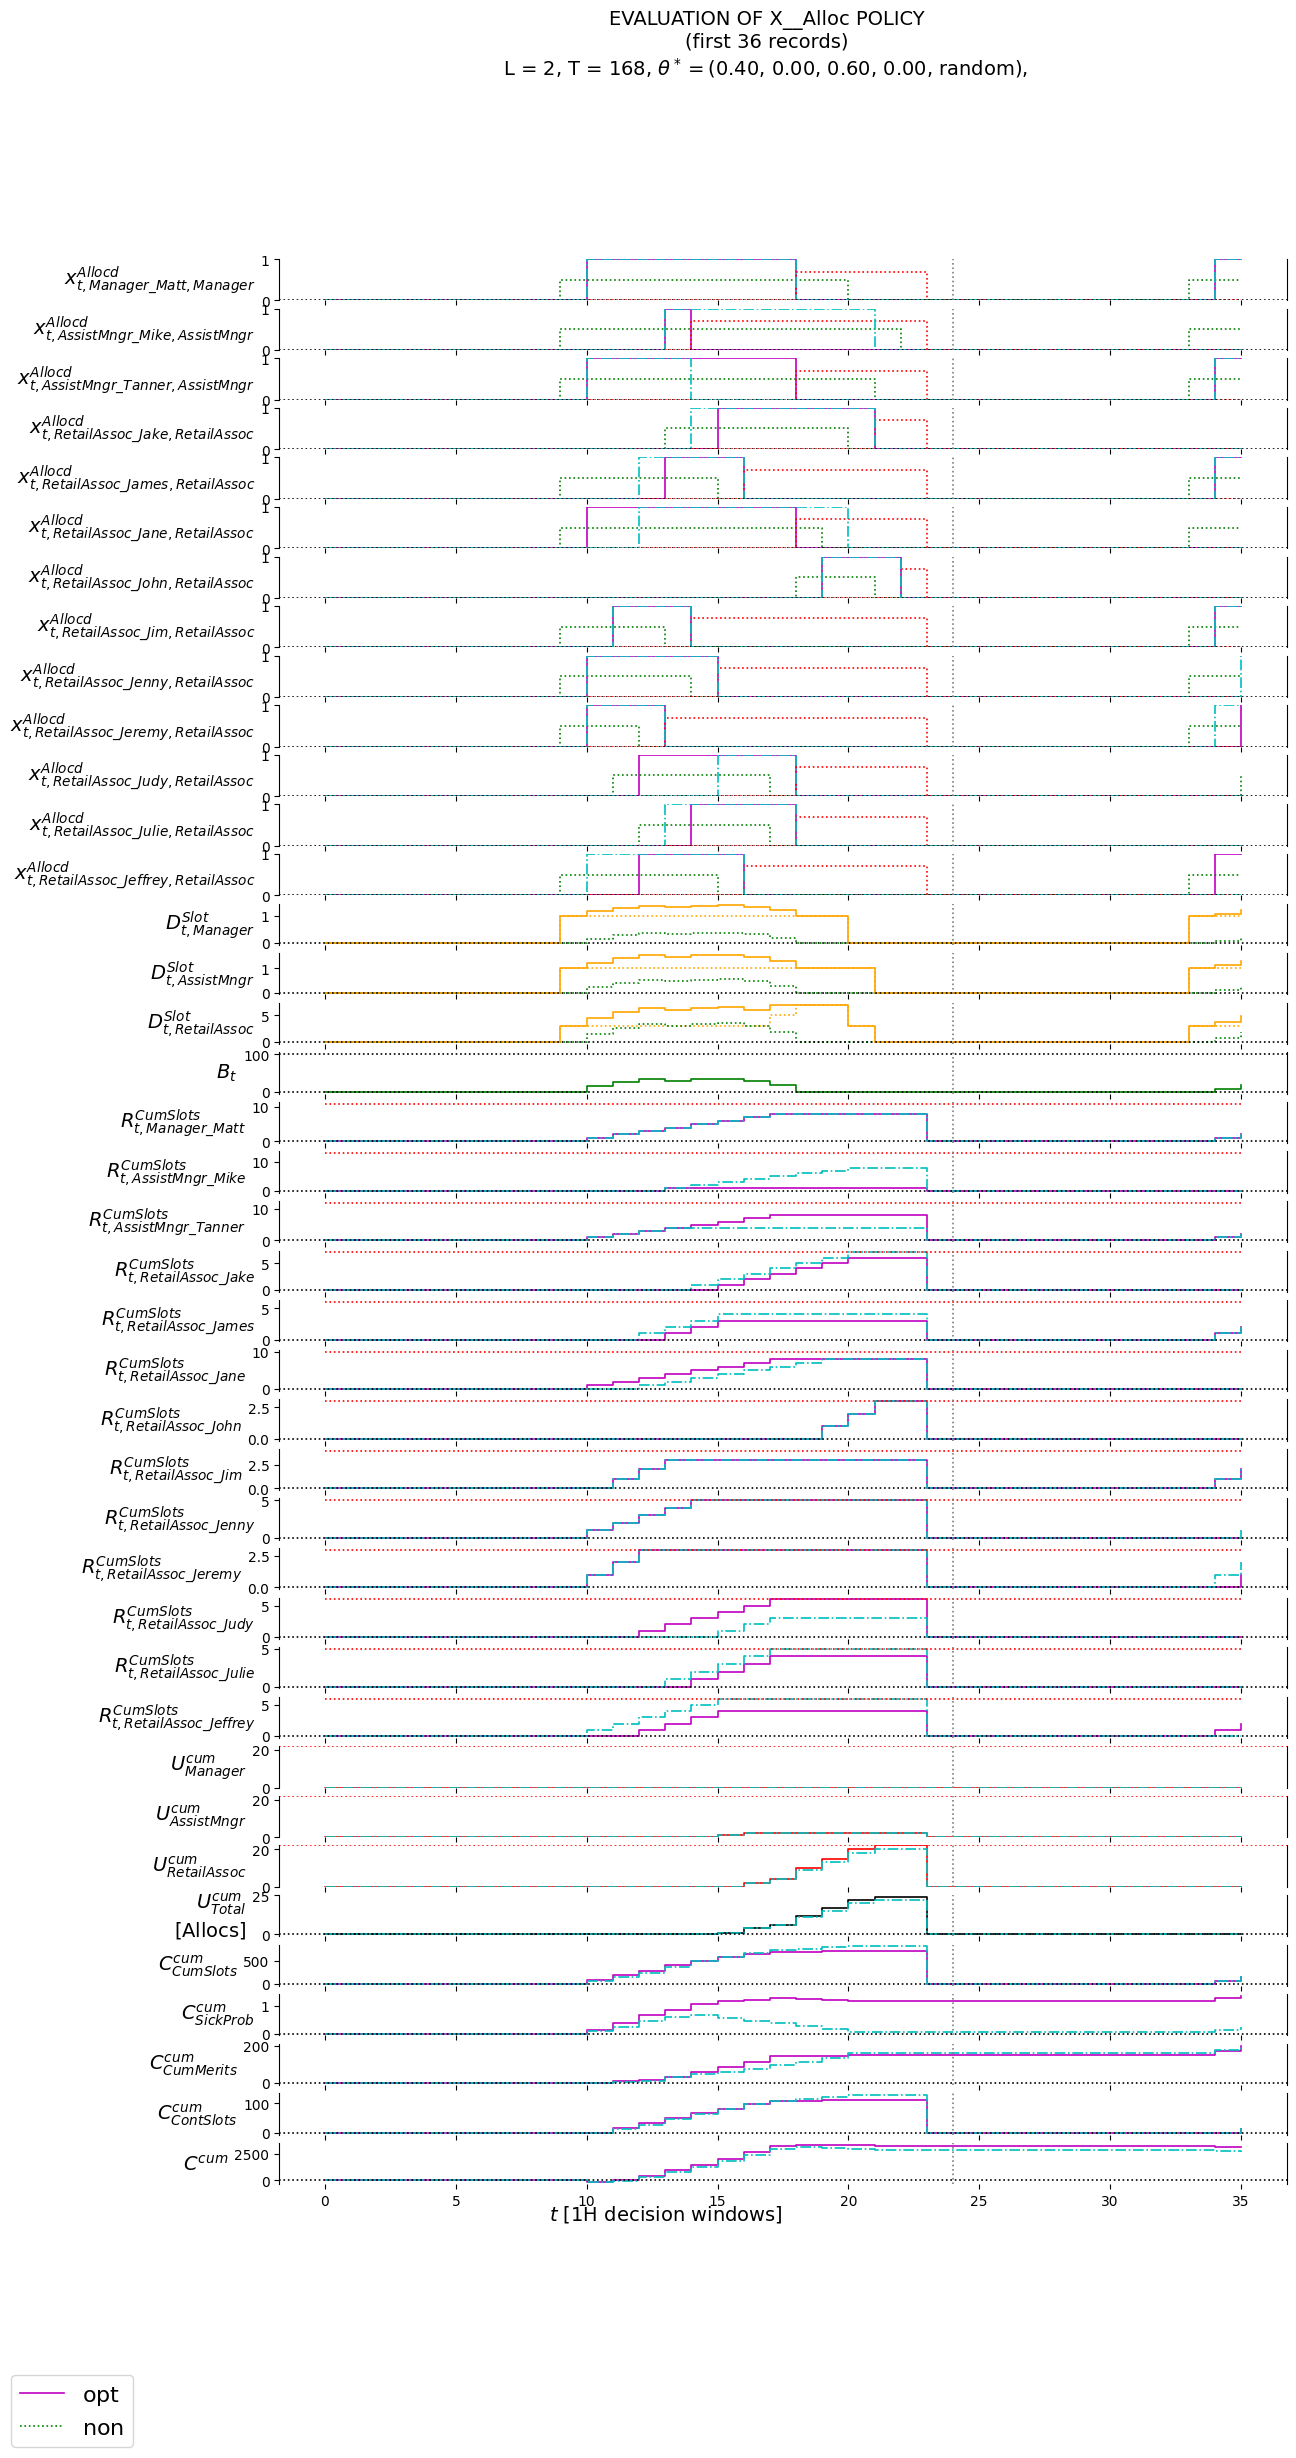

In [165]:
if 'LEARN' in MODES:
  Policy(None).plot_records(
  # plot_records(
    df=Df_Alloc_evalu_opt,
    df_non=Df_Alloc_evalu_non,
    pars=defaultdict(str, {
      'thCumSlots': Best_theta_Alloc_evalu_opt.thCumSlots,
      'thSickProb': Best_theta_Alloc_evalu_opt.thSickProb,
      'thCumSlotsNon': Best_theta_Alloc_evalu_non.thCumSlots,
      'thSickProbNon': Best_theta_Alloc_evalu_non.thSickProb,
      'legendLabels': [r'$\mathrm{opt}$', r'$\mathrm{non}$'],
      'xlabel': "$t\ \mathrm{["+f"{DATE_TIME_DELTA}"+"\ decision\ windows]}$",
      'suptitle': f'EVALUATION OF X__Alloc POLICY'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
      f'L = {L}, T = {T}, '+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc_evalu_opt[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc_evalu_opt[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc_evalu_opt[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc_evalu_opt[3]:,.2f}')+", "+
        f'{Best_theta_Alloc_evalu_opt[4]}'+"), " \
    }),
  )

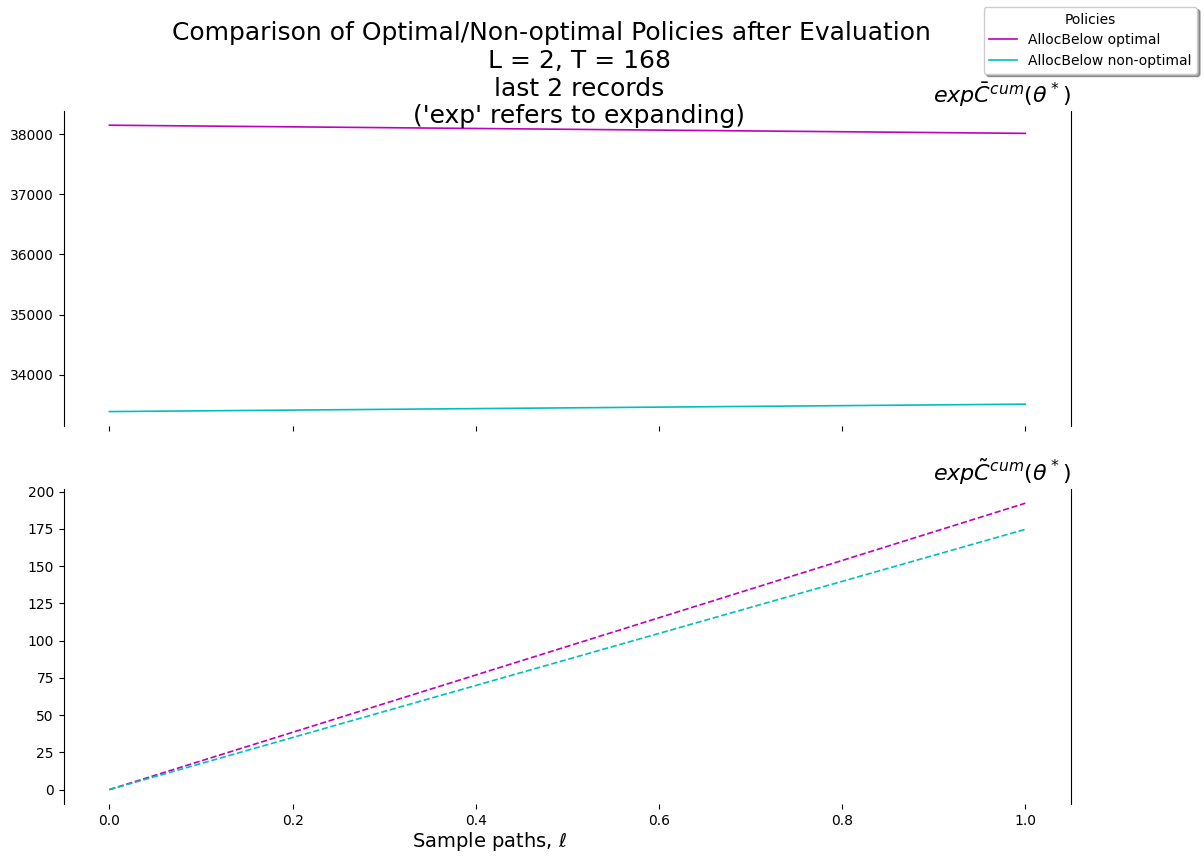

In [166]:
if 'LEARN' in MODES:
  ## last_n_l = int(.99*L)
  Last_n_l = int(1.0*L)
  Policy(None).plot_expFhat_charts(
    means={
        'AllocBelow optimal': ThetaStar_expCbarcum_Alloc_evalu_opt[-Last_n_l:],
        'AllocBelow non-optimal': ThetaStar_expCbarcum_Alloc_evalu_non[-Last_n_l:],
    },
    stdvs={
        'AllocBelow optimal': ThetaStar_expCtilcum_Alloc_evalu_opt[-Last_n_l:],
        'AllocBelow non-optimal': ThetaStar_expCtilcum_Alloc_evalu_non[-Last_n_l:],
    },
    labelX='Sample paths, ' + r'$\ell$',
    ## labelY='Profit\n[Allocs]',
    labelY='',
    suptitle=f"Comparison of Optimal/Non-optimal Policies after Evaluation\n \
      L = {L}, T = {T}\n \
      last {Last_n_l} records\n \
      ('exp' refers to expanding)",
    pars=defaultdict(str, {
      'colors': ['m', 'c']
    }),
  )

Next, we evaluate with a single sample-path:

In [167]:
%%time
## will show error due to division by 0 because L=1; OK for our purposes
## 1min 31s [colab]
## 1min 5s  [mac mini]
if 'LEARN' in MODES:
  L = 1
  T = 7*SLOTS_PER_DAY #=672
  First_n_t = int(1*L*T)
  do_evalu()

numThetas=1
... printing every 1th theta (if considered) ...
	%%% l=1


/tmp/ipykernel_5818/4285462572.py:141: RuntimeWarning: invalid value encountered in scalar divide
  Ctilcum_tmp = np.sum(np.square(np.array(CcumIomega__lI) - Cbarcum_tmp))/(L - 1)


0/0, 37,758, Theta(thCumSlots=0.4, thSickProb=0, thCumMerits=0.6, thContSlots=0.0, thSelect='random')
numThetas=1
... printing every 1th theta (if considered) ...
	%%% l=1
0/0, 33,607, Theta(thCumSlots=0.0, thSickProb=0, thCumMerits=0.0, thContSlots=1.0, thSelect='random')
ThetaStar_expCbarcum_Alloc_evalu_opt.iloc[-1]=37758.00,       ThetaStar_expCbarcum_Alloc_evalu_non.iloc[-1]=33607.00
CPU times: user 20.4 s, sys: 21.5 ms, total: 20.4 s
Wall time: 20.3 s


/tmp/ipykernel_5818/4285462572.py:141: RuntimeWarning: invalid value encountered in scalar divide
  Ctilcum_tmp = np.sum(np.square(np.array(CcumIomega__lI) - Cbarcum_tmp))/(L - 1)


In [168]:
if 'LEARN' in MODES: print(L, T, RESOLUTION)

1 168 HOUR


/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


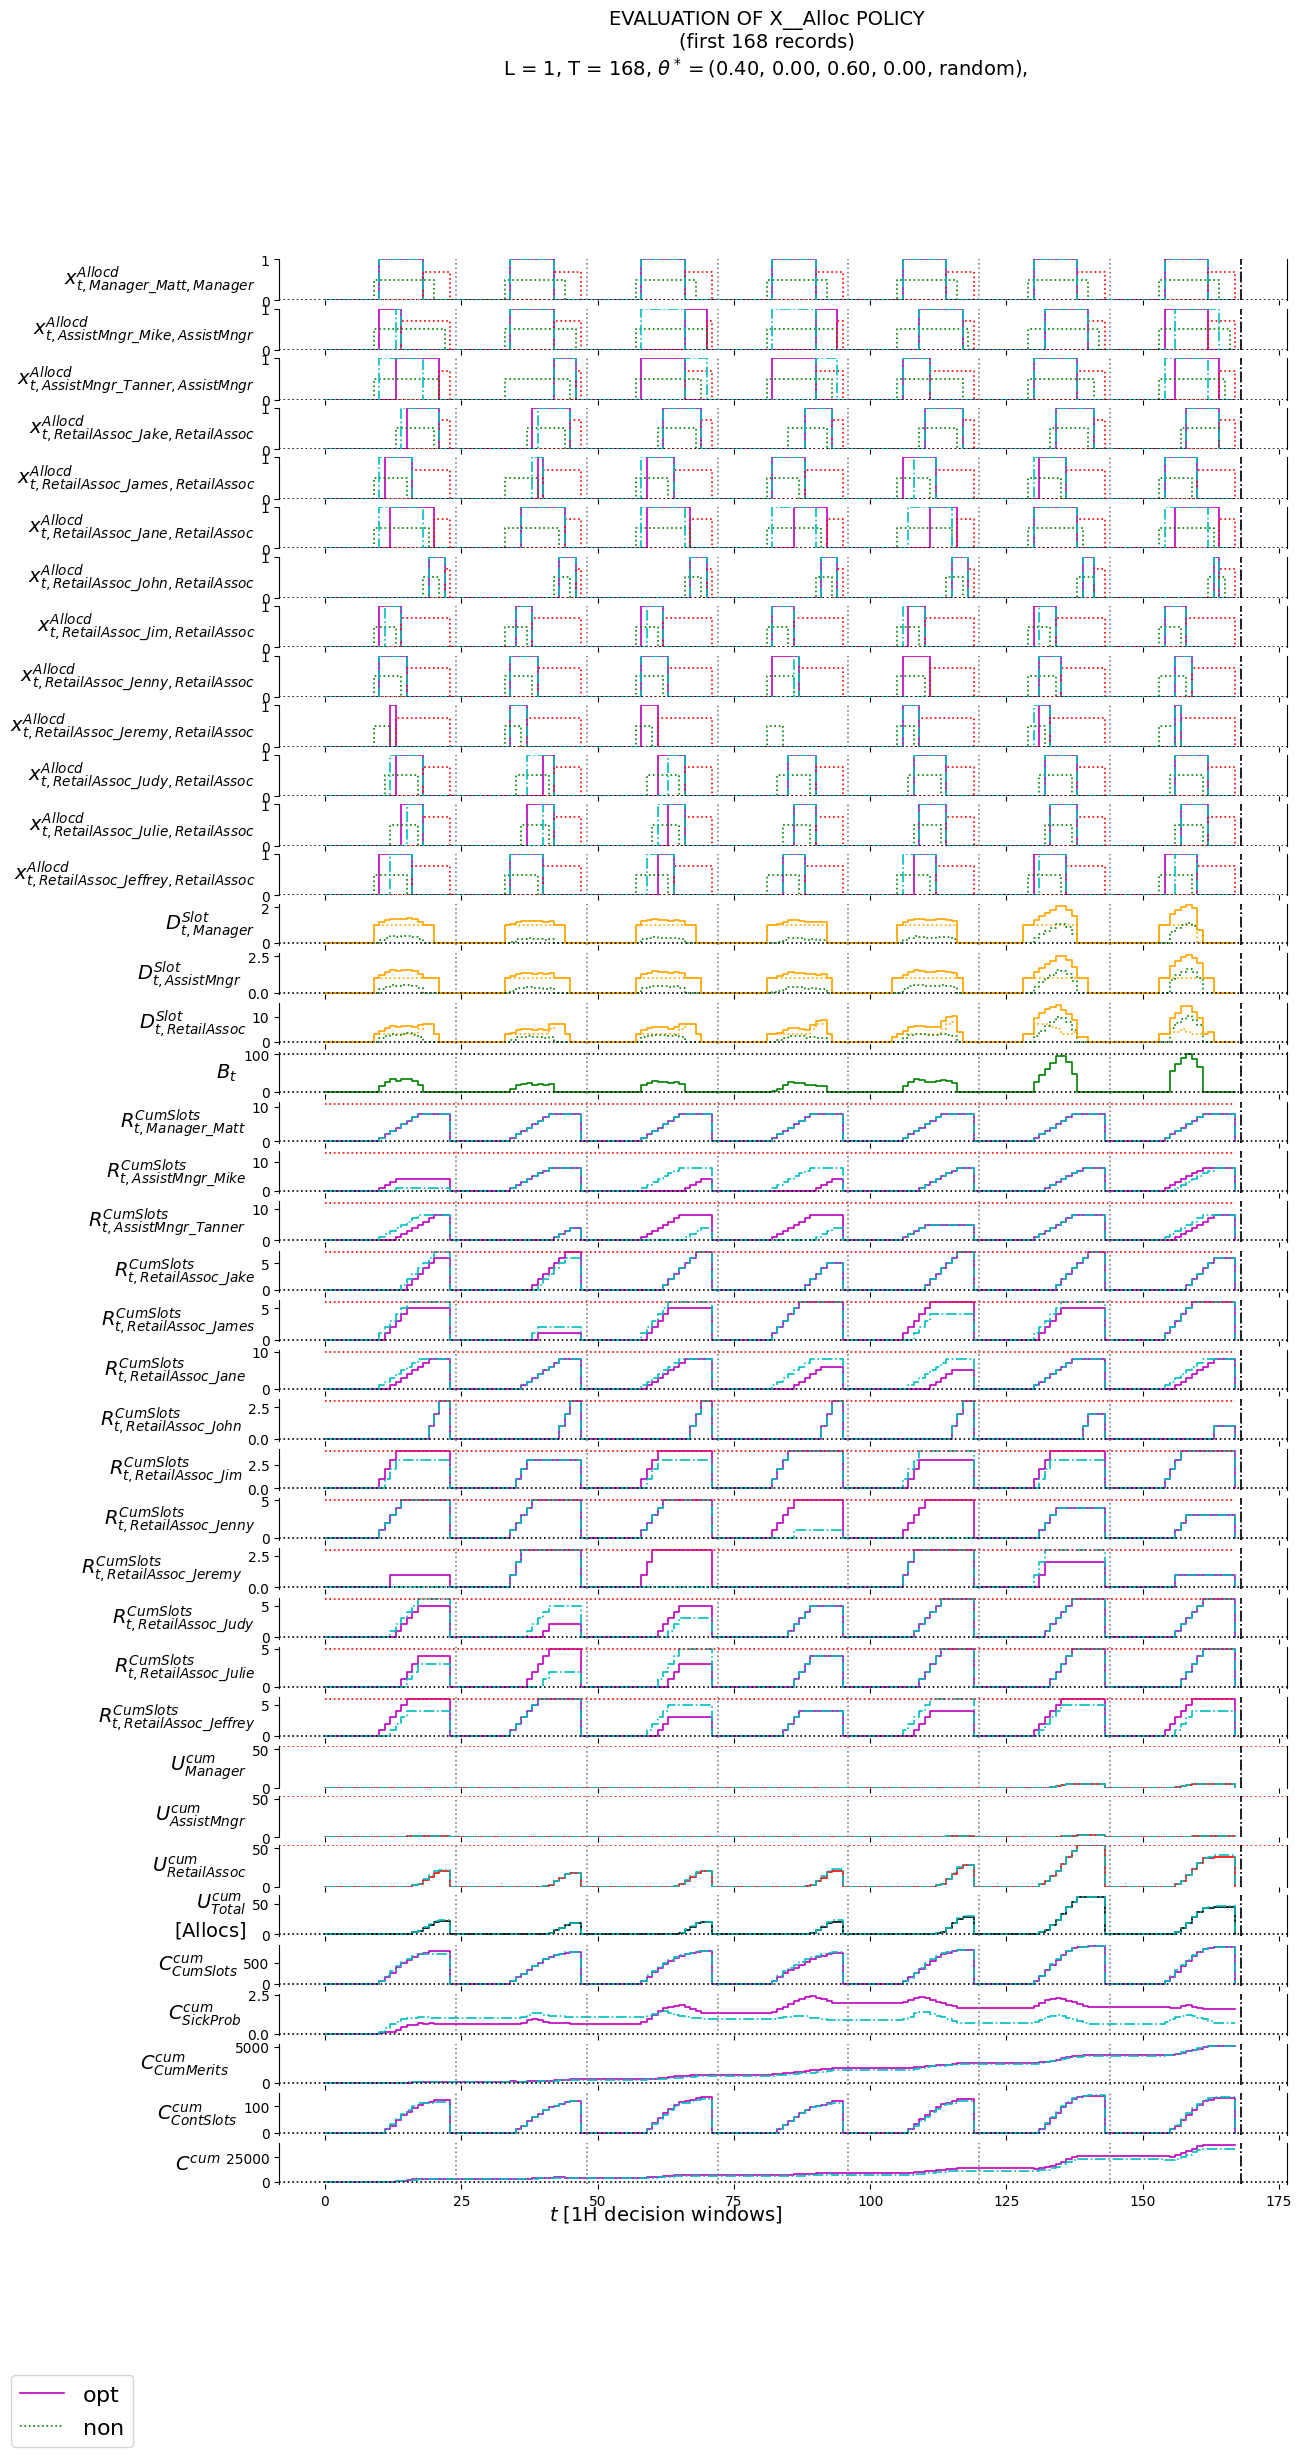

In [169]:
if 'LEARN' in MODES:
  Policy(None).plot_records(
  # plot_records(  
    df=Df_Alloc_evalu_opt,
    df_non=Df_Alloc_evalu_non, 
    # df_non=None, #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    pars=defaultdict(str, {
      'thCumSlots': Best_theta_Alloc_evalu_opt.thCumSlots,
      'thSickProb': Best_theta_Alloc_evalu_opt.thSickProb,
      'thCumSlotsNon': Best_theta_Alloc_evalu_non.thCumSlots,
      'thSickProbNon': Best_theta_Alloc_evalu_non.thSickProb,
      'legendLabels': [r'$\mathrm{opt}$', r'$\mathrm{non}$'],
      'xlabel': "$t\ \mathrm{["+f"{DATE_TIME_DELTA}"+"\ decision\ windows]}$",
      'suptitle': f'EVALUATION OF X__Alloc POLICY'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
      f'L = {L}, T = {T}, '+ \
      r"$\theta^* =$("+ \
        str(f'{Best_theta_Alloc_evalu_opt[0]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc_evalu_opt[1]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc_evalu_opt[2]:,.2f}')+", "+ \
        str(f'{Best_theta_Alloc_evalu_opt[3]:,.2f}')+", "+
        f'{Best_theta_Alloc_evalu_opt[4]}'+"), " \
    }),
  )

In [170]:
if 'LEARN' in MODES:
  print(Df_Alloc_evalu_opt[Df_Alloc_evalu_opt['t']==T-1][['Ccum']])

           Ccum
167 37,758.0000


In [171]:
if 'LEARN' in MODES:
  print(Df_Alloc_evalu_non[Df_Alloc_evalu_non['t']==T-1][['Ccum']])

           Ccum
167 33,607.0000


From the `Ccum` plot we see that the cumulative reward for the optimal policy keeps on rising. The non-optimal policy does not do as well.

#### 4.6.3 Comparison of Optimized Policies

In [74]:
## hide
## P.plot_evalu_comparison(
#   df1=df_BuyBelow_evalu_opt,
#   df2=df_Bellman_evalu_opt,
#   df3=None,
#   pars= defaultdict(str, {
#     'suptitle': f'EVALUATION OF ALL POLICIES (first {first_n_t} records)\n \
#     L={L}, T={T}',
#   }),
# )

## 5 EVALUATION

In [73]:
def print_schedule_shifts(df):
  mask = df.columns.str.contains('Allocd_t')
  resource_allocs = list(df.columns[mask])
  sched = copy(df)
  schedule = sched[['dt']+resource_allocs]

  print(f"SCHEDULE SHIFTS:")
  print(f"===============")
  for res_alloc in resource_allocs:
    _,_,id,resType,_,_,_ = res_alloc.split('_')
    resName = id+'_'+resType
    print(f'\n************** {resName}:')
    sched_list = list(schedule.loc[
      schedule[res_alloc] == True,
      ['dt', res_alloc]
    ]['dt'])
    if len(sched_list) > 0:
      ts_1 = sched_list[0]
      dow_1 = sched_list[0].day_of_week
      print(f"{(sched_list[0]-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')}")
      for ts in sched_list:
        dow = ts.day_of_week
        if dow != dow_1:
          print(f"{(ts_1).strftime('%a %b %d %Hh%M')}\n")
          print(f"{(ts-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')}")
        dow_1 = dow
        ts_1 = ts
      print(f"{(sched_list[-1]).strftime('%a %b %d %Hh%M')}")
  print(f'\n{CONTIGUOUS_REWARD=}')
  print(f'{MAX_DAILY_SLOT_RUN=} ({RESOLUTION}s)')
  print(f'{TH_CumSlots_SPEC=}')
  print(f'{TH_SickProb_SPEC=}')
  print(f'{TH_CumMerits_SPEC=}')
  print(f'{TH_ContSlots_SPEC=}')
  print(f'{TH_Select_SPEC=}')

In [74]:
if 'LEARN' in MODES:
  print_schedule_shifts(Df_Alloc_evalu_opt)

SCHEDULE SHIFTS:

************** Manager_Matt:
Mon Dec 04 09h00
Mon Dec 04 17h00

Tue Dec 05 09h00
Tue Dec 05 17h00

Wed Dec 06 09h00
Wed Dec 06 17h00

Thu Dec 07 09h00
Thu Dec 07 17h00

Fri Dec 08 09h00
Fri Dec 08 17h00

Sat Dec 09 09h00
Sat Dec 09 17h00

Sun Dec 10 09h00
Sun Dec 10 16h00

************** AssistMngr_Mike:
Mon Dec 04 17h00
Mon Dec 04 21h00

Tue Dec 05 09h00
Tue Dec 05 17h00

Wed Dec 06 17h00
Wed Dec 06 21h00

Thu Dec 07 17h00
Thu Dec 07 21h00

Fri Dec 08 17h00
Fri Dec 08 21h00

Sat Dec 09 09h00
Sat Dec 09 17h00

Sun Dec 10 12h00
Sun Dec 10 19h00

************** AssistMngr_Tanner:
Mon Dec 04 09h00
Mon Dec 04 17h00

Tue Dec 05 17h00
Tue Dec 05 21h00

Wed Dec 06 09h00
Wed Dec 06 17h00

Thu Dec 07 09h00
Thu Dec 07 17h00

Fri Dec 08 09h00
Fri Dec 08 17h00

Sat Dec 09 13h00
Sat Dec 09 20h00

Sun Dec 10 09h00
Sun Dec 10 17h00

************** RetailAssoc_Jake:
Mon Dec 04 14h00
Mon Dec 04 20h00

Tue Dec 05 14h00
Tue Dec 05 20h00

Wed Dec 06 15h00
Wed Dec 06 20h00

Thu Dec 07 15h

In [55]:
def gap_minutes(resolution):
  if resolution == 'QUARTER_HOUR':
    return 15
  elif resolution == 'HOUR':
    return 60
  elif resolution == 'BLOCK_8_HOUR':
    return 480
  else:
    print(f'ERROR: Invalid RESOLUTION: {RESOLUTION}')

In [56]:
def print_schedule_slots(df):
  gap_mins = gap_minutes(RESOLUTION)
  mask = df.columns.str.contains('Allocd_t')
  resource_allocs = list(df.columns[mask])
  sched = copy(df)
  schedule = sched[['dt']+resource_allocs]

  print(f"SCHEDULE SLOTS:")
  print(f"===============")
  n_gaps = 0
  for res_alloc in resource_allocs:
    _,_,id,resType,_,_,_ = res_alloc.split('_')
    resName = id+'_'+resType
    print(f'\n************** {resName}:')
    sched_list = list(schedule.loc[
      schedule[res_alloc] == True,
      ['dt', res_alloc]
    ]['dt'])
    if len(sched_list) > 0:
      ## print each slot and indicate gaps
      ts_1 = sched_list[0]
      dow_1 = -1
      for ts in sched_list:
        dow = ts.day_of_week
        if dow != dow_1: print('')
        if (int((ts.to_datetime64() - ts_1.to_datetime64())/(1e9*60)) > gap_mins)\
          and (dow == dow_1):
          n_gaps += 1
          print(f"{(ts-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')} GAP")
        else:
          print(f"{(ts-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')}")
        dow_1 = dow
        ts_1 = ts
  print(f'\nTOTAL NUMBER OF GAPS FOR ALL RESOURCES: {n_gaps}')
  print(f'{CONTIGUOUS_REWARD=}')
  print(f'{MAX_DAILY_SLOT_RUN=} ({RESOLUTION}s)')
  print(f'{TH_CumSlots_SPEC=}')
  print(f'{TH_SickProb_SPEC=}')
  print(f'{TH_CumMerits_SPEC=}')
  print(f'{TH_ContSlots_SPEC=}')
  print(f'{TH_Select_SPEC=}')

In [57]:
if 'LEARN' in MODES:
  print_schedule_slots(Df_Alloc_evalu_opt)

SCHEDULE SLOTS:

************** Manager_Matt:

Mon Dec 04 09h00
Mon Dec 04 10h00
Mon Dec 04 11h00
Mon Dec 04 12h00
Mon Dec 04 13h00
Mon Dec 04 14h00
Mon Dec 04 15h00
Mon Dec 04 16h00

Tue Dec 05 09h00
Tue Dec 05 10h00
Tue Dec 05 11h00
Tue Dec 05 12h00
Tue Dec 05 13h00
Tue Dec 05 14h00
Tue Dec 05 15h00
Tue Dec 05 16h00

Wed Dec 06 09h00
Wed Dec 06 10h00
Wed Dec 06 11h00
Wed Dec 06 12h00
Wed Dec 06 13h00
Wed Dec 06 14h00
Wed Dec 06 15h00
Wed Dec 06 16h00

Thu Dec 07 09h00
Thu Dec 07 10h00
Thu Dec 07 11h00
Thu Dec 07 12h00
Thu Dec 07 13h00
Thu Dec 07 14h00
Thu Dec 07 15h00
Thu Dec 07 16h00

Fri Dec 08 09h00
Fri Dec 08 10h00
Fri Dec 08 11h00
Fri Dec 08 12h00
Fri Dec 08 13h00
Fri Dec 08 14h00
Fri Dec 08 15h00
Fri Dec 08 16h00

Sat Dec 09 09h00
Sat Dec 09 10h00
Sat Dec 09 11h00
Sat Dec 09 12h00
Sat Dec 09 13h00
Sat Dec 09 14h00
Sat Dec 09 15h00
Sat Dec 09 16h00

Sun Dec 10 09h00
Sun Dec 10 10h00
Sun Dec 10 11h00
Sun Dec 10 12h00
Sun Dec 10 13h00
Sun Dec 10 14h00
Sun Dec 10 15h00

***********

## 6 DEPLOYMENT

In [58]:
MODES

['LEARN']

In [59]:
def get_best_theta_Alloc():
  best_theta_Alloc = \
    Policy(None).build_theta({
      'thCumSlots': BEST_THETA_Alloc[0],
      'thSickProb': BEST_THETA_Alloc[1],
      'thCumMerits': BEST_THETA_Alloc[2],
      'thContSlots': BEST_THETA_Alloc[3],
      'thSelect': BEST_THETA_Alloc[4]
    })
  return best_theta_Alloc

In [60]:
get_best_theta_Alloc()

Theta(thCumSlots=0, thSickProb=0, thCumMerits=0, thContSlots=1, thSelect='random')

In [61]:
def do_apply():
  global DEM, MER, \
  ThetaStar_expCbarcum_Alloc_evalu_opt, ThetaStar_expCtilcum_Alloc_evalu_opt, \
  Best_theta_Alloc_evalu_opt, Worst_theta_Alloc_evalu_opt, \
  Record_Alloc_evalu_opt, Df_Alloc_evalu_opt

  M = Model()
  P = Policy(M)
  ## DEM = DemandSimulator(seed=SEED_EVALU)
  ## MER = MeritSimulator(seed=SEED_EVALU)
  thetasOpt = []; thetasOpt.append(get_best_theta_Alloc()) ##from storage
  ThetaStar_expCbarcum_Alloc_evalu_opt, ThetaStar_expCtilcum_Alloc_evalu_opt, \
  _, _, \
  Best_theta_Alloc_evalu_opt, Worst_theta_Alloc_evalu_opt, \
  _, _, \
  _, _, \
  Record_Alloc_evalu_opt = \
    P.perform_grid_search_sample_paths('X__Alloc', thetasOpt)
  Df_Alloc_evalu_opt = pd.DataFrame.from_records(
      Record_Alloc_evalu_opt[:First_n_t], columns=Labels)
  print(
    f'{ThetaStar_expCbarcum_Alloc_evalu_opt.iloc[-1]=:.2f}')

In [63]:
# %%time
# ## to test
# MODES = ['LEARN', 'APPLY']
# if 'APPLY' in MODES:
#   L = 1
#   T = 7*SLOTS_PER_DAY
#   First_n_t = int(1*L*T)
#   do_apply()
#   print_schedule_shifts(Df_Alloc_evalu_opt)

In [71]:
# if 'APPLY' in MODES: print(L, T)

In [64]:
from io import StringIO
def prepare_schedule_shifts(df, buf):
  mask = df.columns.str.contains('Allocd_t')
  resource_allocs = list(df.columns[mask])
  sched = copy(df)
  schedule = sched[['dt']+resource_allocs]

  buf.write(f"SCHEDULE SHIFTS:\n")
  buf.write(f"================\n")
  for res_alloc in resource_allocs:
    _,_,id,resType,_,_,_ = res_alloc.split('_')
    resName = id+'_'+resType
    buf.write(f'\n************** {resName}:\n')
    sched_list = list(schedule.loc[
      schedule[res_alloc] == True,
      ['dt', res_alloc]
    ]['dt'])
    if len(sched_list) > 0:
      ts_1 = sched_list[0]
      dow_1 = sched_list[0].day_of_week
      buf.write(f"{(sched_list[0]-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')}\n")
      for ts in sched_list:
        dow = ts.day_of_week
        if dow != dow_1:
          buf.write(f"{(ts_1).strftime('%a %b %d %Hh%M')}\n\n")
          buf.write(f"{(ts-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')}\n")
        dow_1 = dow
        ts_1 = ts
      buf.write(f"{(sched_list[-1]).strftime('%a %b %d %Hh%M')}\n")
  buf.write(f'\n{CONTIGUOUS_REWARD=}\n')
  buf.write(f'{MAX_DAILY_SLOT_RUN=} ({RESOLUTION}s)\n')
  buf.write(f'{TH_CumSlots_SPEC=}\n')
  buf.write(f'{TH_SickProb_SPEC=}\n')
  buf.write(f'{TH_CumMerits_SPEC=}\n')
  buf.write(f'{TH_ContSlots_SPEC=}\n')
  buf.write(f'{TH_Select_SPEC=}\n')
  return buf.getvalue()

In [65]:
from io import StringIO
def prepare_schedule_slots(df, buf):
  gap_mins = gap_minutes(RESOLUTION)
  mask = df.columns.str.contains('Allocd_t')
  resource_allocs = list(df.columns[mask])
  sched = copy(df)
  schedule = sched[['dt']+resource_allocs]

  buf.write(f"SCHEDULE SLOTS:\n")
  buf.write(f"===============\n")
  n_gaps = 0
  for res_alloc in resource_allocs:
    _,_,id,resType,_,_,_ = res_alloc.split('_')
    resName = id+'_'+resType
    buf.write(f'\n************** {resName}:\n')
    sched_list = list(schedule.loc[
      schedule[res_alloc] == True,
      ['dt', res_alloc]
    ]['dt'])
    if len(sched_list) > 0:
      ## print each slot and indicate gaps
      ts_1 = sched_list[0]
      dow_1 = -1
      for ts in sched_list:
        dow = ts.day_of_week
        if dow != dow_1: buf.write('\n')
        if (int((ts.to_datetime64() - ts_1.to_datetime64())/(1e9*60)) > gap_mins)\
          and (dow == dow_1):
          n_gaps += 1
          buf.write(f"{(ts-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')} GAP\n")
        else:
          buf.write(f"{(ts-pd.Timedelta(DATE_TIME_DELTA)).strftime('%a %b %d %Hh%M')}\n")
        dow_1 = dow
        ts_1 = ts
  buf.write(f'\nTOTAL NUMBER OF GAPS FOR ALL RESOURCES: {n_gaps}\n')
  buf.write(f'{CONTIGUOUS_REWARD=}\n')
  buf.write(f'{MAX_DAILY_SLOT_RUN=} ({RESOLUTION}s)\n')
  buf.write(f'{TH_CumSlots_SPEC=}\n')
  buf.write(f'{TH_SickProb_SPEC=}\n')
  buf.write(f'{TH_CumMerits_SPEC=}\n')
  buf.write(f'{TH_ContSlots_SPEC=}\n')
  buf.write(f'{TH_Select_SPEC=}\n')
  return buf.getvalue()

In [67]:
@anvil.server.callable
def get_schedule(start, slots_per_day, max_daily_slot_run, resources):
  ## this is function, not an if statement where globals can just be used
  global START_DATE_TIME, SLOTS_PER_DAY, MAX_DAILY_SLOT_RUN, RESOURCE_TYPES, \
  RESOURCE_TYPE_COUNTS, TYPES, RESOURCE_IDS, aNAMES, bNAMES, abNAMES, Labels, \
  L, T, First_n_t, \
  ThetaStar_expCbarcum_Alloc_evalu_opt, ThetaStar_expCtilcum_Alloc_evalu_opt, \
  Best_theta_Alloc_evalu_opt, Df_Alloc_evalu_opt

  START_DATE_TIME = start
  sd = pd.to_datetime(start)
  if not sd.strftime('%a')=='Mon':
    return f"ERROR: {start} is a {sd.strftime('%A')}. It should be a Monday."
  for_now_sd = pd.to_datetime('2023-12-04')
  if not sd==for_now_sd:
    return f"ERROR: Start date must be {for_now_sd} for now."

  spd = int(slots_per_day)
  if not spd == 24:
    return f"ERROR: Slots per day must be 24 for now."
  SLOTS_PER_DAY = spd
  
  mdsr = int(max_daily_slot_run)
  if not mdsr <= spd:
    return f"ERROR: 'Max daily slot run' must be less than or equal to 'Slots per day'"
  MAX_DAILY_SLOT_RUN = mdsr

  # /////////////////////////////////
  resource_type_and_ids = resources.split(';')
  resource_types = []
  resource_ids = []
  resource_type_counts = []
  for itm in resource_type_and_ids:
      res_type, res_ids = itm.split(':')
      resource_types.append(res_type.strip())
      sep_ids = res_ids.split(','); ##print(f'{sep_ids=}')
      for rid in sep_ids:
          resource_ids.append(rid.strip())
      resource_type_counts.append(len(sep_ids))
  print(f'{resource_types=}')
  print(f'{resource_type_counts=}')
  print(f'{resource_ids=}')
  if len(resource_types) > MAX_RESOURCE_TYPES:
     return \
      f"ERROR: The number of resource types should not exceed {MAX_RESOURCE_TYPES}.\nYou entered the following resource types: {resource_types}"
  if len(resource_ids) > MAX_RESOURCE_IDS:
     return \
      f"ERROR: The number of resources should not exceed {MAX_RESOURCE_IDS}.\nYou entered the following resources: {resource_ids}"
  RESOURCE_TYPES = resource_types; print(f'{RESOURCE_TYPES=}')
  RESOURCE_TYPE_COUNTS = resource_type_counts; print(f'{RESOURCE_TYPE_COUNTS=}')
  TYPES = []
  for i in range(len(RESOURCE_TYPES)):
    additional_types = [RESOURCE_TYPES[i]]*RESOURCE_TYPE_COUNTS[i]
    for item in additional_types:
      TYPES.append(item)
  print(f'{TYPES=}')
  RESOURCE_IDS = resource_ids; print(f'{RESOURCE_TYPE_COUNTS=}')

  aNAMES = [tup[0]+'_'+tup[1] for tup in zip(TYPES, RESOURCE_IDS)]; print(f'{aNAMES=}')
  bNAMES = RESOURCE_TYPES; print(f'{bNAMES=}')
  abNAMES = [] ##to DEMAND b
  for a in aNAMES:
    a0,a1 = a.split('_')
    for b in bNAMES:
      if(a0==b):
        abn = (a + '___' + b)
        abNAMES.append(abn)
  print(f'{abNAMES=}')
  Labels = setup_plot_labels()
  # \\\\\\\\

  L = 1 ##set global L
  T = 7*SLOTS_PER_DAY ##set global T
  First_n_t = int(1*L*T) ##set global first_n_t

  ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  do_apply()
  ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

  buf = StringIO()
  ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  ## prepped_sched = prepare_schedule_slots(Df_Alloc_evalu_opt, buf)
  prepped_sched = prepare_schedule_shifts(Df_Alloc_evalu_opt, buf)
  ## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
  buf.close()

  return prepped_sched

In [70]:
# ## test
# # MODES = ['LEARN', 'APPLY']
# if 'APPLY' in MODES:
#     # res = get_schedule(start='2023-12-04', slots_per_day=24, max_daily_slot_run=8)
#     res = get_schedule(
#         start='2023-12-04', 
#         slots_per_day=24, 
#         max_daily_slot_run=8, 
#         # resources = 'Manager: John, Penelope; SalesPerson: Sally, Sarah, Jim, Costa'
#         resources = 'SupChief: Ruan, Francine; Sup: Azra, Wendie, Penny, Sally'
#         # resources = 'ChiefTeller: Ruan, Francine; Teller: Azra, Wendie, Penny, Sally'
#     )
# res

In [71]:
# if 'APPLY' in MODES: 
#   print(START_DATE_TIME, SLOTS_PER_DAY, MAX_DAILY_SLOT_RUN, L, T, First_n_t)

In [72]:
# ## test
# if 'APPLY' in MODES:
#   print(res)

In [73]:
## if 'APPLY' in MODES:
#   Policy(None).plot_records(
#   # plot_records(  
#     df=Df_Alloc_evalu_opt,
#     # df_non=Df_Alloc_evalu_non, 
#     df_non=None,
#     pars=defaultdict(str, {
#       'thCumSlots': Best_theta_Alloc_evalu_opt.thCumSlots,
#       'thSickProb': Best_theta_Alloc_evalu_opt.thSickProb,
#       # 'thCumSlotsNon': Best_theta_Alloc_evalu_non.thCumSlots,
#       # 'thSickProbNon': Best_theta_Alloc_evalu_non.thSickProb,
#       'legendLabels': [r'$\mathrm{opt}$', r'$\mathrm{non}$'],
#       'suptitle': f'EVALUATION OF X__Alloc POLICY'+'\n'+f'(first {First_n_t} records)'+'\n'+ \
#       f'L = {L}, T = {T}, '+ \
#       r"$\theta^* =$("+ \
#         str(f'{Best_theta_Alloc_evalu_opt[0]:,.2f}')+", "+ \
#         str(f'{Best_theta_Alloc_evalu_opt[1]:,.2f}')+", "+ \
#         str(f'{Best_theta_Alloc_evalu_opt[2]:,.2f}')+", "+ \
#         str(f'{Best_theta_Alloc_evalu_opt[3]:,.2f}')+", "+
#         f'{Best_theta_Alloc_evalu_opt[4]}'+"), " \
#     }),
#   )

In [81]:
if 'APPLY' in MODES:
  anvil.server.wait_forever()

resource_types=['Main Teller', 'Teller']
resource_type_counts=[1, 13]
resource_ids=['Ruan', 'Azra', 'Wendie', 'Penny', 'q', 'w', 'e', 'r', 't', 't', 't', 'w', 'r', 't']
resource_types=['Main Teller', 'Teller']
resource_type_counts=[1, 3]
resource_ids=['Ruan', 'Azra', 'Wendie', 'Penny']
RESOURCE_TYPES=['Main Teller', 'Teller']
RESOURCE_TYPE_COUNTS=[1, 3]
TYPES=['Main Teller', 'Teller', 'Teller', 'Teller']
RESOURCE_TYPE_COUNTS=[1, 3]
aNAMES=['Main Teller_Ruan', 'Teller_Azra', 'Teller_Wendie', 'Teller_Penny']
bNAMES=['Main Teller', 'Teller']
abNAMES=['Main Teller_Ruan___Main Teller', 'Teller_Azra___Teller', 'Teller_Wendie___Teller', 'Teller_Penny___Teller']
numThetas=1
... printing every 1th theta (if considered) ...
	%%% l=1


/tmp/ipykernel_55982/1411525843.py:137: RuntimeWarning: invalid value encountered in scalar divide
  Ctilcum_tmp = np.sum(np.square(np.array(CcumIomega__lI) - Cbarcum_tmp))/(L - 1)


0/0, 210, Theta(thCumSlots=0, thSickProb=0, thCumMerits=0, thContSlots=1, thSelect='random')
ThetaStar_expCbarcum_Alloc_evalu_opt.iloc[-1]=210.00


KeyboardInterrupt: 